# Importing Libraries

In [270]:
  # To work with files
import pandas as pd 

# For data visualization
import seaborn as sns    
import matplotlib.pyplot as plt

# to work with data
import numpy as np
from scipy import stats

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,RepeatedStratifiedKFold


from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV,ElasticNetCV,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score ,rand_score
import lightgbm as lgbm

from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor




In [271]:
df = pd.read_csv("./data/Ames_Housing_Data.csv")  # importing DataFrame

In [272]:
df.head(20) #first 20 house details

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0   526301100           20        RL         141.0     31770   Pave   NaN   
1   526350040           20        RH          80.0     11622   Pave   NaN   
2   526351010           20        RL          81.0     14267   Pave   NaN   
3   526353030           20        RL          93.0     11160   Pave   NaN   
4   527105010           60        RL          74.0     13830   Pave   NaN   
5   527105030           60        RL          78.0      9978   Pave   NaN   
6   527127150          120        RL          41.0      4920   Pave   NaN   
7   527145080          120        RL          43.0      5005   Pave   NaN   
8   527146030          120        RL          39.0      5389   Pave   NaN   
9   527162130           60        RL          60.0      7500   Pave   NaN   
10  527163010           60        RL          75.0     10000   Pave   NaN   
11  527165230           20        RL           NaN      7980   Pave   NaN   
12  527166040           60        RL          63.0      8402   Pave   NaN   
13  527180040           20        RL          85.0     10176   Pave   NaN   
14  527182190          120        RL           NaN      6820   Pave   NaN   
15  527216070           60        RL          47.0     53504   Pave   NaN   
16  527225035           50        RL         152.0     12134   Pave   NaN   
17  527258010           20        RL          88.0     11394   Pave   NaN   
18  527276150           20        RL         140.0     19138   Pave   NaN   
19  527302110           20        RL          85.0     13175   Pave   NaN   

   Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0        IR1          Lvl    AllPub  ...         0     NaN    NaN   
1        Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2        IR1          Lvl    AllPub  ...         0     NaN    NaN   
3        Reg          Lvl    AllPub  ...         0     NaN    NaN   
4        IR1          Lvl    AllPub  ...         0     NaN  MnPrv   
5        IR1          Lvl    AllPub  ...         0     NaN    NaN   
6        Reg          Lvl    AllPub  ...         0     NaN    NaN   
7        IR1          HLS    AllPub  ...         0     NaN    NaN   
8        IR1          Lvl    AllPub  ...         0     NaN    NaN   
9        Reg          Lvl    AllPub  ...         0     NaN    NaN   
10       IR1          Lvl    AllPub  ...         0     NaN    NaN   
11       IR1          Lvl    AllPub  ...         0     NaN  GdPrv   
12       IR1          Lvl    AllPub  ...         0     NaN    NaN   
13       Reg          Lvl    AllPub  ...         0     NaN    NaN   
14       IR1          Lvl    AllPub  ...         0     NaN    NaN   
15       IR2          HLS    AllPub  ...         0     NaN    NaN   
16       IR1          Bnk    AllPub  ...         0     NaN    NaN   
17       Reg          Lvl    AllPub  ...         0     NaN    NaN   
18       Reg          Lvl    AllPub  ...         0     NaN    NaN   
19       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   

   Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NaN        0       5    2010        WD           Normal     215000  
1           NaN        0       6    2010        WD           Normal     105000  
2          Gar2    12500       6    2010        WD           Normal     172000  
3           NaN        0       4    2010        WD           Normal     244000  
4           NaN        0       3    2010        WD           Normal     189900  
5           NaN        0       6    2010        WD           Normal     195500  
6           NaN        0       4    2010        WD           Normal     213500  
7           NaN        0       1    2010        WD           Normal     191500  
8           NaN        0       3    2010        WD           Normal     236500  
9           NaN        0       6    2010        WD           Normal     189000  
10          NaN        0       4    2010        WD 

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

----
----

In [274]:
df.shape

(2930, 81)

In [275]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [276]:

# How many NaNs are there in each column?
missing_counts = df.isna().sum()

# Extracting only columns with NaN values
missing_counts = missing_counts[missing_counts > 0]

# Calculating the percentage of NaNs relative to total rows
missing_percent = (missing_counts / len(df)) * 100

# Show column name, NaN count, and percentage in one table
missing_info = pd.DataFrame({
    'Column': missing_counts.index,
    'MissingCount': missing_counts.values,
    'MissingPercent': missing_percent.values
})

# You can round the percentage if you want (for example, to 2 digits).
missing_info['MissingPercent'] = missing_info['MissingPercent'].round(2)

# Show table
print(missing_info)

            Column  MissingCount  MissingPercent
0     Lot Frontage           490           16.72
1            Alley          2732           93.24
2     Mas Vnr Type          1775           60.58
3     Mas Vnr Area            23            0.78
4        Bsmt Qual            80            2.73
5        Bsmt Cond            80            2.73
6    Bsmt Exposure            83            2.83
7   BsmtFin Type 1            80            2.73
8     BsmtFin SF 1             1            0.03
9   BsmtFin Type 2            81            2.76
10    BsmtFin SF 2             1            0.03
11     Bsmt Unf SF             1            0.03
12   Total Bsmt SF             1            0.03
13      Electrical             1            0.03
14  Bsmt Full Bath             2            0.07
15  Bsmt Half Bath             2            0.07
16    Fireplace Qu          1422           48.53
17     Garage Type           157            5.36
18   Garage Yr Blt           159            5.43
19   Garage Finish  

Correlation of numerical features with SalePrice:
SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.08509

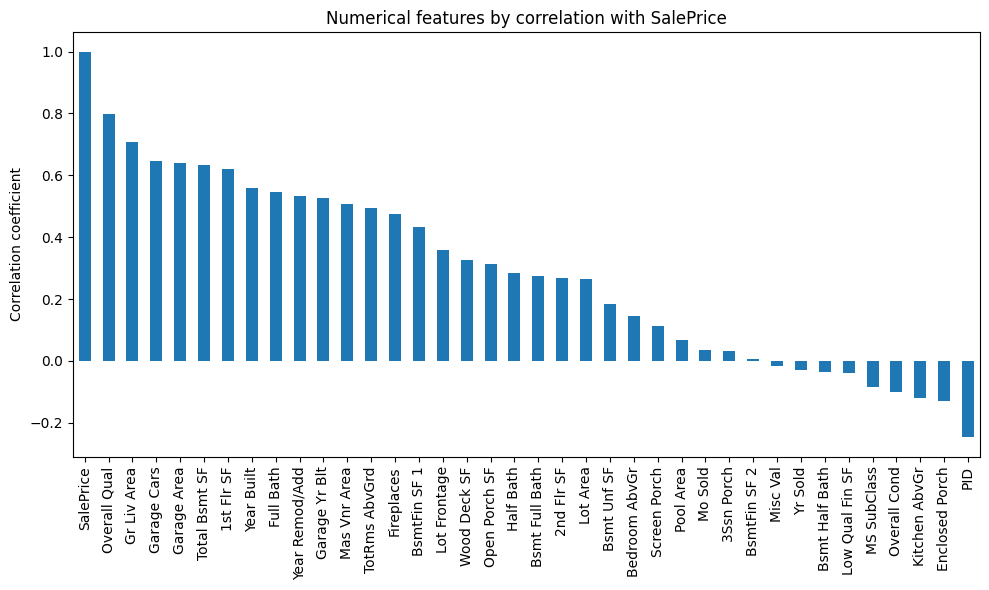

In [277]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

print("Correlation of numerical features with SalePrice:")
print(correlation)

plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Numerical features by correlation with SalePrice')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

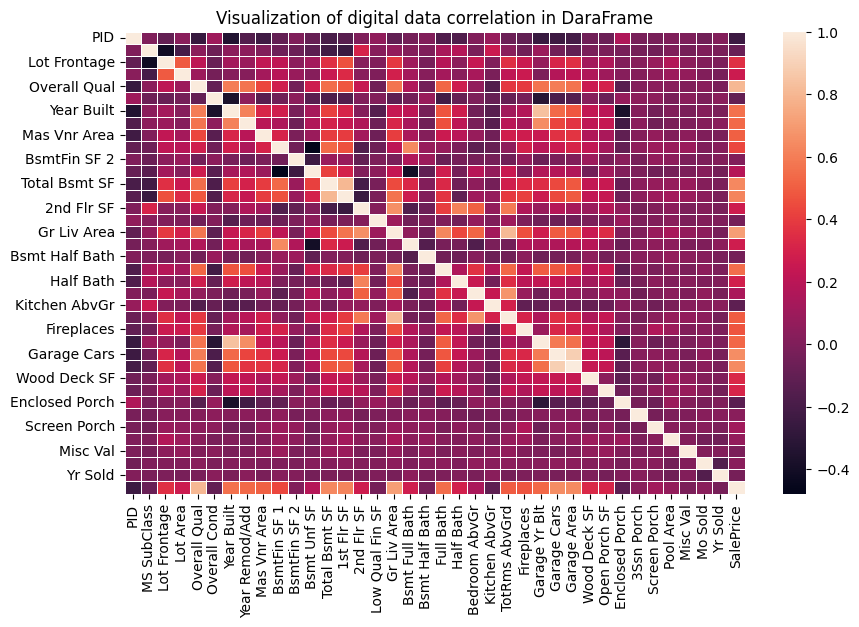

In [278]:

# digital data extraction
df_corr= df.select_dtypes('number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr , linewidths=0.5)
plt.title('Visualization of digital data correlation in DaraFrame')

plt.show()

80% dan ko'p NaN ni bor ustunlarni uchurib tashlayman . O'ylaymanki bu bustunlardagi malumotlar biz uchun foydasiz bo'ladi 

In [279]:
df.head(20)


PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0   526301100           20        RL         141.0     31770   Pave   NaN   
1   526350040           20        RH          80.0     11622   Pave   NaN   
2   526351010           20        RL          81.0     14267   Pave   NaN   
3   526353030           20        RL          93.0     11160   Pave   NaN   
4   527105010           60        RL          74.0     13830   Pave   NaN   
5   527105030           60        RL          78.0      9978   Pave   NaN   
6   527127150          120        RL          41.0      4920   Pave   NaN   
7   527145080          120        RL          43.0      5005   Pave   NaN   
8   527146030          120        RL          39.0      5389   Pave   NaN   
9   527162130           60        RL          60.0      7500   Pave   NaN   
10  527163010           60        RL          75.0     10000   Pave   NaN   
11  527165230           20        RL           NaN      7980   Pave   NaN   
12  527166040           60        RL          63.0      8402   Pave   NaN   
13  527180040           20        RL          85.0     10176   Pave   NaN   
14  527182190          120        RL           NaN      6820   Pave   NaN   
15  527216070           60        RL          47.0     53504   Pave   NaN   
16  527225035           50        RL         152.0     12134   Pave   NaN   
17  527258010           20        RL          88.0     11394   Pave   NaN   
18  527276150           20        RL         140.0     19138   Pave   NaN   
19  527302110           20        RL          85.0     13175   Pave   NaN   

   Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0        IR1          Lvl    AllPub  ...         0     NaN    NaN   
1        Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2        IR1          Lvl    AllPub  ...         0     NaN    NaN   
3        Reg          Lvl    AllPub  ...         0     NaN    NaN   
4        IR1          Lvl    AllPub  ...         0     NaN  MnPrv   
5        IR1          Lvl    AllPub  ...         0     NaN    NaN   
6        Reg          Lvl    AllPub  ...         0     NaN    NaN   
7        IR1          HLS    AllPub  ...         0     NaN    NaN   
8        IR1          Lvl    AllPub  ...         0     NaN    NaN   
9        Reg          Lvl    AllPub  ...         0     NaN    NaN   
10       IR1          Lvl    AllPub  ...         0     NaN    NaN   
11       IR1          Lvl    AllPub  ...         0     NaN  GdPrv   
12       IR1          Lvl    AllPub  ...         0     NaN    NaN   
13       Reg          Lvl    AllPub  ...         0     NaN    NaN   
14       IR1          Lvl    AllPub  ...         0     NaN    NaN   
15       IR2          HLS    AllPub  ...         0     NaN    NaN   
16       IR1          Bnk    AllPub  ...         0     NaN    NaN   
17       Reg          Lvl    AllPub  ...         0     NaN    NaN   
18       Reg          Lvl    AllPub  ...         0     NaN    NaN   
19       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   

   Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NaN        0       5    2010        WD           Normal     215000  
1           NaN        0       6    2010        WD           Normal     105000  
2          Gar2    12500       6    2010        WD           Normal     172000  
3           NaN        0       4    2010        WD           Normal     244000  
4           NaN        0       3    2010        WD           Normal     189900  
5           NaN        0       6    2010        WD           Normal     195500  
6           NaN        0       4    2010        WD           Normal     213500  
7           NaN        0       1    2010        WD           Normal     191500  
8           NaN        0       3    2010        WD           Normal     236500  
9           NaN        0       6    2010        WD           Normal     189000  
10          NaN        0       4    2010        WD 

In [280]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

I will write the columns written separately together so that there is no confusion later.

In [281]:
df.rename(columns={
                   'MS SubClass':'MSSubClass',
                   'MS Zoning':'MSZoning',
                   'Lot Frontage':'LotFrontage',
                   'Lot Area':'LotArea',
                   'Lot Shape':'LotShape',
                   'Land Contour':'LandContour',
                   'Lot Config':'LotConfig',
                   'Land Slope':'LandSlope',
                   'Condition 1':'ConditionOne',
                   'Condition 2':'ConditionTwo',
                   'Bldg Type':'BldgType', 
                   'House Style':'HouseStyle',
                   'Overall Qual':'OverallQual',
                   'Overall Cond':'OverallCond',
                   'Year Built':'YearBuilt',
                   'Year Remod/Add':'YearRemodAdd',
                   'Roof Style':'RoofStyle',
                   'Roof Matl':'RoofMatl',
                   'Exterior 1st':'ExteriorFrist',
                   'Exterior 2nd':'ExteriorSecond', 
                   'Mas Vnr Type':'MasVnrType', 
                   'Mas Vnr Area':'MasVnrArea',
                   'Exter Qual':'ExterQual', 
                   'Exter Cond':'ExterCond',
                   'Bsmt Qual':'BsmtQual',
                   'Bsmt Cond':'BsmtCond',
                   'Bsmt Exposure':'BsmtExposure',
                   'BsmtFin Type 1':'BsmtFinTypeOne',
                   'BsmtFin SF 1':'BsmtFinSFOne',
                   'BsmtFin Type 2':'BsmtFinTypeTwo',
                   'BsmtFin SF 2':'BsmtFinSFTwo',
                   'Bsmt Unf SF':'BsmtUnfSF', 
                   'Total Bsmt SF':'TotalBsmtSF', 
                   'Heating QC':'HeatingQC',
                   'Central Air':'CentralAir', 
                   '1st Flr SF':'FirstFlrSF', 
                   '2nd Flr SF':'SecondFlrSF', 
                   'Low Qual Fin SF':'LowQualFinSF',
                   'Gr Liv Area':'GrLivArea', 
                   'Bsmt Full Bath':'BsmtFullBath', 
                   'Bsmt Half Bath':'BsmtHalfBath', 
                   'Full Bath':'FullBath', 
                   'Half Bath':'HalfBath', 
                   'Bedroom AbvGr':'BedroomAbvGr', 
                   'Kitchen AbvGr':'KitchenAbvGr', 
                   'Kitchen Qual':'KitchenQual',
                   'TotRms AbvGrd':'TotRmsAbvGrd',  
                   'Fireplace Qu':'FireplaceQu', 
                   'Garage Type':'GarageType', 
                   'Garage Yr Blt':'GarageYrBlt', 
                   'Garage Finish':'GarageFinish', 
                   'Garage Cars':'GarageCars',
                   'Garage Area':'GarageArea', 
                   'Garage Qual':'GarageQual', 
                   'Garage Cond':'GarageCond', 
                   'Paved Drive':'PavedDrive',
                   'Wood Deck SF':'WoodDeckSF', 
                   'Open Porch SF':'OpenPorchSF', 
                   'Enclosed Porch':'EnclosedPorch', 
                   '3Ssn Porch':'3SsnPorch',
                   'Screen Porch':'ScreenPorch', 
                   'Pool Area':'PoolArea', 
                   'Misc Val':'MiscVal', 
                   'Mo Sold':'MoSold', 
                   'Yr Sold':'YrSold',
                   'Sale Type':'SaleType', 
                   'Sale Condition':'SaleCondition',
                   'Pool QC': 'PoolQC',
                   'Misc Feature':'MiscFeature'
                   },inplace=True)

In [282]:
df.columns

Index(['PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'ConditionOne', 'ConditionTwo', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'ExteriorFrist', 'ExteriorSecond',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTypeOne',
       'BsmtFinSFOne', 'BsmtFinTypeTwo', 'BsmtFinSFTwo', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'G

In [283]:
df.dtypes[df.dtypes != 'object'] #non-object data


PID                int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSFOne     float64
BsmtFinSFTwo     float64
BsmtUnfSF        float64
TotalBsmtSF      float64
FirstFlrSF         int64
SecondFlrSF        int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

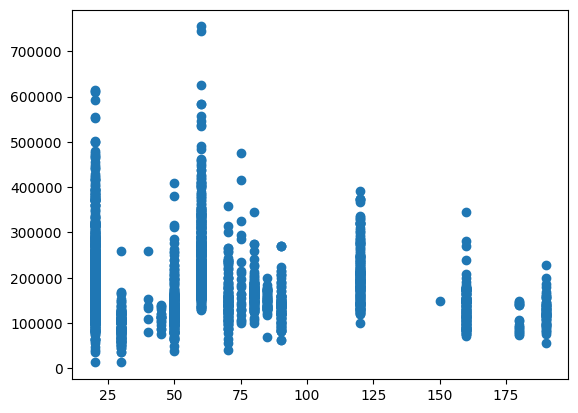

In [284]:
plt.scatter(x='MSSubClass', y='SalePrice',data=df)


In my opinion, there are no outliers here.

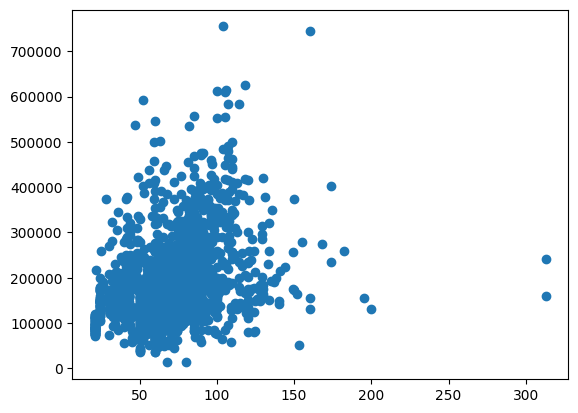

In [285]:
plt.scatter(x='LotFrontage', y='SalePrice',data=df)


The data with LotFrontage greater than 300 stands out.

In [286]:
df.query('LotFrontage > 300')
# Data that falls outside the regression should be deleted. 535427070 , 908154235

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1265  535427070          20       RL        313.0    27650   Pave   NaN   
1498  908154235          60       RL        313.0    63887   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1265      IR2         HLS    AllPub  ...        0    NaN   NaN         NaN   
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1265       0     11   2008       WD          Normal     242000  
1498       0      1   2008       New        Partial     160000  

[2 rows x 81 columns]

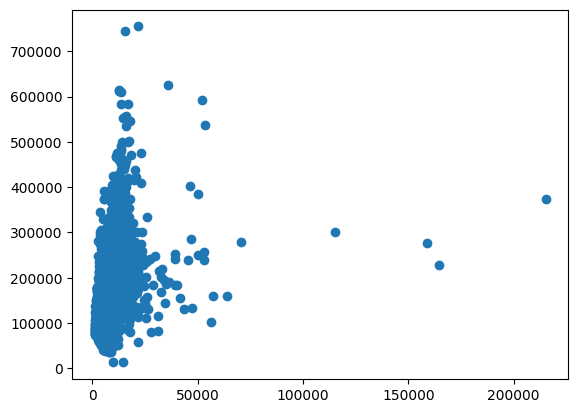

In [287]:
plt.scatter(x='LotArea', y='SalePrice',data=df)


The ones with a LotArea greater than 55,000 stand out.

In [288]:
df.query('LotArea > 55000')
# Data that falls outside the regression should be deleted. 916176125,916125425,906426060,905301050,905301050

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
314    916125360          20       RL          NaN    57200   Pave   NaN   
956    916176125          20       RL        150.0   215245   Pave   NaN   
1498   908154235          60       RL        313.0    63887   Pave   NaN   
1570   916125425         190       RL          NaN   164660   Grvl   NaN   
1610  1007100110          70  I (all)          NaN    56600   Pave   NaN   
2071   905301050          20       RL          NaN   115149   Pave   NaN   
2115   906426060          50       RL          NaN   159000   Pave   NaN   
2766   906475200          20       RL         62.0    70761   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
314       IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   
956       IR3         Low    AllPub  ...        0    NaN   NaN         NaN   
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
1570      IR1         HLS    AllPub  ...        0    NaN   NaN        Shed   
1610      IR1         Low    AllPub  ...        0    NaN   NaN         NaN   
2071      IR2         Low    AllPub  ...        0    NaN   NaN         NaN   
2115      IR2         Low    AllPub  ...        0    NaN   NaN        Shed   
2766      IR1         Low    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
314        0      6   2010       WD          Normal     160000  
956        0      6   2009       WD          Normal     375000  
1498       0      1   2008       New        Partial     160000  
1570     700      8   2008       WD          Normal     228950  
1610       0      1   2008       WD          Normal     103000  
2071       0      6   2007       WD          Normal     302000  
2115     500      6   2007       WD          Normal     277000  
2766       0     12   2006       WD          Normal     280000  

[8 rows x 81 columns]

In [289]:
stats.zscore(df['LotArea']).sort_values().tail(10)

1402     5.467809
15       5.502967
1610     5.895927
314      5.972082
1498     6.820829
2766     7.693311
2071    13.327254
2115    18.893039
1570    19.611435
956     26.031932
Name: LotArea, dtype: float64

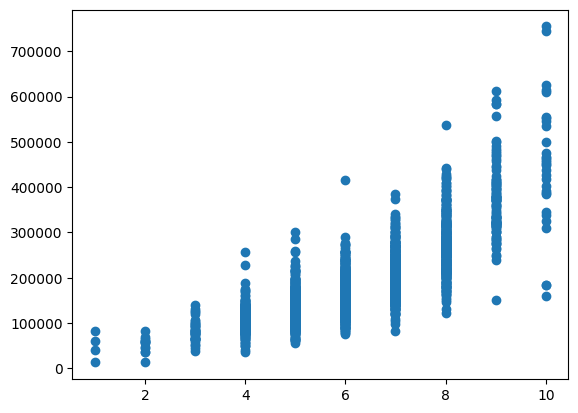

In [290]:
plt.scatter(x='OverallQual', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [291]:
df.query(' OverallQual==10 & SalePrice<300000 ')
# Data that falls outside the regression should be deleted. 908154235,908154195,908154205

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1498  908154235          60       RL        313.0    63887   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   
2181  908154205          60       RL        130.0    40094   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   
2181      IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1498       0      1   2008       New        Partial     160000  
2180   17000     10   2007       New        Partial     183850  
2181       0     10   2007       New        Partial     184750  

[3 rows x 81 columns]

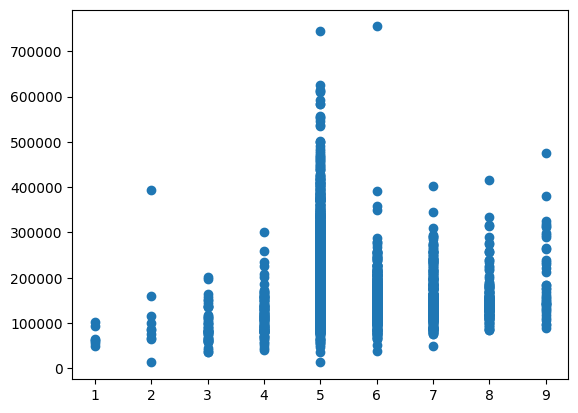

In [292]:
plt.scatter(x='OverallCond', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [293]:
df.query(' OverallCond == 2 & SalePrice > 300000 ')
# Data that falls outside the regression should be deleted. 527258010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
17  527258010          20       RL         88.0    11394   Pave   NaN   

   LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
17      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
17       0      6   2010       New        Partial     394432  

[1 rows x 81 columns]

In [294]:
df.query(' OverallCond == 6 & SalePrice > 700000 ')
# Data that falls outside the regression should be deleted. 528351010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1767      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1767       0      1   2007       WD          Normal     755000  

[1 rows x 81 columns]

In [295]:
df.query(' OverallCond == 5 & SalePrice > 700000 ')
# Data that falls outside the regression should be deleted. 528320050

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  

[1 rows x 81 columns]

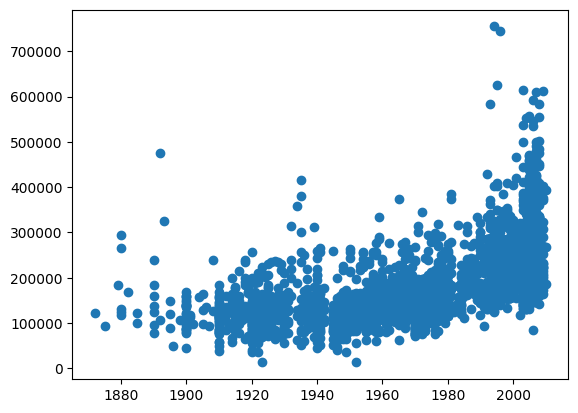

In [296]:
plt.scatter(x='YearBuilt', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [297]:
df.query(' YearBuilt <1900 & SalePrice > 400000 ')
# Data that falls outside the regression should be deleted. 902400110

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2666  902400110          75       RM         90.0    22950   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
2666      IR2         Lvl    AllPub  ...        0    NaN  GdPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2666       0      6   2006       WD          Normal     475000  

[1 rows x 81 columns]

In [298]:
df.query(' YearBuilt >1980 & SalePrice > 700000 ')
# Data that falls outside the regression should be deleted. 528320050,528351010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   
1767      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  
1767       0      1   2007       WD          Normal     755000  

[2 rows x 81 columns]

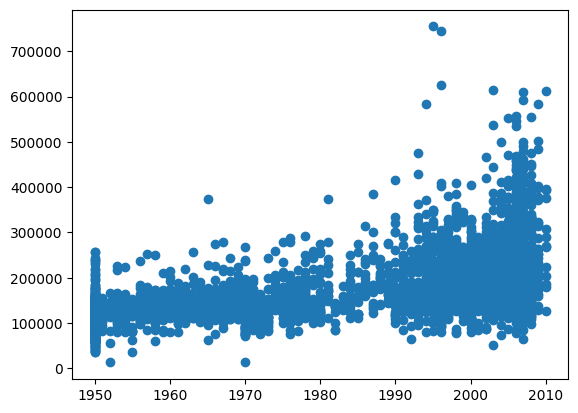

In [299]:
plt.scatter(x='YearRemodAdd', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [300]:
df.query(' YearRemodAdd < 1970 & SalePrice > 300000 ')
# Data that falls outside the regression should be deleted. 916176125

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
956  916176125          20       RL        150.0   215245   Pave   NaN   

    LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
956      IR3         Low    AllPub  ...        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
956       0      6   2009       WD          Normal     375000  

[1 rows x 81 columns]

In [301]:
df.query(' YearRemodAdd > 1990 & SalePrice > 700000 ')
# Data that falls outside the regression should be deleted. 528320050,528351010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   
1767      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  
1767       0      1   2007       WD          Normal     755000  

[2 rows x 81 columns]

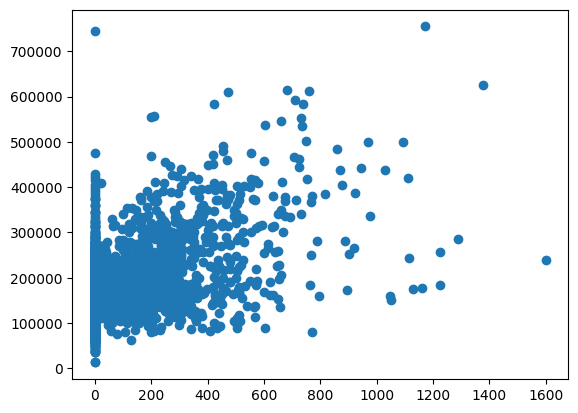

In [302]:
plt.scatter(x='MasVnrArea', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [303]:
df.query(' MasVnrArea > 1500 ')
# Data that falls outside the regression should be deleted. 533241030

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1849  533241030          60       FV         66.0     7399   Pave  Pave   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1849      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1849       0      6   2007       WD          Normal     239000  

[1 rows x 81 columns]

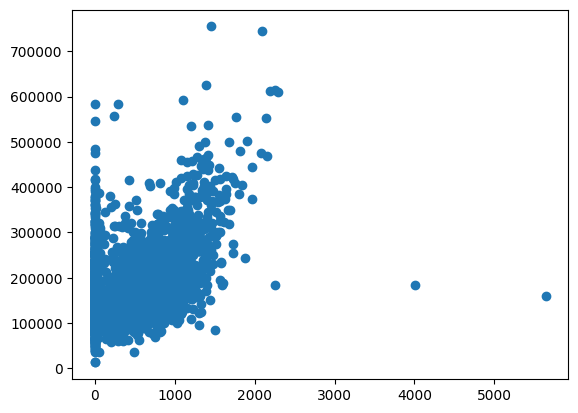

In [304]:
plt.scatter(x='BsmtFinSFOne', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [305]:
df.query(' BsmtFinSFOne > 2100 & SalePrice< 200000 ')
# Data that falls outside the regression should be deleted. 908154235,908154195,908154205

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1498  908154235          60       RL        313.0    63887   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   
2181  908154205          60       RL        130.0    40094   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   
2181      IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1498       0      1   2008       New        Partial     160000  
2180   17000     10   2007       New        Partial     183850  
2181       0     10   2007       New        Partial     184750  

[3 rows x 81 columns]

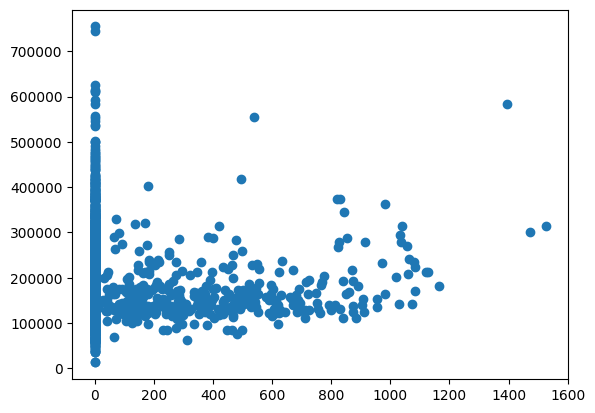

In [306]:
plt.scatter(x='BsmtFinSFTwo', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [307]:
df.query(' BsmtFinSFTwo > 500 & SalePrice> 500000  ')
# dData that falls outside the regression should be deleted.rop 528106020,528360050

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
423   528106020          20       RL        105.0    15431   Pave   NaN   
2450  528360050          60       RL        114.0    17242   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
423       Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2450      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
423        0      4   2009       WD          Normal     555000  
2450       0      5   2006       WD          Normal     584500  

[2 rows x 81 columns]

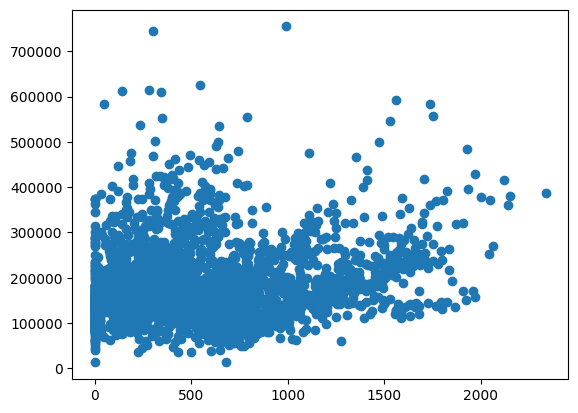

In [308]:
plt.scatter(x='BsmtUnfSF', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [309]:
df.query(' SalePrice> 700000  ')
# Data that falls outside the regression should be deleted. 528320050,528351010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   
1767      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  
1767       0      1   2007       WD          Normal     755000  

[2 rows x 81 columns]

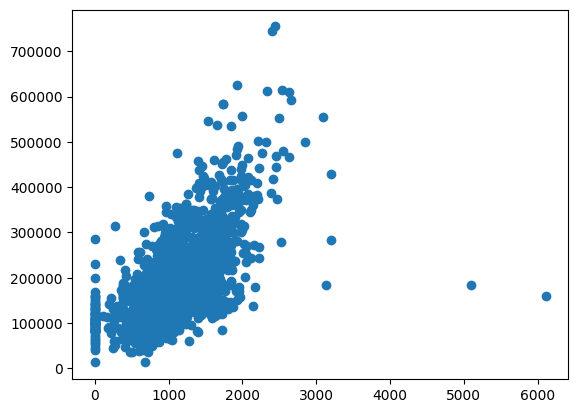

In [310]:
plt.scatter(x='TotalBsmtSF', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [311]:
df.query(' TotalBsmtSF> 3000 & SalePrice <250000  ')
# Data that falls outside the regression should be deleted. 908154235,908154195,908154205

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1498  908154235          60       RL        313.0    63887   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   
2181  908154205          60       RL        130.0    40094   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   
2181      IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1498       0      1   2008       New        Partial     160000  
2180   17000     10   2007       New        Partial     183850  
2181       0     10   2007       New        Partial     184750  

[3 rows x 81 columns]

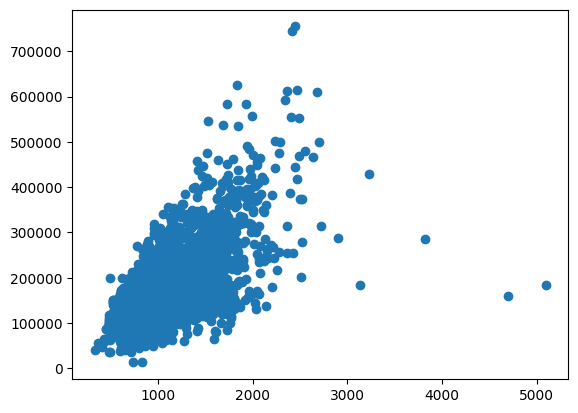

In [312]:
plt.scatter(x='FirstFlrSF', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [313]:
df.query(' FirstFlrSF> 3500')
# Data that falls outside the regression should be deleted. 908154080,908154235,908154195

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1497  908154080          20       RL        123.0    47007   Pave   NaN   
1498  908154235          60       RL        313.0    63887   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1497      IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1497       0      7   2008       WD          Normal     284700  
1498       0      1   2008       New        Partial     160000  
2180   17000     10   2007       New        Partial     183850  

[3 rows x 81 columns]

In [314]:
df.query(' FirstFlrSF> 3000 & FirstFlrSF< 3500 & SalePrice < 200000 ')
# Data that falls outside the regression should be deleted. 908154205

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2181  908154205          60       RL        130.0    40094   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
2181      IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2181       0     10   2007       New        Partial     184750  

[1 rows x 81 columns]

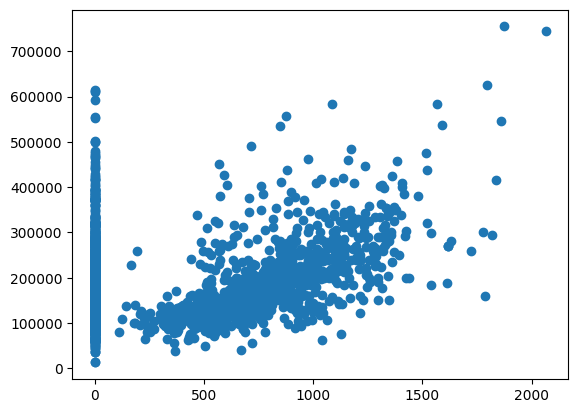

In [315]:
plt.scatter(x='SecondFlrSF', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

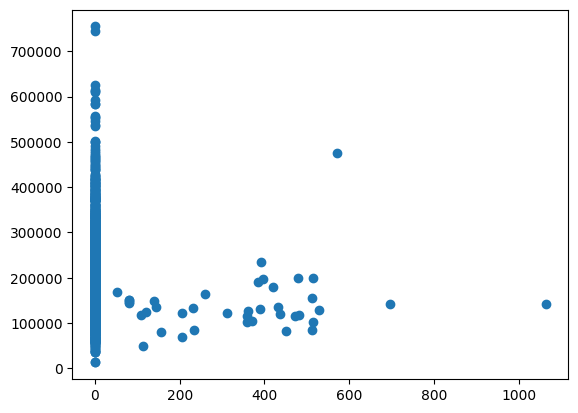

In [316]:
plt.scatter(x='LowQualFinSF', y='SalePrice',data=df)

As seen in this graph, there is very little data in this column, so it can be removed.

In [317]:
df.query(' LowQualFinSF> 500 & SalePrice > 400000 ')
# Data that falls outside the regression should be deleted. 902400110

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2666  902400110          75       RM         90.0    22950   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
2666      IR2         Lvl    AllPub  ...        0    NaN  GdPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2666       0      6   2006       WD          Normal     475000  

[1 rows x 81 columns]

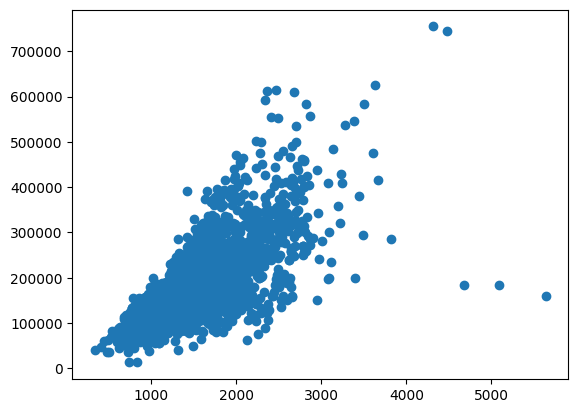

In [318]:
plt.scatter(x='GrLivArea', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [319]:
df.query(' GrLivArea> 4000 & SalePrice < 300000 ')
# Data that falls outside the regression should be deleted. 908154235, 908154195 ,908154205

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1498  908154235          60       RL        313.0    63887   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   
2181  908154205          60       RL        130.0    40094   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
1498      IR3         Bnk    AllPub  ...      480     Gd   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   
2181      IR1         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1498       0      1   2008       New        Partial     160000  
2180   17000     10   2007       New        Partial     183850  
2181       0     10   2007       New        Partial     184750  

[3 rows x 81 columns]

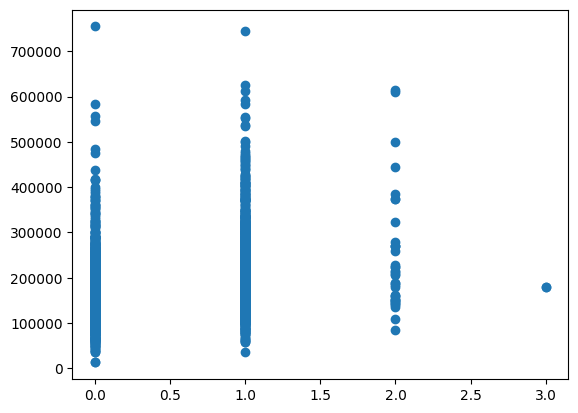

In [320]:
plt.scatter(x='BsmtFullBath', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [321]:
df.query(' BsmtFullBath==3')
# Data that falls outside the regression should be deleted. 904301060,904301070

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
762  904301060          90       RL         60.0    10800   Pave   NaN   
763  904301070          90       RL         60.0    10800   Pave   NaN   

    LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
762      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
763      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
762       0      3   2009       WD          Alloca     179000  
763       0      3   2009       WD          Alloca     179000  

[2 rows x 81 columns]

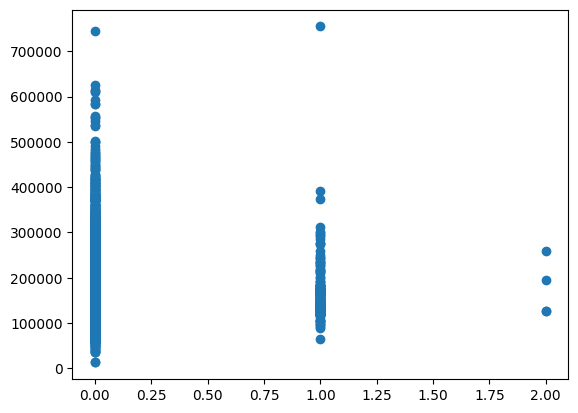

In [322]:
plt.scatter(x='BsmtHalfBath', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [323]:
df.query(' BsmtHalfBath==2')
# Data that falls outside the regression should be deleted. 528228275,532476050,908103310,908103320

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1742  528228275         120       RL         53.0     3922   Pave   NaN   
2498  532476050          80       RL        100.0    14330   Pave   NaN   
2819  908103310          90       RL         38.0     7840   Pave   NaN   
2820  908103320          90       RL         35.0     9400   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1742      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2498      IR1         Low    AllPub  ...      800     Gd  GdPrv         NaN   
2819      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2820      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1742       0      2   2007       New        Partial     194201  
2498       0      1   2006       WD          Normal     260000  
2819       0     10   2006       WD         AdjLand     127500  
2820       0     10   2006       WD         AdjLand     127500  

[4 rows x 81 columns]

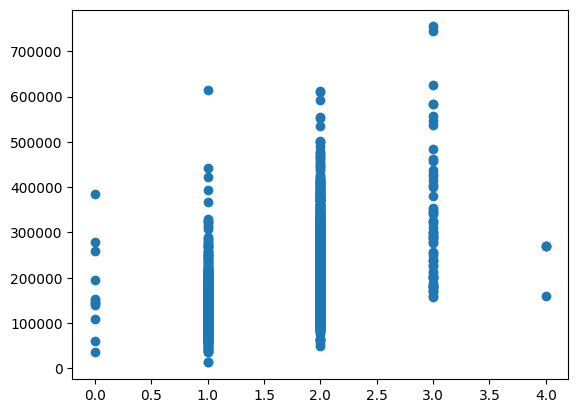

In [324]:
plt.scatter(x='FullBath', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [325]:
df.query(' FullBath==4')
# Data that falls outside the regression should be deleted. 923276250,906230010,906230020,906230030

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
336  923276250          90       RL         70.0     7700   Pave   NaN   
815  906230010          90       RL          NaN    11855   Pave   NaN   
816  906230020          90       RL          NaN     7939   Pave   NaN   
817  906230030          90       RL          NaN     7976   Pave   NaN   

    LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
336      Reg         Lvl    AllPub  ...        0    NaN   NaN        Shed   
815      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
816      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
817      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
336     600      2   2010       WD          Normal     159000  
815       0     10   2009       WD          Normal     269500  
816       0     10   2009       WD          Normal     269500  
817       0     10   2009       WD          Normal     269500  

[4 rows x 81 columns]

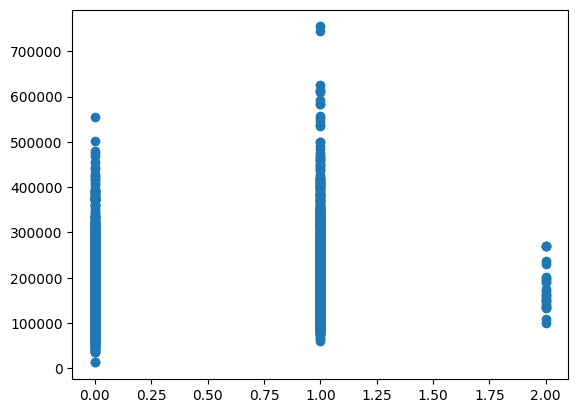

In [326]:
plt.scatter(x='HalfBath', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

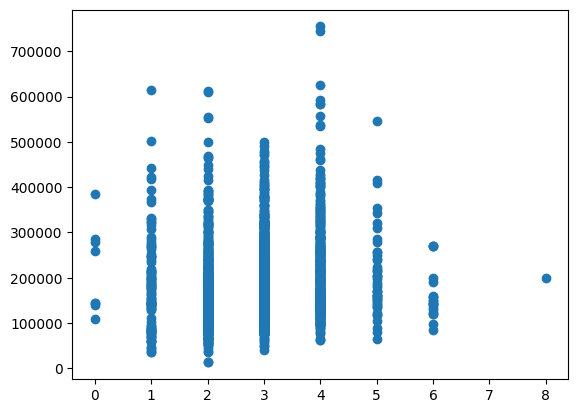

In [327]:
plt.scatter(x='BedroomAbvGr', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [328]:
df.query(' BedroomAbvGr==8')
# Data that falls outside the regression should be deleted. 909176080

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2194  909176080         190       RH         60.0    10896   Pave  Pave   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
2194      Reg         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2194       0      3   2007       WD         Abnorml     200000  

[1 rows x 81 columns]

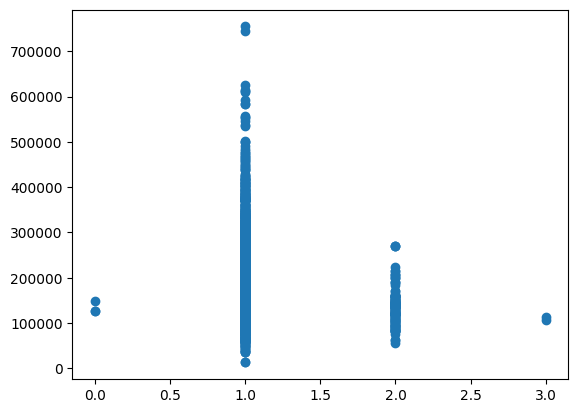

In [329]:
plt.scatter(x='KitchenAbvGr', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [330]:
stats.zscore(df.KitchenAbvGr).unique()

array([-0.20729145,  4.46473882,  9.13676908, -4.87932171])

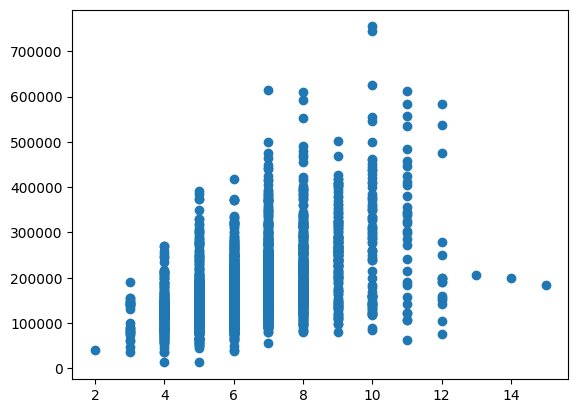

In [331]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [332]:
df.query(' TotRmsAbvGrd>12')
# Data that falls outside the regression should be deleted. 909279010,908154195,909176080

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
925   909279010          90       RL          NaN     8145   Pave   NaN   
2180  908154195          20       RL        128.0    39290   Pave   NaN   
2194  909176080         190       RH         60.0    10896   Pave  Pave   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
925       IR1         HLS    AllPub  ...        0    NaN   NaN         NaN   
2180      IR1         Bnk    AllPub  ...        0    NaN   NaN        Elev   
2194      Reg         Bnk    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
925        0      7   2009       WD          Normal     205000  
2180   17000     10   2007       New        Partial     183850  
2194       0      3   2007       WD         Abnorml     200000  

[3 rows x 81 columns]

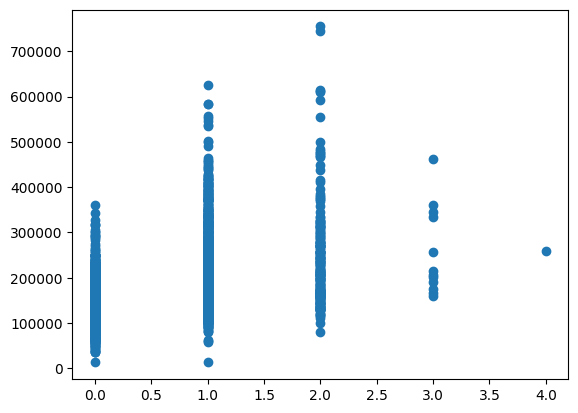

In [333]:
plt.scatter(x='Fireplaces', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [334]:
df.query(' Fireplaces==4')
# Data that falls outside the regression should be deleted. 532476050


PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2498  532476050          80       RL        100.0    14330   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
2498      IR1         Low    AllPub  ...      800     Gd  GdPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2498       0      1   2006       WD          Normal     260000  

[1 rows x 81 columns]

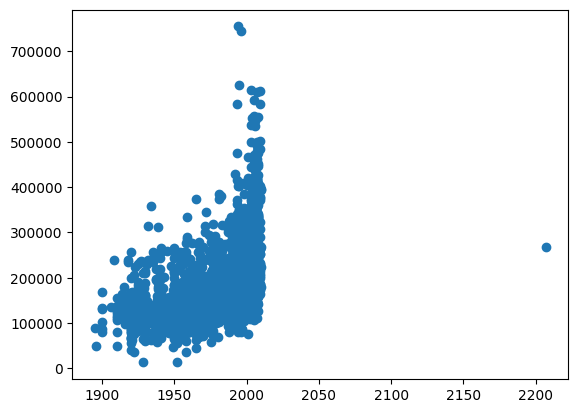

In [335]:
plt.scatter(x='GarageYrBlt', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [336]:
df.query(' GarageYrBlt>2200')
# Data that falls outside the regression should be deleted. 916384070

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2260  916384070          20       RL         68.0     8298   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
2260      IR1         HLS    AllPub  ...        0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2260       0      9   2007       New        Partial     267300  

[1 rows x 81 columns]

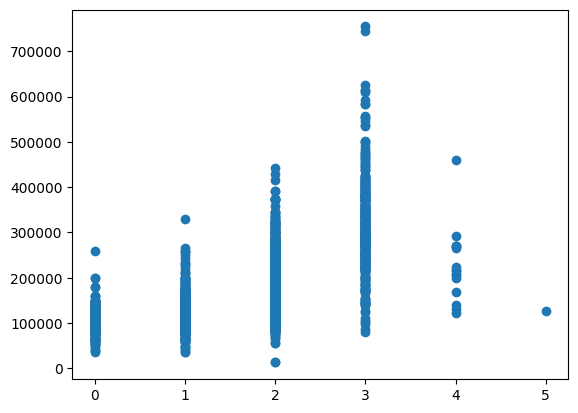

In [337]:
plt.scatter(x='GarageCars', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [338]:
df.query('GarageCars==5')
# Data that falls outside the regression should be deleted. 903236040


PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
746  903236040          30       RM         50.0     8635   Pave   NaN   

    LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
746      Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
746       0      8   2009       WD          Normal     126500  

[1 rows x 81 columns]

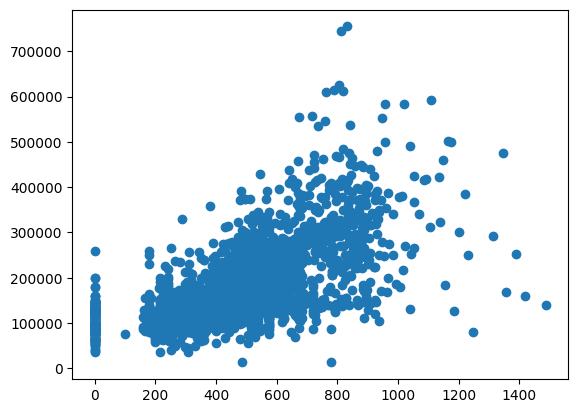

In [339]:
plt.scatter(x='GarageArea', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

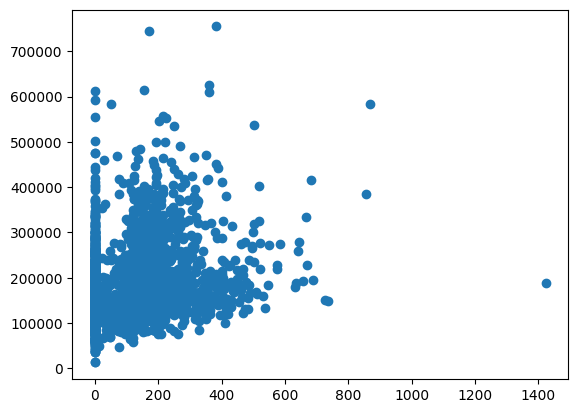

In [340]:
plt.scatter(x='WoodDeckSF', y='SalePrice',data=df)

It looks like there are several outliers in this graph.

In [341]:
df.query('WoodDeckSF>800')
# Data that falls outside the regression should be deleted. 923229100,528360050,533350050

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2293  923229100          80       RL          NaN    15957   Pave   NaN   
2450  528360050          60       RL        114.0    17242   Pave   NaN   
2522  533350050          20       RL         68.0    50271   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
2293      IR1         Low    AllPub  ...        0    NaN  MnPrv         NaN   
2450      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2522      IR1         Low    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2293       0      9   2007       WD          Normal     188000  
2450       0      5   2006       WD          Normal     584500  
2522       0     11   2006       WD          Normal     385000  

[3 rows x 81 columns]

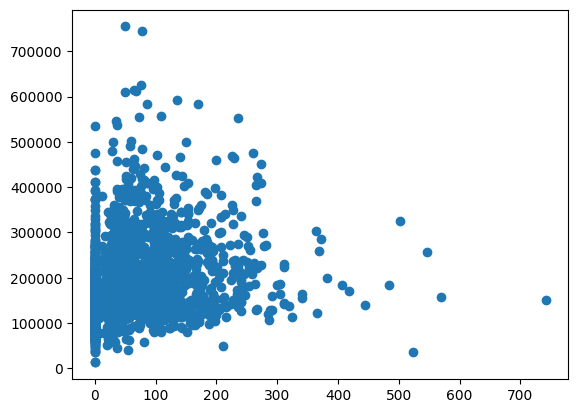

In [342]:
plt.scatter(x='OpenPorchSF', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [343]:
df.query('SalePrice>700000')
# Data that falls outside the regression should be deleted. 528320050,528351010

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   
1767      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  
1767       0      1   2007       WD          Normal     755000  

[2 rows x 81 columns]

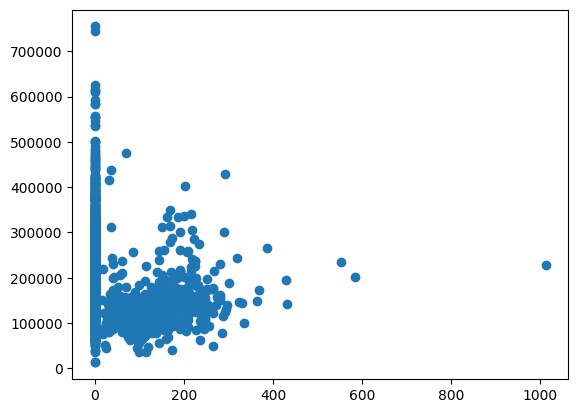

In [344]:
plt.scatter(x='EnclosedPorch', y='SalePrice',data=df)


It looks like there are several outliers in this graph.

In [345]:
df.query('SalePrice>700000')
# Data that falls outside the regression should be deleted. 528320050,528320050

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1760  528320050          60       RL        160.0    15623   Pave   NaN   
1767  528351010          60       RL        104.0    21535   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1760      IR1         Lvl    AllPub  ...      555     Ex  MnPrv         NaN   
1767      IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1760       0      7   2007       WD         Abnorml     745000  
1767       0      1   2007       WD          Normal     755000  

[2 rows x 81 columns]

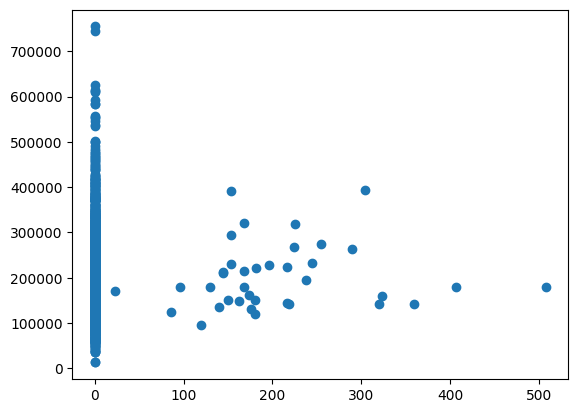

In [346]:
plt.scatter(x='3SsnPorch', y='SalePrice',data=df)


As seen in this graph, there is very little data in this column, so it can be removed.

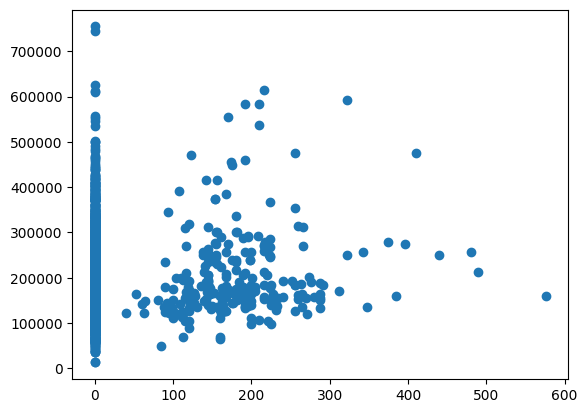

In [347]:
plt.scatter(x='ScreenPorch', y='SalePrice',data=df)


As seen in this graph, there is very little data in this column, so it can be removed.

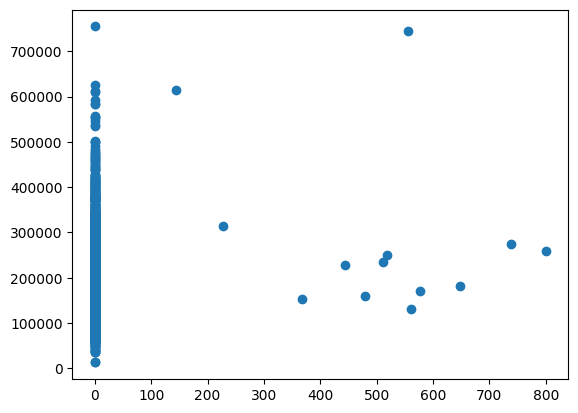

In [348]:
plt.scatter(x='PoolArea', y='SalePrice',data=df)


As seen in this graph, there is very little data in this column, so it can be removed.

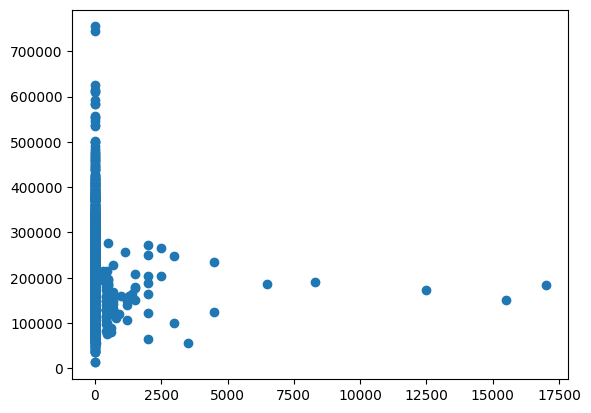

In [349]:
plt.scatter(x='MiscVal', y='SalePrice',data=df)


As seen in this graph, there is very little data in this column, so it can be removed.

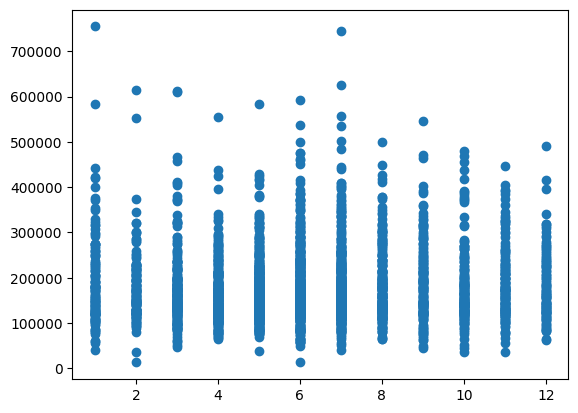

In [350]:
plt.scatter(x='MoSold', y='SalePrice',data=df)


In my opinion, there is no separated data here.

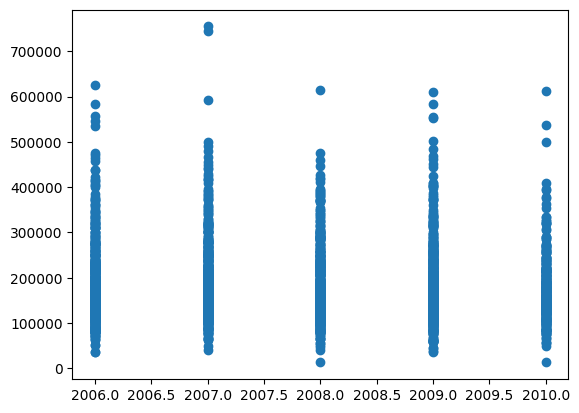

In [351]:
plt.scatter(x='YrSold', y='SalePrice',data=df)

In my opinion, there is no separated data here.

In [352]:
values = [535427070 , 908154235 ,916176125,916125425,906426060,905301050,905301050,908154235,908154195,908154205,527258010,
528351010,528320050,902400110,528320050,528351010,916176125,528320050,528351010,533241030,908154235,908154195,908154205,
528106020,528360050,528320050,528351010,908154235,908154195,908154205,908154080,908154235,908154195,908154205,902400110,
908154235, 908154195 ,908154205,904301060,904301070,528228275,532476050,908103310,908103320,923276250,906230010,906230020,906230030,
909176080,909279010,908154195,909176080,532476050,916384070,903236040,923229100,528360050,533350050,528320050,528351010,
528320050,528320050] # All the identified outliers
unique_df = pd.DataFrame(values, columns=['Numbers'])
unique_df = unique_df.drop_duplicates() # dropping duplicates
values = unique_df['Numbers'].tolist()
# droping columns Misc_Val ,Pool_Area,3Ssn_Porch, Scren_Porch

In [353]:
# Removing the outliers
df= df[df.PID.isin(values)==False]

In [354]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(30)

0
PoolQC          2888
MiscFeature     2796
Alley           2702
Fence           2330
MasVnrType      1760
FireplaceQu     1415
LotFrontage      482
GarageYrBlt      154
GarageCond       154
GarageQual       154
GarageFinish     154
GarageType       152
BsmtExposure      82
BsmtFinTypeTwo    80
BsmtCond          79
BsmtQual          79
BsmtFinTypeOne    79
MasVnrArea        22
Electrical         1
TotalBsmtSF        1
BsmtHalfBath       1
BsmtFinSFTwo       1
GarageArea         1
GarageCars         1
BsmtUnfSF          1
BsmtFullBath       1
BsmtFinSFOne       1
Street             0
LotShape           0
MSSubClass         0

In [355]:
df['MiscFeature'].unique()
# There are too many NaN values, these colmuns should be deleted   Misc_Feature,Pool_QC

array([nan, 'Gar2', 'Shed', 'Othr', 'TenC'], dtype=object)

In [356]:
df['Alley'].unique()
# This column needs to be deleted

array([nan, 'Pave', 'Grvl'], dtype=object)

In [357]:
df['Alley'].fillna('No', inplace=True)

C:\Temp\ipykernel_11676\3249686857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alley'].fillna('No', inplace=True)


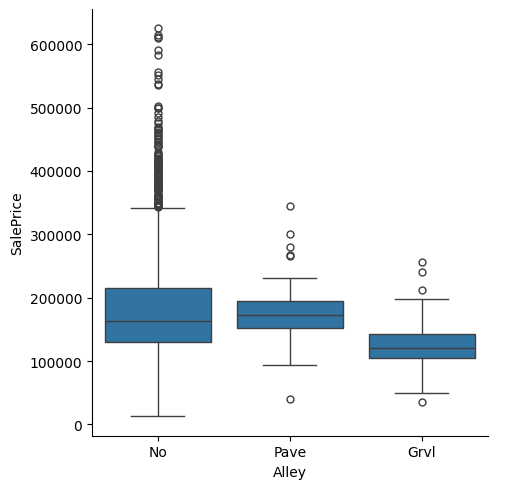

In [358]:
sns.catplot(data=df, x="Alley", y='SalePrice',kind='box')

As seen in this graph, there is very little data in this column, so it can be removed.

In [359]:
df.query('Alley == "Pave"').count()

PID              76
MSSubClass       76
MSZoning         76
LotFrontage      69
LotArea          76
                 ..
MoSold           76
YrSold           76
SaleType         76
SaleCondition    76
SalePrice        76
Length: 81, dtype: int64

In [360]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [361]:
df.Fence.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\1945659599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Fence.fillna('No',inplace=True)


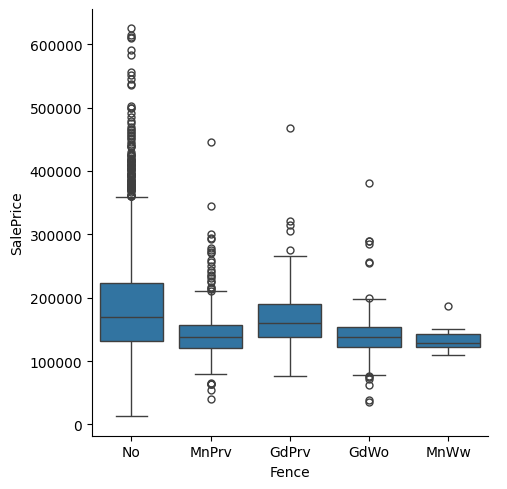

In [362]:
sns.catplot(df, x='Fence', y='SalePrice',kind='box')

Houses without fences show the widest price range with some very high outliers. 'GdPrv' fences have the highest median sale price. Other fence types have similar price distributions. Outliers are frequent, especially in 'No' and 'GdPrv' categories.

In [363]:
df.MasVnrType.unique()

array(['Stone', nan, 'BrkFace', 'BrkCmn', 'CBlock'], dtype=object)

In [364]:
df.MasVnrType.fillna("No", inplace=True)

C:\Temp\ipykernel_11676\2278526759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MasVnrType.fillna("No", inplace=True)


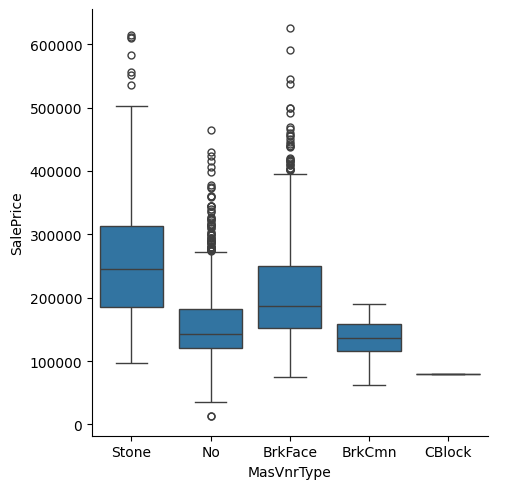

In [365]:
sns.catplot(df, x='MasVnrType',y='SalePrice',kind='box')

Houses with 'Stone' veneer have the highest median and widest price range. 'BrkFace' also shows relatively higher prices. 'No' veneer houses have lower median prices. 'CBlock' has the lowest and most consistent sale price.

In [366]:
df.query('MasVnrType=="CBlock"')
# The CBlock category needs to be deleted because it has only one value. 923251160

PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
2298  923251160          20       RL        124.0    27697   Pave    No   

     LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
2298      Reg         Lvl    AllPub  ...        0    NaN    No         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2298       0     11   2007       COD        Abnorml      80000  

[1 rows x 81 columns]

In [367]:
df.FireplaceQu.unique()

array(['Gd', nan, 'TA', 'Po', 'Fa', 'Ex'], dtype=object)

In [368]:
df.FireplaceQu.fillna('No', inplace=True)

C:\Temp\ipykernel_11676\2679049027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.FireplaceQu.fillna('No', inplace=True)


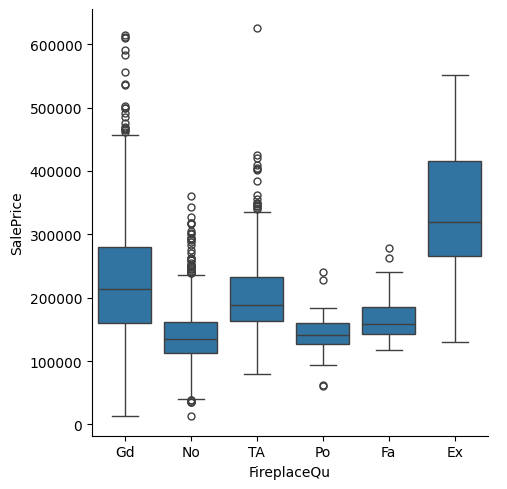

In [369]:
sns.catplot(df, x='FireplaceQu', y='SalePrice', kind='box')

Houses with 'Ex' (Excellent) fireplace quality have the highest median and price range. 'Gd' (Good) and 'TA' (Typical) also show relatively higher prices. Houses with 'Po' (Poor), 'Fa' (Fair), or no fireplace tend to have lower sale prices.

In [370]:
df.LotFrontage.value_counts() #!!!!


LotFrontage
60.0     273
80.0     137
70.0     132
50.0     116
75.0     105
        ... 
168.0      1
111.0      1
131.0      1
153.0      1
133.0      1
Name: count, Length: 126, dtype: int64

In [371]:
df.LotFrontage.fillna(0,inplace=True)

C:\Temp\ipykernel_11676\406545366.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.LotFrontage.fillna(0,inplace=True)


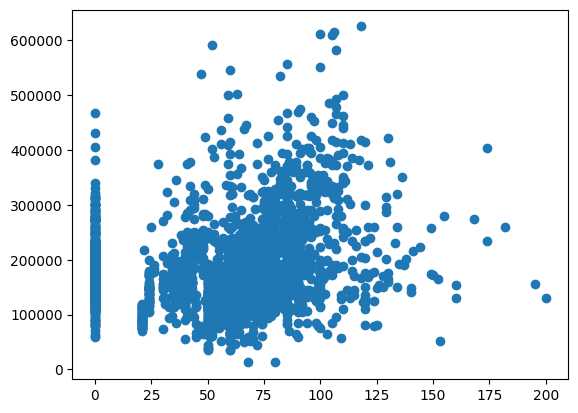

In [372]:
plt.scatter(x='LotFrontage', y='SalePrice',data=df) # !!!!!

There is a weak positive correlation between LotFrontage and SalePrice — larger frontages may slightly increase house prices, but many outliers exist.

In [373]:
stats.zscore(df.GarageYrBlt.value_counts()).sort_values()

GarageYrBlt
1943.0   -1.014315
1906.0   -1.014315
1908.0   -1.014315
1933.0   -1.014315
1895.0   -1.014315
            ...   
2003.0    2.549225
2004.0    2.823343
2006.0    3.410740
2007.0    3.410740
2005.0    4.507214
Name: count, Length: 102, dtype: float64

In [374]:
df.GarageCond.unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [375]:
df.GarageCond.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\1331513026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.GarageCond.fillna('No',inplace=True)


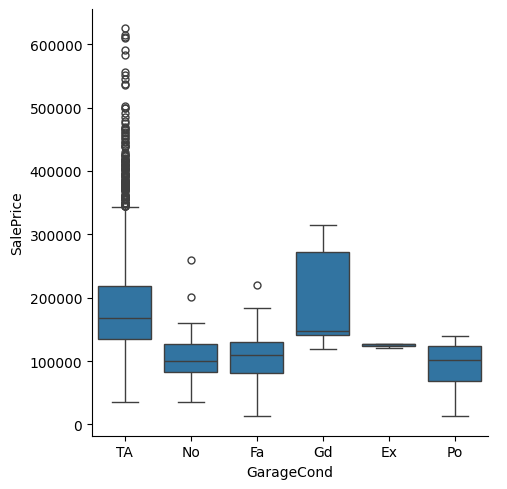

In [376]:
sns.catplot(df, x='GarageCond',y='SalePrice',kind='box')

Garage condition seems to have some influence on sale price. Houses with 'Ex' (Excellent) or 'Gd' (Good) garage conditions tend to have higher median prices, while 'Po', 'Fa', and 'No' garages are associated with lower prices. However, outliers are present in almost all categories

In [377]:
df[df.GarageCond== 'Ex']['GarageCond'].count()
# The Ex category needs to be deleted because it has only one value.

np.int64(3)

In [378]:
df.GarageQual.unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [379]:
df.GarageQual.fillna('No', inplace=True)

C:\Temp\ipykernel_11676\2692553825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.GarageQual.fillna('No', inplace=True)


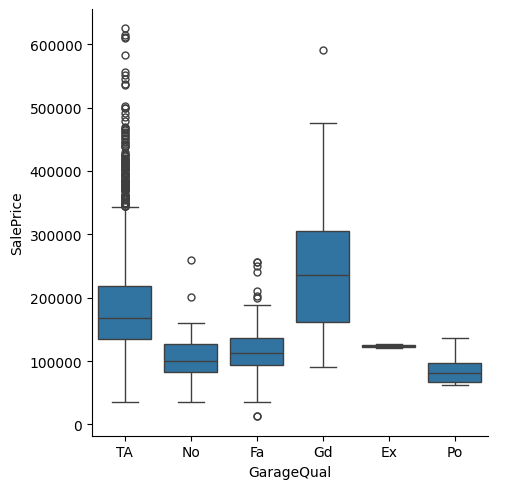

In [380]:
sns.catplot(df, x='GarageQual',y='SalePrice',kind='box')


Garaj sifati yaxshilangan sari uy narxi oshadi. 'Ex' (a’lo) va 'Gd' (yaxshi) garajli uylarda median narx yuqoriroq. 'Fa', 'Po' va 'No' garajlarda esa narx pastroq. Aksar toifalarda chetga chiqmalar (outlier) mavjud.

In [381]:
df[df.GarageQual== 'Ex']['GarageQual'].count()
# The Ex category needs to be deleted because it has only one value.

np.int64(2)

In [382]:
df.GarageFinish.unique()

array(['Fin', 'Unf', 'RFn', nan], dtype=object)

In [383]:
df.GarageFinish.fillna('No', inplace=True)

C:\Temp\ipykernel_11676\2596766192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.GarageFinish.fillna('No', inplace=True)


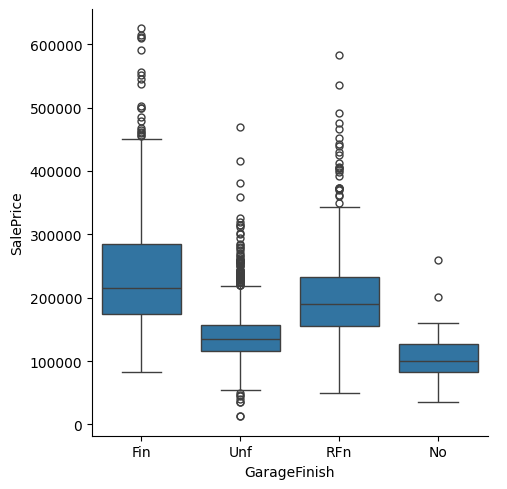

In [384]:
sns.catplot(df, x='GarageFinish',y='SalePrice',kind='box')

Finished garages ('Fin') are associated with higher median sale prices. 'RFn' (Rough Finish) shows moderate prices, while 'Unf' (Unfinished) and 'No' garage types have lower prices. The trend suggests that better garage finishing adds value to the property.

In [385]:
df.GarageType.unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [386]:
df.GarageType.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\1626718618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.GarageType.fillna('No',inplace=True)


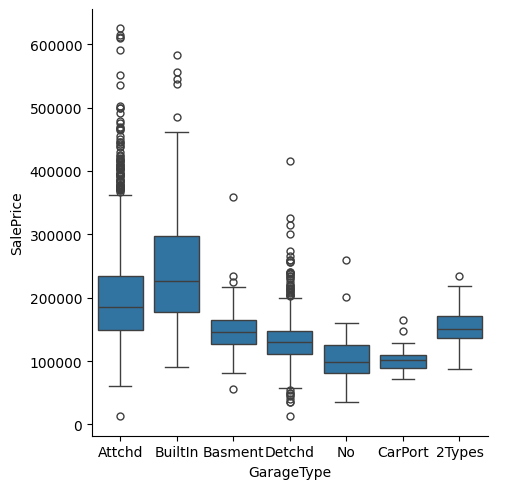

In [387]:
sns.catplot(df, x='GarageType',y='SalePrice',kind='box')

This diagram shows the relationship between "GarageType" (garage type) and "SalePrice" (sale price). The box plot method visually displays the distribution of prices for each garage type, highlighting the median, quartiles, and outliers. This graph helps in understanding how the garage type influences house prices.

In [388]:
df[df.GarageType== 'CarPort']['GarageType'].count()

np.int64(15)

In [389]:
df.BsmtExposure.unique()


array(['Gd', 'No', 'Mn', 'Av', nan], dtype=object)

In [390]:
df.BsmtExposure.fillna('NoBas',inplace=True)

C:\Temp\ipykernel_11676\572838688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BsmtExposure.fillna('NoBas',inplace=True)


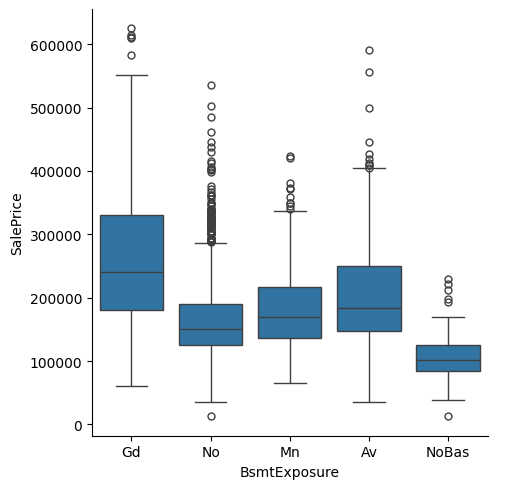

In [391]:
sns.catplot(df, x='BsmtExposure',y='SalePrice',kind='box')


In this graph, BsmtExposure and SalePrice are depicted in box plots. It is clear that the Gd category has a higher median value than the others.

In [392]:
df.BsmtFinTypeTwo.unique()

array(['Unf', 'LwQ', 'BLQ', 'Rec', nan, 'GLQ', 'ALQ'], dtype=object)

In [393]:
df.BsmtFinTypeTwo.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\1980466588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BsmtFinTypeTwo.fillna('No',inplace=True)


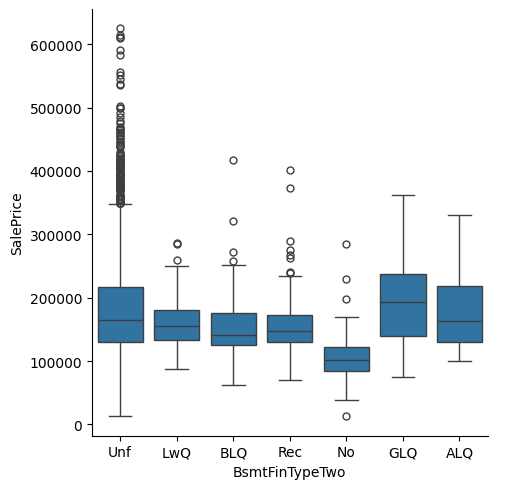

In [394]:
sns.catplot(df, x='BsmtFinTypeTwo',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [395]:
df.BsmtCond.unique()

array(['Gd', 'TA', nan, 'Po', 'Fa', 'Ex'], dtype=object)

In [396]:
df.BsmtCond.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\2379327983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BsmtCond.fillna('No',inplace=True)


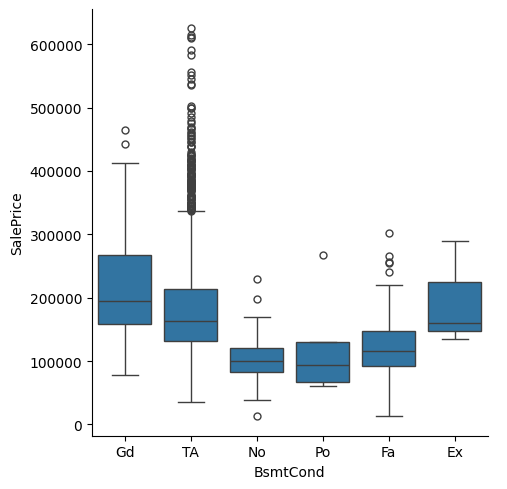

In [397]:
sns.catplot(df, x='BsmtCond',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [398]:
df.BsmtQual.unique()

array(['TA', 'Gd', 'Ex', nan, 'Fa', 'Po'], dtype=object)

In [399]:
df.BsmtQual.fillna('No', inplace=True)

C:\Temp\ipykernel_11676\2114953064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BsmtQual.fillna('No', inplace=True)


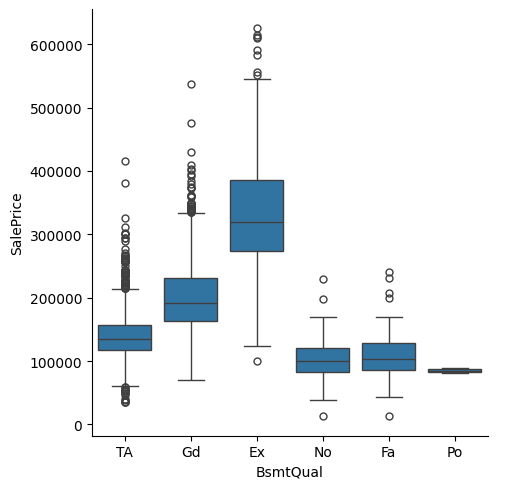

In [400]:
sns.catplot(df, x='BsmtQual',y='SalePrice',kind='box')


I want to remove the Po column in BsmtQual from this graph because it is very small.

In [401]:
df[df.BsmtQual =='Po']['BsmtQual'].count()
# The Po category needs to be deleted because it has only one value.

np.int64(2)

In [402]:
df.BsmtFinTypeOne.unique()

array(['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ', nan], dtype=object)

In [403]:
df.BsmtFinTypeOne.fillna('No',inplace=True)

C:\Temp\ipykernel_11676\46885060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BsmtFinTypeOne.fillna('No',inplace=True)


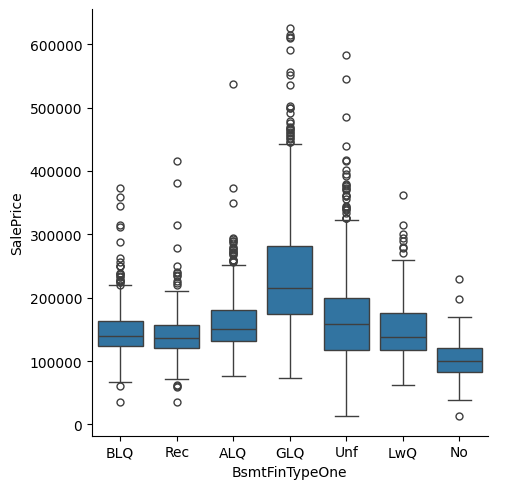

In [404]:
sns.catplot(df, x='BsmtFinTypeOne',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [405]:
df.MasVnrArea.unique()

array([1.120e+02, 0.000e+00, 1.080e+02, 2.000e+01, 6.030e+02, 1.190e+02,
       4.800e+02, 8.100e+01, 1.800e+02, 5.040e+02, 4.920e+02, 3.810e+02,
       1.620e+02, 2.000e+02, 4.500e+02, 2.560e+02, 2.260e+02, 6.150e+02,
       2.400e+02, 1.680e+02, 7.600e+02, 1.280e+02, 1.095e+03, 2.320e+02,
       4.120e+02, 1.780e+02, 1.060e+02, 1.400e+01, 1.600e+01,       nan,
       1.650e+02, 1.140e+02, 3.380e+02, 3.620e+02, 3.480e+02, 3.000e+01,
       5.790e+02, 3.600e+01, 1.220e+02, 1.300e+02, 3.100e+01, 2.500e+02,
       1.200e+02, 2.160e+02, 4.320e+02, 1.159e+03, 2.890e+02, 2.800e+01,
       4.200e+01, 1.720e+02, 4.510e+02, 2.680e+02, 8.600e+01, 1.560e+02,
       1.440e+02, 2.650e+02, 3.400e+02, 1.100e+02, 1.640e+02, 3.610e+02,
       2.870e+02, 5.060e+02, 1.500e+02, 2.200e+02, 3.240e+02, 9.100e+01,
       1.040e+02, 3.000e+02, 2.610e+02, 2.180e+02, 3.510e+02, 7.710e+02,
       2.940e+02, 9.000e+01, 7.200e+01, 4.700e+01, 1.430e+02, 3.280e+02,
       2.880e+02, 9.600e+01, 3.360e+02, 1.770e+02, 

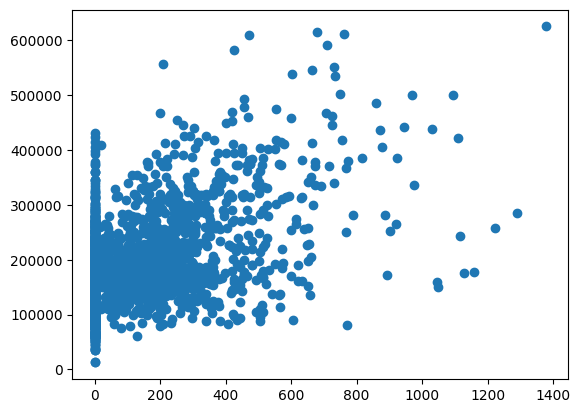

In [406]:
plt.scatter(x='MasVnrArea', y='SalePrice',data=df)


As you can see in this graph, there is no information that is left out.

In [407]:
df.MasVnrArea.fillna(0,inplace=True)

C:\Temp\ipykernel_11676\3660953967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MasVnrArea.fillna(0,inplace=True)


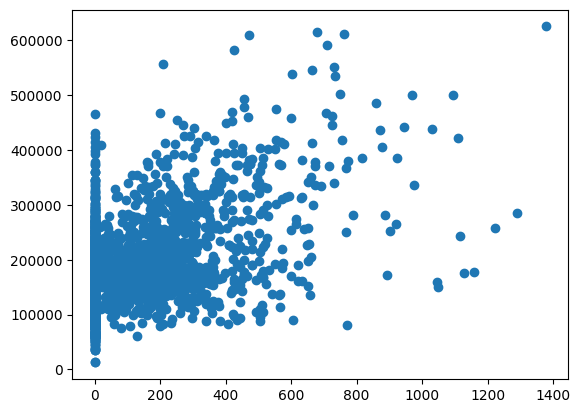

In [408]:
plt.scatter(x='MasVnrArea', y='SalePrice',data=df)

As you can see in this graph, there is no information that is left out.

In [409]:
df.Electrical.unique()
# drop nan

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', nan, 'Mix'], dtype=object)

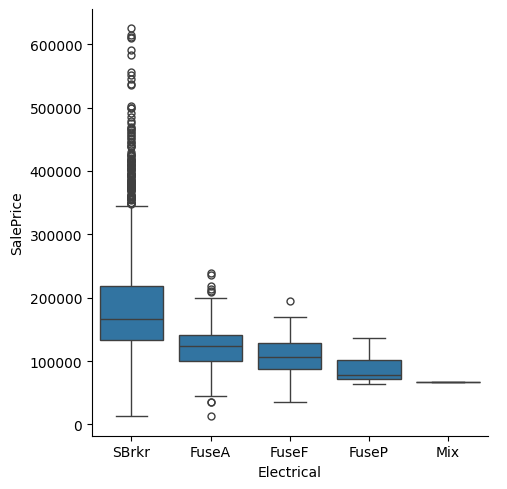

In [410]:
sns.catplot(df, x='Electrical',y='SalePrice',kind='box')


The Mix category in this Electrical column is very small. I want to delete it.

In [411]:
df[df.Electrical =='Mix']['Electrical'].count()
# The Mix category needs to be deleted because it has only one value.


np.int64(1)

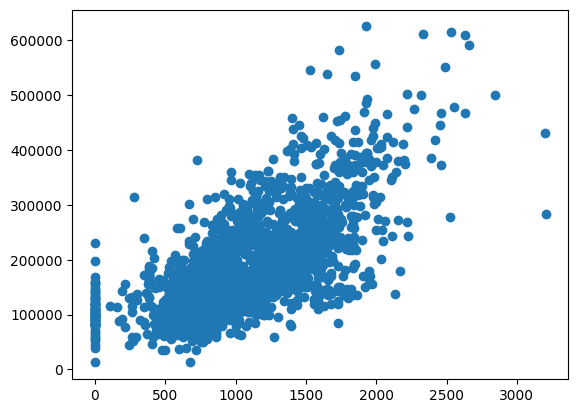

In [412]:
plt.scatter(x='TotalBsmtSF', y='SalePrice',data=df)


As you can see in this graph, there is no information that is left out.

In [413]:
df.TotalBsmtSF.dropna(inplace=True)

In [414]:
df.BsmtHalfBath.unique()

array([ 0.,  1., nan])

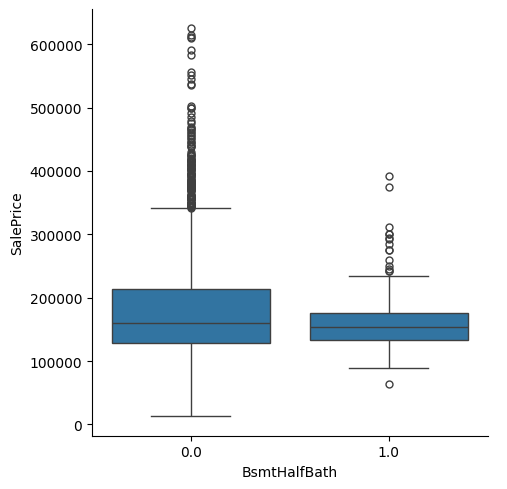

In [415]:
sns.catplot(df, x='BsmtHalfBath',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [416]:
df.BsmtFinSFTwo.unique()

array([   0.,  144., 1120.,  163.,  168.,   78.,  119.,  121.,  117.,
        859.,  981.,   42.,   46.,   81., 1029.,  290.,  132.,  713.,
        162.,  362.,  240.,  258.,  174.,  906.,  486.,  350.,  263.,
       1073.,  692.,   12.,  159.,  712.,  668.,  474.,  453.,  684.,
        387.,  688.,  972.,  127.,  252.,  334.,  232.,  480.,  590.,
        284.,  276.,  472.,  239.,  180.,  294.,  622.,  495.,  479.,
        113., 1526.,  360.,  774.,  364.,  596.,  884.,  311.,   92.,
        216.,  136.,   32.,  147., 1127.,  466.,  630.,  201.,  345.,
        512.,  230.,  247.,  661.,  620.,  202.,  483.,  750.,  690.,
        105.,   60.,  352.,  102.,   95.,  465.,   63.,  262.,  500.,
        670.,  768.,  393.,  286.,  450.,  177.,  764.,  344.,   72.,
        243.,  420.,  210.,  694.,  875.,  507.,  435.,  419.,  250.,
        116.,  354.,  624.,  273.,   76.,  270.,  110.,  288.,  411.,
        228.,  186.,  449.,   48.,   93.,  438.,  613.,  852.,  555.,
        841.,  799.,

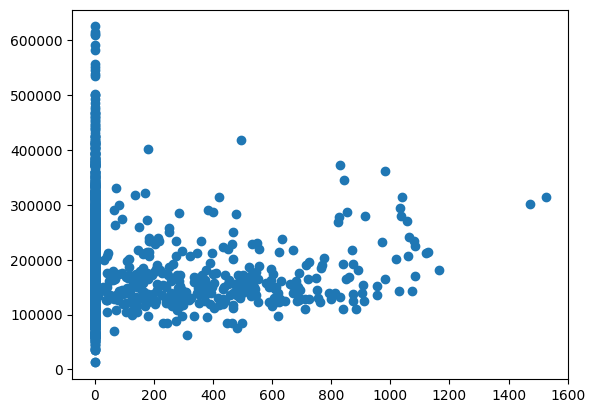

In [417]:
plt.scatter(x='BsmtFinSFTwo', y='SalePrice',data=df)


As you can see in this graph, there is no information that is left out.

In [418]:
df.GarageArea.unique()

array([ 528.,  730.,  312.,  522.,  482.,  470.,  582.,  506.,  608.,
        442.,  440.,  420.,  393.,  841.,  492.,  400.,  500.,  546.,
        663.,  480.,  304.,  525.,    0.,  511.,  264.,  320.,  308.,
        751.,  772.,  606.,  868.,  532.,  678.,  820.,  484.,  958.,
        756.,  576.,  474.,  430.,  437.,  433.,  434.,  779.,  962.,
        527.,  712.,  671.,  486.,  666.,  880.,  676.,  614.,  750.,
        618.,  463.,  462.,  457.,  476.,  429.,  539.,  336.,  280.,
        260.,  461.,  564.,  762.,  713.,  588.,  496.,  852.,  592.,
        475.,  596.,  535.,  660.,  441.,  490.,  504.,  517.,  240.,
        364.,  244.,  315.,  578.,  620.,  447.,  294.,  531.,  263.,
        318.,  305.,  246.,  392.,  330.,  720.,  360.,  551.,  379.,
        220.,  780.,  288.,  416.,  624.,  923.,  560.,  363.,  200.,
        572.,  180.,  516.,  672.,  349.,  365.,  231.,  450.,  270.,
        299.,  591.,  533.,  690.,  436.,  586.,  366.,  467.,  209.,
        460., 1017.,

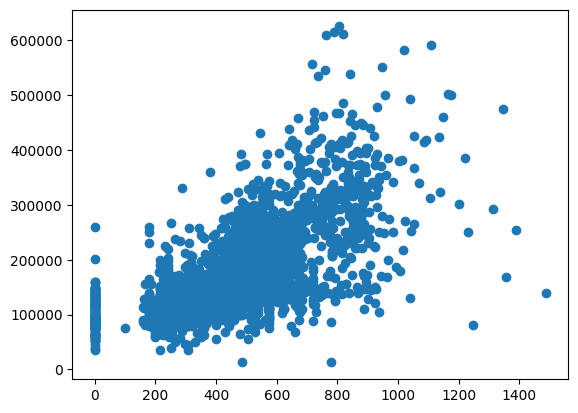

In [419]:
plt.scatter(x='GarageArea', y='SalePrice',data=df)

As you can see in this graph, there is no information that is left out.

In [420]:
df.GarageCars.unique()

array([ 2.,  1.,  3.,  0.,  4., nan])

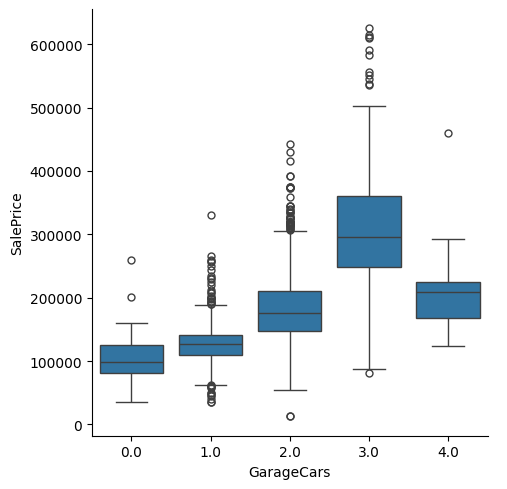

In [421]:
sns.catplot(df, x='GarageCars',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [422]:
df.BsmtUnfSF.unique()

array([ 441.,  270.,  406., ...,   45., 1503.,  239.])

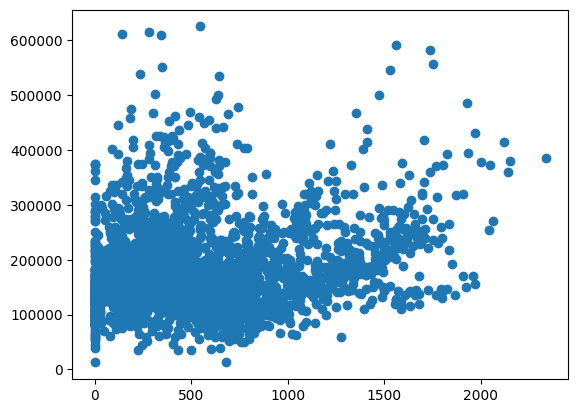

In [423]:
plt.scatter(x='BsmtUnfSF', y='SalePrice',data=df)


As you can see in this graph, there is no information that is left out.

In [424]:
df.BsmtFullBath.unique()

array([ 1.,  0.,  2., nan])

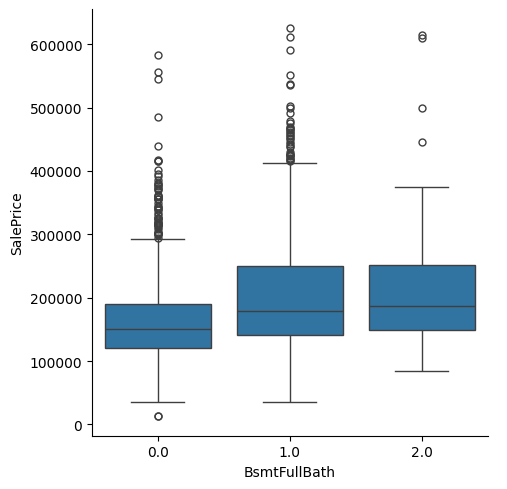

In [425]:
sns.catplot(df, x='BsmtFullBath',y='SalePrice',kind='box')


As you can see in this graph, there is no information that is left out.

In [426]:
df.BsmtFinSFOne.dropna(inplace=True)

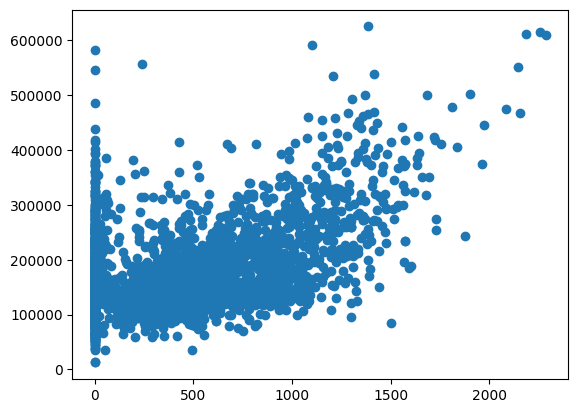

In [427]:
plt.scatter(x='BsmtFinSFOne', y='SalePrice',data=df)


As you can see in this graph, there is no information that is left out.

In [428]:
# Too many columns with NaN values ​​are being deleted.
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinTypeTwo'],inplace=True)
df.dropna(inplace=True)

In [429]:

pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(30)

0
PID             0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
ConditionOne    0
ConditionTwo    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
ExteriorFrist   0
ExteriorSecond  0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0

# Feature Engineering

In [431]:
df['Houseage']= df['YrSold']-df['YearBuilt']

In [432]:
df['HouseRemodelage']= df['YrSold'] - df["YearRemodAdd"]

In [433]:
df['TotalSF'] = df['FirstFlrSF'] + df['SecondFlrSF']+ df['BsmtFinSFOne']+df['BsmtFinSFTwo']

In [434]:
df['TotalArea'] = df['GrLivArea']+ df['TotalBsmtSF']

In [435]:
df['TotalBaths'] =  df['BsmtFullBath']+ df['FullBath']+0.5*(df['BsmtHalfBath']+df['HalfBath'])

In [436]:
df['TotalPorchSF']= df['OpenPorchSF']+ df['3SsnPorch']+df['EnclosedPorch']+df['ScreenPorch']+ df['WoodDeckSF']

In [437]:
df.drop(columns=['PID','YrSold','YearBuilt','YearRemodAdd','FirstFlrSF','SecondFlrSF','GrLivArea','BsmtFinSFOne','BsmtFinSFTwo','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],inplace=True)

<Axes: >

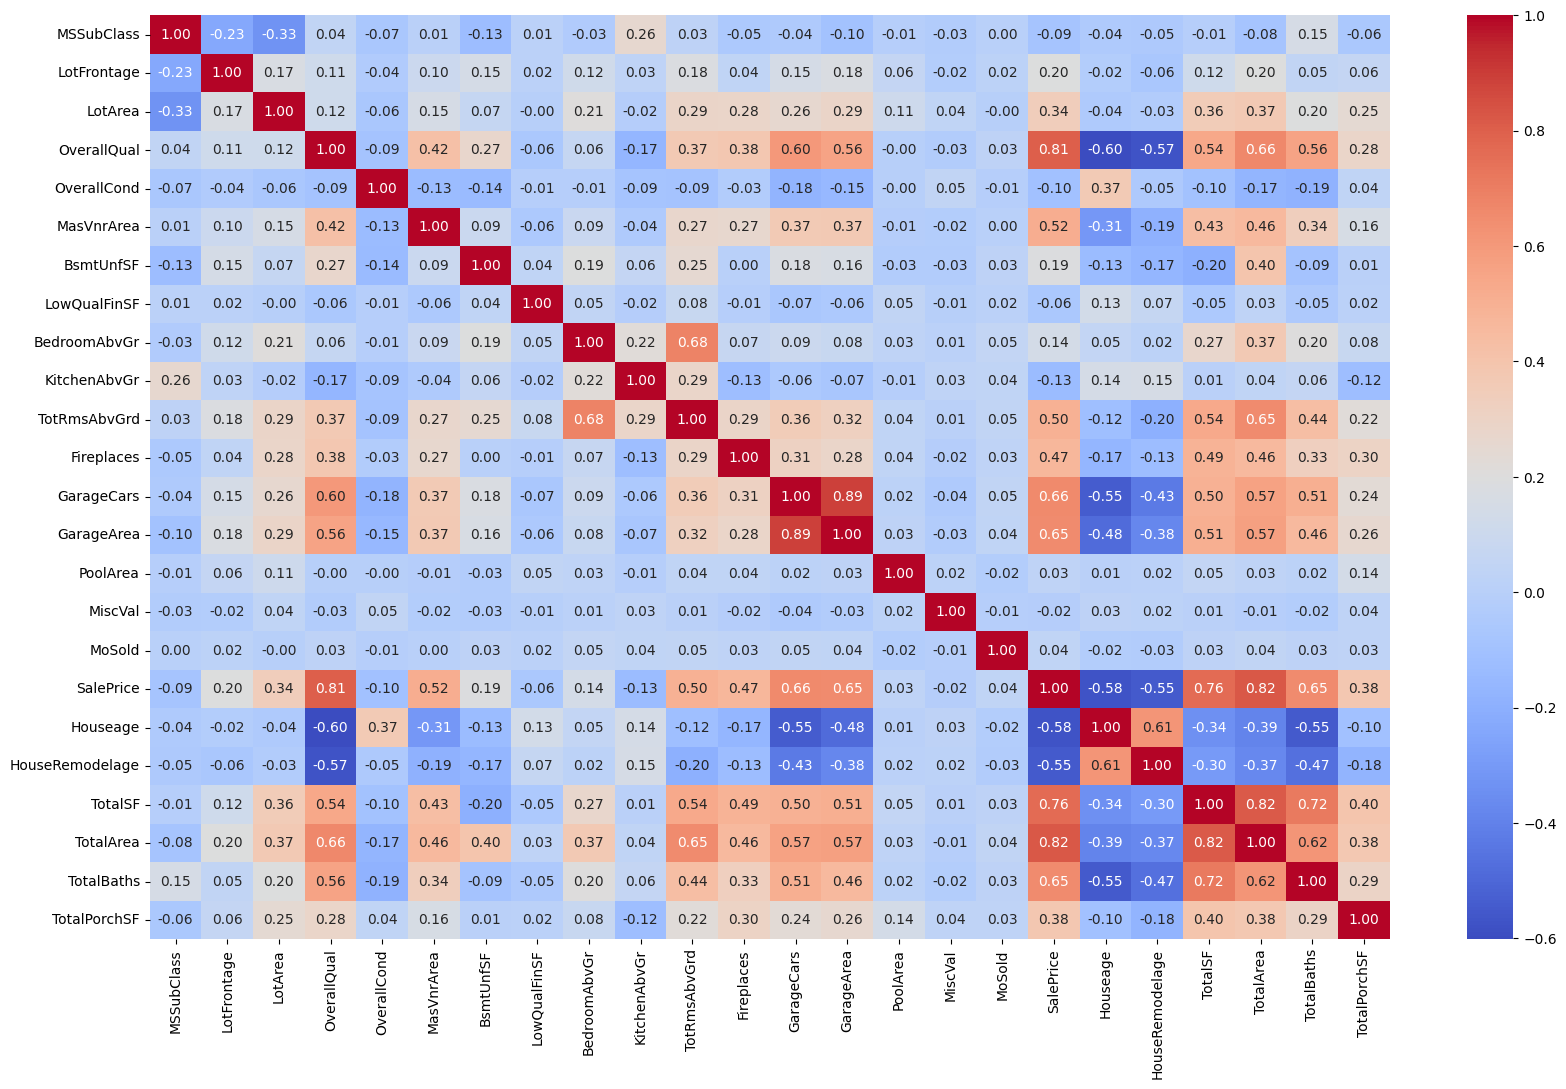

In [438]:
correlation_matrix= df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')

In [ ]:
#drop GarageArea or GarageCars

In [439]:
df.drop(columns=['GarageArea'],inplace=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

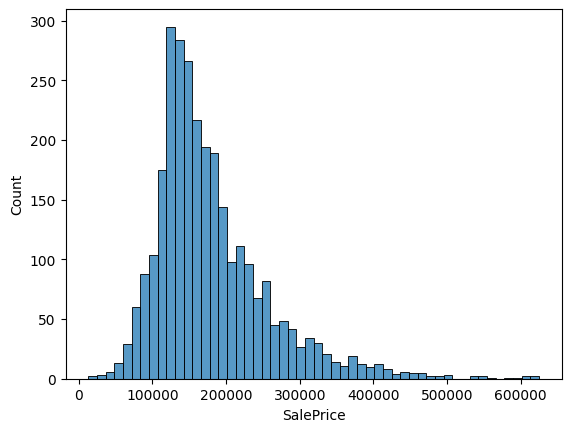

In [440]:
sns.histplot(df,x=df['SalePrice'])

In [ ]:
# df['SalePrice']=np.log1p(df['SalePrice'])

In [ ]:
# sns.histplot(df,x=df['SalePrice'])

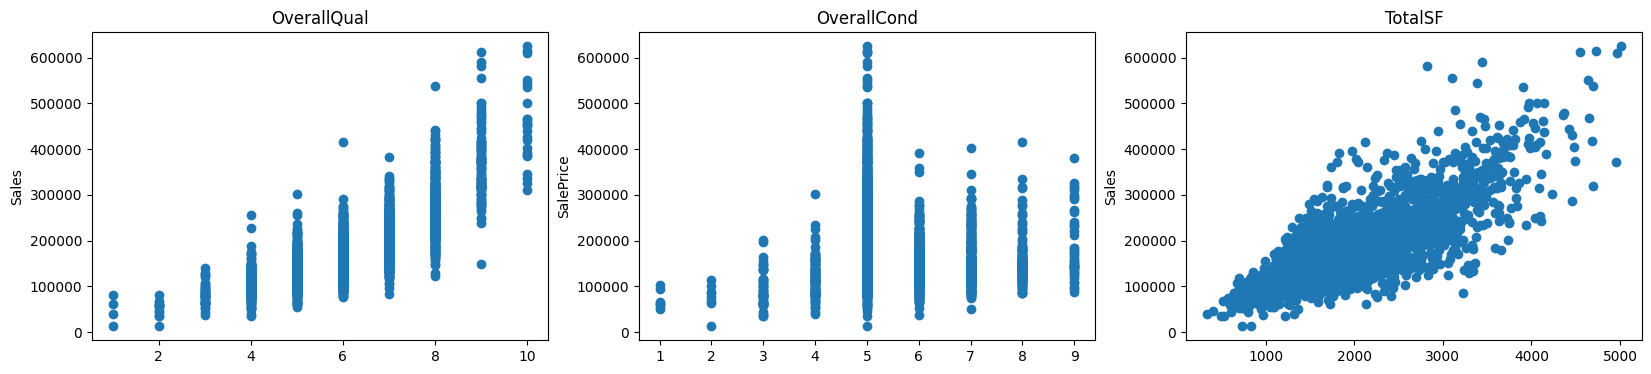

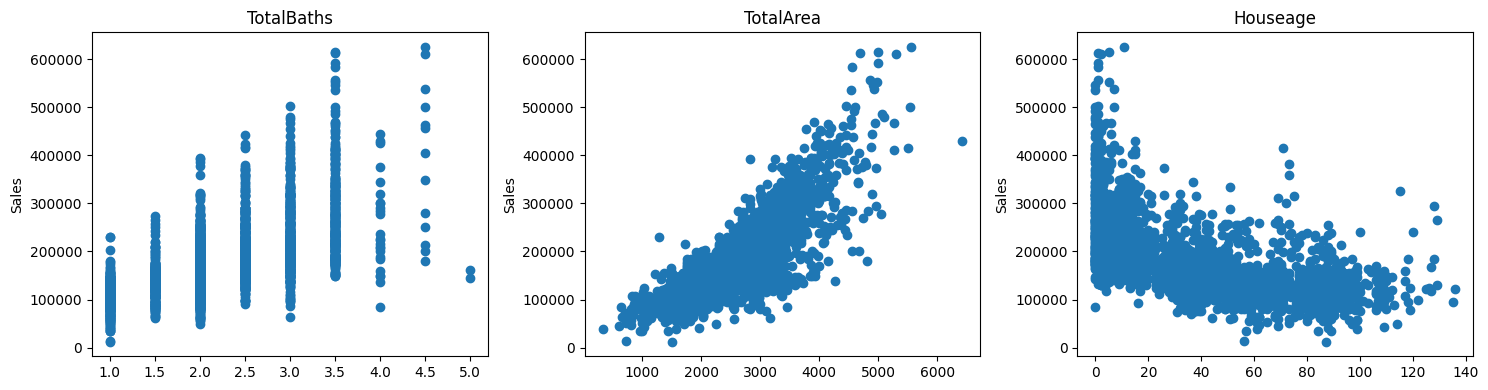

In [441]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,4))

axes[0].plot(df['OverallQual'],df['SalePrice'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("OverallQual")

axes[1].plot(df['OverallCond'],df['SalePrice'],'o')
axes[1].set_title("OverallCond")
axes[1].set_ylabel("SalePrice")

axes[2].plot(df['TotalSF'],df['SalePrice'],'o')
axes[2].set_title("TotalSF")
axes[2].set_ylabel("Sales")



fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,4))

axes[0].plot(df['TotalBaths'],df['SalePrice'],'o')
axes[0].set_title("TotalBaths")
axes[0].set_ylabel("Sales")

axes[1].plot(df['TotalArea'],df['SalePrice'],'o')
axes[1].set_title("TotalArea")
axes[1].set_ylabel("Sales")

axes[2].plot(df['Houseage'],df['SalePrice'],'o')
axes[2].set_title("Houseage")
axes[2].set_ylabel("Sales")



plt.tight_layout()


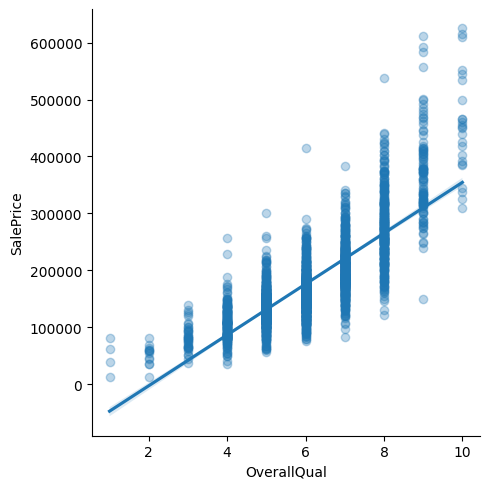

In [442]:
sns.lmplot(x='OverallQual',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

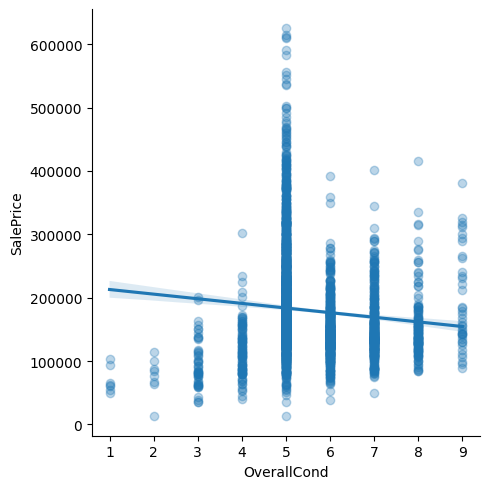

In [443]:
sns.lmplot(x='OverallCond',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

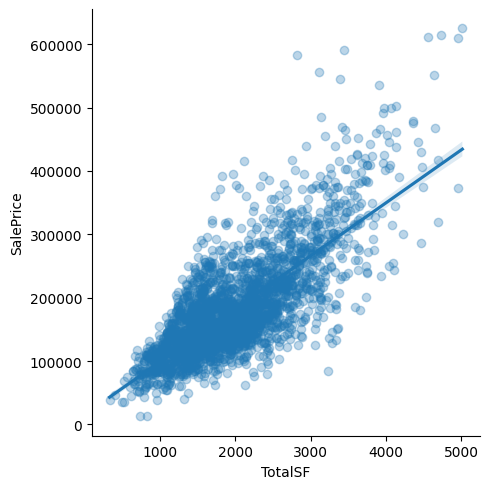

In [ ]:
sns.lmplot(x='TotalSF',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

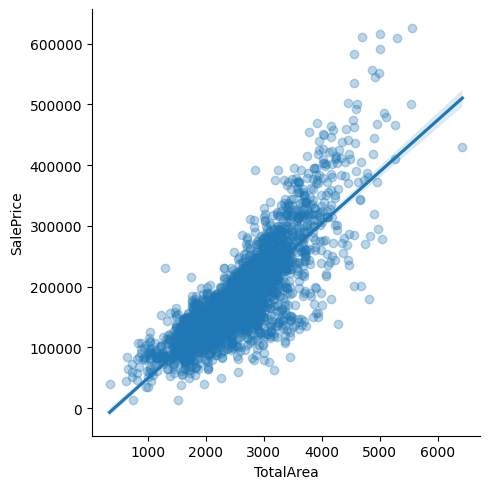

In [ ]:
sns.lmplot(x='TotalArea',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

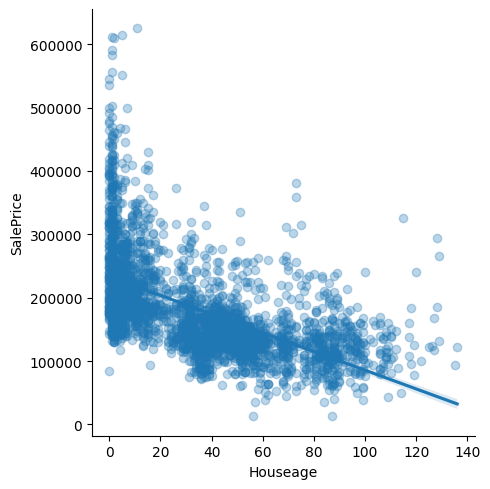

In [ ]:
sns.lmplot(x='Houseage',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

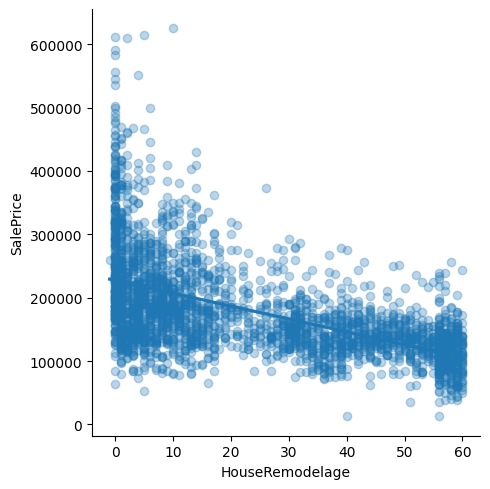

In [ ]:
sns.lmplot(x='HouseRemodelage',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

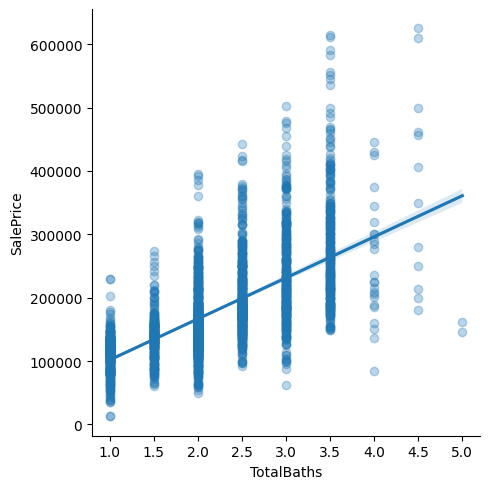

In [ ]:
sns.lmplot(x='TotalBaths',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

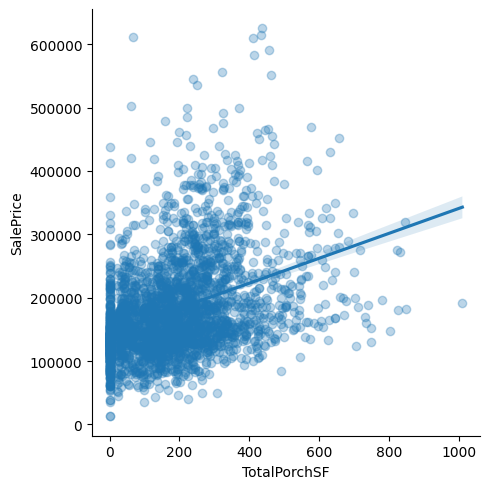

In [ ]:
sns.lmplot(x='TotalPorchSF',
           y='SalePrice',
           data=df,
           scatter_kws={'alpha':0.3}
           )

In [ ]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL        141.0    31770   Pave      IR1         Lvl   
1          20       RH         80.0    11622   Pave      Reg         Lvl   
2          20       RL         81.0    14267   Pave      IR1         Lvl   
3          20       RL         93.0    11160   Pave      Reg         Lvl   
4          60       RL         74.0    13830   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... MoSold SaleType SaleCondition SalePrice  \
0    AllPub    Corner       Gtl  ...      5      WD         Normal    215000   
1    AllPub    Inside       Gtl  ...      6      WD         Normal    105000   
2    AllPub    Corner       Gtl  ...      6      WD         Normal    172000   
3    AllPub    Corner       Gtl  ...      4      WD         Normal    244000   
4    AllPub    Inside       Gtl  ...      3      WD         Normal    189900   

  Houseage  HouseRemodelage  TotalSF TotalArea TotalBaths TotalPorchSF  
0       50               50   2295.0    2736.0        2.0          272  
1       49               49   1508.0    1778.0        1.0          260  
2       52               52   2252.0    2658.0        1.5          429  
3       42               42   3175.0    4220.0        3.5            0  
4       13               12   2420.0    2557.0        2.5          246  

[5 rows x 60 columns]

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'ConditionOne', 'ConditionTwo', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'ExteriorFrist', 'ExteriorSecond', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinTypeOne', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Houseage', 'HouseRemodelage', 'TotalSF',
       'TotalArea', 'TotalBaths', 'TotalPorchSF'],
      dtype='object')

In [ ]:
df['MSZoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [ ]:
ohe.fit_transform(df[['MSZoning']])

MSZoning_A (agr)  MSZoning_C (all)  MSZoning_FV  MSZoning_I (all)  \
0                  0.0               0.0          0.0               0.0   
1                  0.0               0.0          0.0               0.0   
2                  0.0               0.0          0.0               0.0   
3                  0.0               0.0          0.0               0.0   
4                  0.0               0.0          0.0               0.0   
...                ...               ...          ...               ...   
2925               0.0               0.0          0.0               0.0   
2926               0.0               0.0          0.0               0.0   
2927               0.0               0.0          0.0               0.0   
2928               0.0               0.0          0.0               0.0   
2929               0.0               0.0          0.0               0.0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  
0             0.0          1.0          0.0  
1             1.0          0.0          0.0  
2             0.0          1.0          0.0  
3             0.0          1.0          0.0  
4             0.0          1.0          0.0  
...           ...          ...          ...  
2925          0.0          1.0          0.0  
2926          0.0          1.0          0.0  
2927          0.0          1.0          0.0  
2928          0.0          1.0          0.0  
2929          0.0          1.0          0.0  

[2888 rows x 7 columns]

In [ ]:
oheTransform= ohe.fit_transform(df[['MSZoning']]).rename(columns={'MSZoning_A (agr)':'MSZoningAAgr','MSZoning_C (all)':'MSZoningCAll','MSZoning_I (all)':'MSZoningIAll'})
# pd.set_option('display.max_columns', None)
df.drop(columns=['MSZoning'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0          20        141.0    31770   Pave      IR1         Lvl    AllPub   
1          20         80.0    11622   Pave      Reg         Lvl    AllPub   
2          20         81.0    14267   Pave      IR1         Lvl    AllPub   
3          20         93.0    11160   Pave      Reg         Lvl    AllPub   
4          60         74.0    13830   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... TotalArea TotalBaths TotalPorchSF  \
0    Corner       Gtl        NAmes  ...    2736.0        2.0          272   
1    Inside       Gtl        NAmes  ...    1778.0        1.0          260   
2    Corner       Gtl        NAmes  ...    2658.0        1.5          429   
3    Corner       Gtl        NAmes  ...    4220.0        3.5            0   
4    Inside       Gtl      Gilbert  ...    2557.0        2.5          246   

  MSZoningAAgr  MSZoningCAll  MSZoning_FV MSZoningIAll MSZoning_RH  \
0          0.0           0.0          0.0          0.0         0.0   
1          0.0           0.0          0.0          0.0         1.0   
2          0.0           0.0          0.0          0.0         0.0   
3          0.0           0.0          0.0          0.0         0.0   
4          0.0           0.0          0.0          0.0         0.0   

  MSZoning_RL MSZoning_RM  
0         1.0         0.0  
1         0.0         0.0  
2         1.0         0.0  
3         1.0         0.0  
4         1.0         0.0  

[5 rows x 66 columns]

In [ ]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Street']])
df.drop(columns=['Street'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea LotShape LandContour Utilities LotConfig  \
0          20        141.0    31770      IR1         Lvl    AllPub    Corner   
1          20         80.0    11622      Reg         Lvl    AllPub    Inside   
2          20         81.0    14267      IR1         Lvl    AllPub    Corner   
3          20         93.0    11160      Reg         Lvl    AllPub    Corner   
4          60         74.0    13830      IR1         Lvl    AllPub    Inside   

  LandSlope Neighborhood ConditionOne  ... TotalPorchSF MSZoningAAgr  \
0       Gtl        NAmes         Norm  ...          272          0.0   
1       Gtl        NAmes        Feedr  ...          260          0.0   
2       Gtl        NAmes         Norm  ...          429          0.0   
3       Gtl        NAmes         Norm  ...            0          0.0   
4       Gtl      Gilbert         Norm  ...          246          0.0   

  MSZoningCAll  MSZoning_FV  MSZoningIAll MSZoning_RH MSZoning_RL MSZoning_RM  \
0          0.0          0.0           0.0         0.0         1.0         0.0   
1          0.0          0.0           0.0         1.0         0.0         0.0   
2          0.0          0.0           0.0         0.0         1.0         0.0   
3          0.0          0.0           0.0         0.0         1.0         0.0   
4          0.0          0.0           0.0         0.0         1.0         0.0   

  Street_Grvl Street_Pave  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  

[5 rows x 67 columns]

In [ ]:
df.LotShape.unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['LotShape']])
df.drop(columns=['LotShape'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea LandContour Utilities LotConfig LandSlope  \
0          20        141.0    31770         Lvl    AllPub    Corner       Gtl   
1          20         80.0    11622         Lvl    AllPub    Inside       Gtl   
2          20         81.0    14267         Lvl    AllPub    Corner       Gtl   
3          20         93.0    11160         Lvl    AllPub    Corner       Gtl   
4          60         74.0    13830         Lvl    AllPub    Inside       Gtl   

  Neighborhood ConditionOne ConditionTwo  ... MSZoningIAll MSZoning_RH  \
0        NAmes         Norm         Norm  ...          0.0         0.0   
1        NAmes        Feedr         Norm  ...          0.0         1.0   
2        NAmes         Norm         Norm  ...          0.0         0.0   
3        NAmes         Norm         Norm  ...          0.0         0.0   
4      Gilbert         Norm         Norm  ...          0.0         0.0   

   MSZoning_RL  MSZoning_RM Street_Grvl Street_Pave LotShape_IR1 LotShape_IR2  \
0          1.0          0.0         0.0         1.0          1.0          0.0   
1          0.0          0.0         0.0         1.0          0.0          0.0   
2          1.0          0.0         0.0         1.0          1.0          0.0   
3          1.0          0.0         0.0         1.0          0.0          0.0   
4          1.0          0.0         0.0         1.0          1.0          0.0   

  LotShape_IR3  LotShape_Reg  
0          0.0           0.0  
1          0.0           1.0  
2          0.0           0.0  
3          0.0           1.0  
4          0.0           0.0  

[5 rows x 70 columns]

In [ ]:
df.LandContour.unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['LandContour']])
df.drop(columns=['LandContour'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea Utilities LotConfig LandSlope  \
0          20        141.0    31770    AllPub    Corner       Gtl   
1          20         80.0    11622    AllPub    Inside       Gtl   
2          20         81.0    14267    AllPub    Corner       Gtl   
3          20         93.0    11160    AllPub    Corner       Gtl   
4          60         74.0    13830    AllPub    Inside       Gtl   

  Neighborhood ConditionOne ConditionTwo BldgType  ... Street_Grvl  \
0        NAmes         Norm         Norm     1Fam  ...         0.0   
1        NAmes        Feedr         Norm     1Fam  ...         0.0   
2        NAmes         Norm         Norm     1Fam  ...         0.0   
3        NAmes         Norm         Norm     1Fam  ...         0.0   
4      Gilbert         Norm         Norm     1Fam  ...         0.0   

   Street_Pave  LotShape_IR1 LotShape_IR2 LotShape_IR3 LotShape_Reg  \
0          1.0           1.0          0.0          0.0          0.0   
1          1.0           0.0          0.0          0.0          1.0   
2          1.0           1.0          0.0          0.0          0.0   
3          1.0           0.0          0.0          0.0          1.0   
4          1.0           1.0          0.0          0.0          0.0   

  LandContour_Bnk LandContour_HLS  LandContour_Low LandContour_Lvl  
0             0.0             0.0              0.0             1.0  
1             0.0             0.0              0.0             1.0  
2             0.0             0.0              0.0             1.0  
3             0.0             0.0              0.0             1.0  
4             0.0             0.0              0.0             1.0  

[5 rows x 73 columns]

In [ ]:
df.Utilities.unique()

array(['AllPub', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Utilities']])
df.drop(columns=['Utilities'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea LotConfig LandSlope Neighborhood  \
0          20        141.0    31770    Corner       Gtl        NAmes   
1          20         80.0    11622    Inside       Gtl        NAmes   
2          20         81.0    14267    Corner       Gtl        NAmes   
3          20         93.0    11160    Corner       Gtl        NAmes   
4          60         74.0    13830    Inside       Gtl      Gilbert   

  ConditionOne ConditionTwo BldgType HouseStyle  ...  LotShape_IR2  \
0         Norm         Norm     1Fam     1Story  ...           0.0   
1        Feedr         Norm     1Fam     1Story  ...           0.0   
2         Norm         Norm     1Fam     1Story  ...           0.0   
3         Norm         Norm     1Fam     1Story  ...           0.0   
4         Norm         Norm     1Fam     2Story  ...           0.0   

   LotShape_IR3 LotShape_Reg LandContour_Bnk LandContour_HLS LandContour_Low  \
0           0.0          0.0             0.0             0.0             0.0   
1           0.0          1.0             0.0             0.0             0.0   
2           0.0          0.0             0.0             0.0             0.0   
3           0.0          1.0             0.0             0.0             0.0   
4           0.0          0.0             0.0             0.0             0.0   

  LandContour_Lvl  Utilities_AllPub Utilities_NoSeWa Utilities_NoSewr  
0             1.0               1.0              0.0              0.0  
1             1.0               1.0              0.0              0.0  
2             1.0               1.0              0.0              0.0  
3             1.0               1.0              0.0              0.0  
4             1.0               1.0              0.0              0.0  

[5 rows x 75 columns]

In [ ]:
df.LotConfig.unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['LotConfig']])
df.drop(columns=['LotConfig'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea LandSlope Neighborhood ConditionOne  \
0          20        141.0    31770       Gtl        NAmes         Norm   
1          20         80.0    11622       Gtl        NAmes        Feedr   
2          20         81.0    14267       Gtl        NAmes         Norm   
3          20         93.0    11160       Gtl        NAmes         Norm   
4          60         74.0    13830       Gtl      Gilbert         Norm   

  ConditionTwo BldgType HouseStyle  OverallQual  ...  LandContour_Low  \
0         Norm     1Fam     1Story            6  ...              0.0   
1         Norm     1Fam     1Story            5  ...              0.0   
2         Norm     1Fam     1Story            6  ...              0.0   
3         Norm     1Fam     1Story            7  ...              0.0   
4         Norm     1Fam     2Story            5  ...              0.0   

  LandContour_Lvl Utilities_AllPub Utilities_NoSeWa Utilities_NoSewr  \
0             1.0              1.0              0.0              0.0   
1             1.0              1.0              0.0              0.0   
2             1.0              1.0              0.0              0.0   
3             1.0              1.0              0.0              0.0   
4             1.0              1.0              0.0              0.0   

  LotConfig_Corner  LotConfig_CulDSac LotConfig_FR2 LotConfig_FR3  \
0              1.0                0.0           0.0           0.0   
1              0.0                0.0           0.0           0.0   
2              1.0                0.0           0.0           0.0   
3              1.0                0.0           0.0           0.0   
4              0.0                0.0           0.0           0.0   

  LotConfig_Inside  
0              0.0  
1              1.0  
2              0.0  
3              0.0  
4              1.0  

[5 rows x 79 columns]

In [ ]:
df.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['LandSlope']])
df.drop(columns=['LandSlope'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea Neighborhood ConditionOne ConditionTwo  \
0          20        141.0    31770        NAmes         Norm         Norm   
1          20         80.0    11622        NAmes        Feedr         Norm   
2          20         81.0    14267        NAmes         Norm         Norm   
3          20         93.0    11160        NAmes         Norm         Norm   
4          60         74.0    13830      Gilbert         Norm         Norm   

  BldgType HouseStyle  OverallQual  OverallCond  ... Utilities_NoSeWa  \
0     1Fam     1Story            6            5  ...              0.0   
1     1Fam     1Story            5            6  ...              0.0   
2     1Fam     1Story            6            6  ...              0.0   
3     1Fam     1Story            7            5  ...              0.0   
4     1Fam     2Story            5            5  ...              0.0   

  Utilities_NoSewr LotConfig_Corner LotConfig_CulDSac LotConfig_FR2  \
0              0.0              1.0               0.0           0.0   
1              0.0              0.0               0.0           0.0   
2              0.0              1.0               0.0           0.0   
3              0.0              1.0               0.0           0.0   
4              0.0              0.0               0.0           0.0   

   LotConfig_FR3 LotConfig_Inside LandSlope_Gtl LandSlope_Mod LandSlope_Sev  
0            0.0              0.0           1.0           0.0           0.0  
1            0.0              1.0           1.0           0.0           0.0  
2            0.0              0.0           1.0           0.0           0.0  
3            0.0              0.0           1.0           0.0           0.0  
4            0.0              1.0           1.0           0.0           0.0  

[5 rows x 81 columns]

In [ ]:
df.Neighborhood.unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Neighborhood']])
df.drop(columns=['Neighborhood'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea ConditionOne ConditionTwo BldgType  \
0          20        141.0    31770         Norm         Norm     1Fam   
1          20         80.0    11622        Feedr         Norm     1Fam   
2          20         81.0    14267         Norm         Norm     1Fam   
3          20         93.0    11160         Norm         Norm     1Fam   
4          60         74.0    13830         Norm         Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle  ... Neighborhood_NoRidge  \
0     1Story            6            5       Hip  ...                  0.0   
1     1Story            5            6     Gable  ...                  0.0   
2     1Story            6            6       Hip  ...                  0.0   
3     1Story            7            5       Hip  ...                  0.0   
4     2Story            5            5     Gable  ...                  0.0   

  Neighborhood_NridgHt Neighborhood_OldTown Neighborhood_SWISU  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   Neighborhood_Sawyer Neighborhood_SawyerW Neighborhood_Somerst  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

  Neighborhood_StoneBr Neighborhood_Timber Neighborhood_Veenker  
0                  0.0                 0.0                  0.0  
1                  0.0                 0.0                  0.0  
2                  0.0                 0.0                  0.0  
3                  0.0                 0.0                  0.0  
4                  0.0                 0.0                  0.0  

[5 rows x 108 columns]

In [ ]:
df.ConditionOne.unique()

array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
       'RRNn'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ConditionOne']])
df.drop(columns=['ConditionOne'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea ConditionTwo BldgType HouseStyle  \
0          20        141.0    31770         Norm     1Fam     1Story   
1          20         80.0    11622         Norm     1Fam     1Story   
2          20         81.0    14267         Norm     1Fam     1Story   
3          20         93.0    11160         Norm     1Fam     1Story   
4          60         74.0    13830         Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl  ... Neighborhood_Veenker  \
0            6            5       Hip  CompShg  ...                  0.0   
1            5            6     Gable  CompShg  ...                  0.0   
2            6            6       Hip  CompShg  ...                  0.0   
3            7            5       Hip  CompShg  ...                  0.0   
4            5            5     Gable  CompShg  ...                  0.0   

  ConditionOne_Artery ConditionOne_Feedr  ConditionOne_Norm ConditionOne_PosA  \
0                 0.0                0.0                1.0               0.0   
1                 0.0                1.0                0.0               0.0   
2                 0.0                0.0                1.0               0.0   
3                 0.0                0.0                1.0               0.0   
4                 0.0                0.0                1.0               0.0   

  ConditionOne_PosN ConditionOne_RRAe ConditionOne_RRAn ConditionOne_RRNe  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  ConditionOne_RRNn  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 116 columns]

In [ ]:
df.ConditionTwo.unique()

array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAe', 'RRAn'],
      dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ConditionTwo']])
df.drop(columns=['ConditionTwo'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea BldgType HouseStyle  OverallQual  \
0          20        141.0    31770     1Fam     1Story            6   
1          20         80.0    11622     1Fam     1Story            5   
2          20         81.0    14267     1Fam     1Story            6   
3          20         93.0    11160     1Fam     1Story            7   
4          60         74.0    13830     1Fam     2Story            5   

   OverallCond RoofStyle RoofMatl ExteriorFrist  ... ConditionOne_RRNe  \
0            5       Hip  CompShg       BrkFace  ...               0.0   
1            6     Gable  CompShg       VinylSd  ...               0.0   
2            6       Hip  CompShg       Wd Sdng  ...               0.0   
3            5       Hip  CompShg       BrkFace  ...               0.0   
4            5     Gable  CompShg       VinylSd  ...               0.0   

  ConditionOne_RRNn  ConditionTwo_Artery ConditionTwo_Feedr ConditionTwo_Norm  \
0               0.0                  0.0                0.0               1.0   
1               0.0                  0.0                0.0               1.0   
2               0.0                  0.0                0.0               1.0   
3               0.0                  0.0                0.0               1.0   
4               0.0                  0.0                0.0               1.0   

  ConditionTwo_PosA ConditionTwo_PosN ConditionTwo_RRAe ConditionTwo_RRAn  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  ConditionTwo_RRNn  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 123 columns]

In [ ]:
df.BldgType.unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['BldgType']])
df.drop(columns=['BldgType'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  \
0          20        141.0    31770     1Story            6            5   
1          20         80.0    11622     1Story            5            6   
2          20         81.0    14267     1Story            6            6   
3          20         93.0    11160     1Story            7            5   
4          60         74.0    13830     2Story            5            5   

  RoofStyle RoofMatl ExteriorFrist ExteriorSecond  ... ConditionTwo_PosA  \
0       Hip  CompShg       BrkFace        Plywood  ...               0.0   
1     Gable  CompShg       VinylSd        VinylSd  ...               0.0   
2       Hip  CompShg       Wd Sdng        Wd Sdng  ...               0.0   
3       Hip  CompShg       BrkFace        BrkFace  ...               0.0   
4     Gable  CompShg       VinylSd        VinylSd  ...               0.0   

   ConditionTwo_PosN ConditionTwo_RRAe ConditionTwo_RRAn ConditionTwo_RRNn  \
0                0.0               0.0               0.0               0.0   
1                0.0               0.0               0.0               0.0   
2                0.0               0.0               0.0               0.0   
3                0.0               0.0               0.0               0.0   
4                0.0               0.0               0.0               0.0   

  BldgType_1Fam BldgType_2fmCon BldgType_Duplex BldgType_Twnhs  \
0           1.0             0.0             0.0            0.0   
1           1.0             0.0             0.0            0.0   
2           1.0             0.0             0.0            0.0   
3           1.0             0.0             0.0            0.0   
4           1.0             0.0             0.0            0.0   

   BldgType_TwnhsE  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 127 columns]

In [ ]:
df.HouseStyle.unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['HouseStyle']])
df.drop(columns=['HouseStyle'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond RoofStyle  \
0          20        141.0    31770            6            5       Hip   
1          20         80.0    11622            5            6     Gable   
2          20         81.0    14267            6            6       Hip   
3          20         93.0    11160            7            5       Hip   
4          60         74.0    13830            5            5     Gable   

  RoofMatl ExteriorFrist ExteriorSecond MasVnrType  ...  BldgType_Twnhs  \
0  CompShg       BrkFace        Plywood      Stone  ...             0.0   
1  CompShg       VinylSd        VinylSd         No  ...             0.0   
2  CompShg       Wd Sdng        Wd Sdng    BrkFace  ...             0.0   
3  CompShg       BrkFace        BrkFace         No  ...             0.0   
4  CompShg       VinylSd        VinylSd         No  ...             0.0   

  BldgType_TwnhsE HouseStyle_1.5Fin HouseStyle_1.5Unf HouseStyle_1Story  \
0             0.0               0.0               0.0               1.0   
1             0.0               0.0               0.0               1.0   
2             0.0               0.0               0.0               1.0   
3             0.0               0.0               0.0               1.0   
4             0.0               0.0               0.0               0.0   

  HouseStyle_2.5Fin HouseStyle_2.5Unf HouseStyle_2Story  HouseStyle_SFoyer  \
0               0.0               0.0               0.0                0.0   
1               0.0               0.0               0.0                0.0   
2               0.0               0.0               0.0                0.0   
3               0.0               0.0               0.0                0.0   
4               0.0               0.0               1.0                0.0   

  HouseStyle_SLvl  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 134 columns]

In [ ]:
df.OverallQual.unique()

array([ 6,  5,  7,  8,  4,  9,  3,  2, 10,  1])

In [ ]:
oheTransform= ohe.fit_transform(df[['OverallQual']])
df.drop(columns=['OverallQual'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  OverallCond RoofStyle RoofMatl  \
0          20        141.0    31770            5       Hip  CompShg   
1          20         80.0    11622            6     Gable  CompShg   
2          20         81.0    14267            6       Hip  CompShg   
3          20         93.0    11160            5       Hip  CompShg   
4          60         74.0    13830            5     Gable  CompShg   

  ExteriorFrist ExteriorSecond MasVnrType  MasVnrArea  ... OverallQual_1  \
0       BrkFace        Plywood      Stone       112.0  ...           0.0   
1       VinylSd        VinylSd         No         0.0  ...           0.0   
2       Wd Sdng        Wd Sdng    BrkFace       108.0  ...           0.0   
3       BrkFace        BrkFace         No         0.0  ...           0.0   
4       VinylSd        VinylSd         No         0.0  ...           0.0   

  OverallQual_2 OverallQual_3 OverallQual_4 OverallQual_5 OverallQual_6  \
0           0.0           0.0           0.0           0.0           1.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           0.0           1.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           1.0           0.0   

  OverallQual_7  OverallQual_8 OverallQual_9 OverallQual_10  
0           0.0            0.0           0.0            0.0  
1           0.0            0.0           0.0            0.0  
2           0.0            0.0           0.0            0.0  
3           1.0            0.0           0.0            0.0  
4           0.0            0.0           0.0            0.0  

[5 rows x 143 columns]

In [ ]:
df.OverallCond.unique()

array([5, 6, 7, 8, 2, 4, 9, 3, 1])

In [ ]:
oheTransform= ohe.fit_transform(df[['OverallCond']])
df.drop(columns=['OverallCond'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea RoofStyle RoofMatl ExteriorFrist  \
0          20        141.0    31770       Hip  CompShg       BrkFace   
1          20         80.0    11622     Gable  CompShg       VinylSd   
2          20         81.0    14267       Hip  CompShg       Wd Sdng   
3          20         93.0    11160       Hip  CompShg       BrkFace   
4          60         74.0    13830     Gable  CompShg       VinylSd   

  ExteriorSecond MasVnrType  MasVnrArea ExterQual  ... OverallQual_10  \
0        Plywood      Stone       112.0        TA  ...            0.0   
1        VinylSd         No         0.0        TA  ...            0.0   
2        Wd Sdng    BrkFace       108.0        TA  ...            0.0   
3        BrkFace         No         0.0        Gd  ...            0.0   
4        VinylSd         No         0.0        TA  ...            0.0   

  OverallCond_1 OverallCond_2 OverallCond_3 OverallCond_4 OverallCond_5  \
0           0.0           0.0           0.0           0.0           1.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           1.0   
4           0.0           0.0           0.0           0.0           1.0   

   OverallCond_6 OverallCond_7 OverallCond_8 OverallCond_9  
0            0.0           0.0           0.0           0.0  
1            1.0           0.0           0.0           0.0  
2            1.0           0.0           0.0           0.0  
3            0.0           0.0           0.0           0.0  
4            0.0           0.0           0.0           0.0  

[5 rows x 151 columns]

In [ ]:
df.RoofStyle.unique()

array(['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['RoofStyle']])
df.drop(columns=['RoofStyle'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea RoofMatl ExteriorFrist ExteriorSecond  \
0          20        141.0    31770  CompShg       BrkFace        Plywood   
1          20         80.0    11622  CompShg       VinylSd        VinylSd   
2          20         81.0    14267  CompShg       Wd Sdng        Wd Sdng   
3          20         93.0    11160  CompShg       BrkFace        BrkFace   
4          60         74.0    13830  CompShg       VinylSd        VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond  ... OverallCond_6 OverallCond_7  \
0      Stone       112.0        TA        TA  ...           0.0           0.0   
1         No         0.0        TA        TA  ...           1.0           0.0   
2    BrkFace       108.0        TA        TA  ...           1.0           0.0   
3         No         0.0        Gd        TA  ...           0.0           0.0   
4         No         0.0        TA        TA  ...           0.0           0.0   

  OverallCond_8 OverallCond_9 RoofStyle_Flat  RoofStyle_Gable  \
0           0.0           0.0            0.0              0.0   
1           0.0           0.0            0.0              1.0   
2           0.0           0.0            0.0              0.0   
3           0.0           0.0            0.0              0.0   
4           0.0           0.0            0.0              1.0   

  RoofStyle_Gambrel RoofStyle_Hip RoofStyle_Mansard RoofStyle_Shed  
0               0.0           1.0               0.0            0.0  
1               0.0           0.0               0.0            0.0  
2               0.0           1.0               0.0            0.0  
3               0.0           1.0               0.0            0.0  
4               0.0           0.0               0.0            0.0  

[5 rows x 156 columns]

In [ ]:
df.RoofMatl.unique()

array(['CompShg', 'WdShake', 'Tar&Grv', 'WdShngl', 'Membran', 'Roll',
       'Metal'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['RoofMatl']])
df.drop(columns=['RoofMatl'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea ExteriorFrist ExteriorSecond MasVnrType  \
0          20        141.0    31770       BrkFace        Plywood      Stone   
1          20         80.0    11622       VinylSd        VinylSd         No   
2          20         81.0    14267       Wd Sdng        Wd Sdng    BrkFace   
3          20         93.0    11160       BrkFace        BrkFace         No   
4          60         74.0    13830       VinylSd        VinylSd         No   

   MasVnrArea ExterQual ExterCond Foundation  ... RoofStyle_Hip  \
0       112.0        TA        TA     CBlock  ...           1.0   
1         0.0        TA        TA     CBlock  ...           0.0   
2       108.0        TA        TA     CBlock  ...           1.0   
3         0.0        Gd        TA     CBlock  ...           1.0   
4         0.0        TA        TA      PConc  ...           0.0   

  RoofStyle_Mansard RoofStyle_Shed RoofMatl_CompShg  RoofMatl_Membran  \
0               0.0            0.0              1.0               0.0   
1               0.0            0.0              1.0               0.0   
2               0.0            0.0              1.0               0.0   
3               0.0            0.0              1.0               0.0   
4               0.0            0.0              1.0               0.0   

  RoofMatl_Metal RoofMatl_Roll RoofMatl_Tar&Grv RoofMatl_WdShake  \
0            0.0           0.0              0.0              0.0   
1            0.0           0.0              0.0              0.0   
2            0.0           0.0              0.0              0.0   
3            0.0           0.0              0.0              0.0   
4            0.0           0.0              0.0              0.0   

   RoofMatl_WdShngl  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 162 columns]

In [ ]:
df.ExteriorFrist.unique()

array(['BrkFace', 'VinylSd', 'Wd Sdng', 'CemntBd', 'HdBoard', 'Plywood',
       'MetalSd', 'AsbShng', 'WdShing', 'Stucco', 'AsphShn', 'BrkComm',
       'CBlock', 'PreCast', 'Stone', 'ImStucc'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ExteriorFrist']]).rename(columns={'ExteriorFrist_Wd Sdng':'ExteriorFrist_Wd_Sdng'})
df.drop(columns=['ExteriorFrist'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea ExteriorSecond MasVnrType  MasVnrArea  \
0          20        141.0    31770        Plywood      Stone       112.0   
1          20         80.0    11622        VinylSd         No         0.0   
2          20         81.0    14267        Wd Sdng    BrkFace       108.0   
3          20         93.0    11160        BrkFace         No         0.0   
4          60         74.0    13830        VinylSd         No         0.0   

  ExterQual ExterCond Foundation BsmtQual  ... ExteriorFrist_HdBoard  \
0        TA        TA     CBlock       TA  ...                   0.0   
1        TA        TA     CBlock       TA  ...                   0.0   
2        TA        TA     CBlock       TA  ...                   0.0   
3        Gd        TA     CBlock       TA  ...                   0.0   
4        TA        TA      PConc       Gd  ...                   0.0   

  ExteriorFrist_ImStucc ExteriorFrist_MetalSd  ExteriorFrist_Plywood  \
0                   0.0                   0.0                    0.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   0.0                    0.0   
3                   0.0                   0.0                    0.0   
4                   0.0                   0.0                    0.0   

  ExteriorFrist_PreCast ExteriorFrist_Stone ExteriorFrist_Stucco  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 0.0                  0.0   

  ExteriorFrist_VinylSd  ExteriorFrist_Wd_Sdng  ExteriorFrist_WdShing  
0                   0.0                    0.0                    0.0  
1                   1.0                    0.0                    0.0  
2                   0.0                    1.0                    0.0  
3                   0.0                    0.0                    0.0  
4                   1.0                    0.0                    0.0  

[5 rows x 177 columns]

In [ ]:
df.ExteriorSecond.unique()

array(['Plywood', 'VinylSd', 'Wd Sdng', 'BrkFace', 'CmentBd', 'HdBoard',
       'MetalSd', 'ImStucc', 'Brk Cmn', 'Wd Shng', 'AsbShng', 'Stucco',
       'AsphShn', 'CBlock', 'Stone', 'PreCast', 'Other'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ExteriorSecond']]).rename(columns={'ExteriorSecond_Wd Sdng':'ExteriorSecond_Wd_Sdng','ExteriorSecond_Wd Shng':'ExteriorSecond_Wd_Shng','ExteriorSecond_Brk Cmn':'ExteriorSecond_Brk_Cmn'})
df.drop(columns=['ExteriorSecond'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea MasVnrType  MasVnrArea ExterQual  \
0          20        141.0    31770      Stone       112.0        TA   
1          20         80.0    11622         No         0.0        TA   
2          20         81.0    14267    BrkFace       108.0        TA   
3          20         93.0    11160         No         0.0        Gd   
4          60         74.0    13830         No         0.0        TA   

  ExterCond Foundation BsmtQual BsmtCond  ... ExteriorSecond_ImStucc  \
0        TA     CBlock       TA       Gd  ...                    0.0   
1        TA     CBlock       TA       TA  ...                    0.0   
2        TA     CBlock       TA       TA  ...                    0.0   
3        TA     CBlock       TA       TA  ...                    0.0   
4        TA      PConc       Gd       TA  ...                    0.0   

  ExteriorSecond_MetalSd  ExteriorSecond_Other ExteriorSecond_Plywood  \
0                    0.0                   0.0                    1.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

  ExteriorSecond_PreCast ExteriorSecond_Stone ExteriorSecond_Stucco  \
0                    0.0                  0.0                   0.0   
1                    0.0                  0.0                   0.0   
2                    0.0                  0.0                   0.0   
3                    0.0                  0.0                   0.0   
4                    0.0                  0.0                   0.0   

   ExteriorSecond_VinylSd  ExteriorSecond_Wd_Sdng  ExteriorSecond_Wd_Shng  
0                     0.0                     0.0                     0.0  
1                     1.0                     0.0                     0.0  
2                     0.0                     1.0                     0.0  
3                     0.0                     0.0                     0.0  
4                     1.0                     0.0                     0.0  

[5 rows x 193 columns]

In [ ]:
df.MasVnrType.unique()

array(['Stone', 'No', 'BrkFace', 'BrkCmn', 'CBlock'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['MasVnrType']])
df.drop(columns=['MasVnrType'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea ExterQual ExterCond  \
0          20        141.0    31770       112.0        TA        TA   
1          20         80.0    11622         0.0        TA        TA   
2          20         81.0    14267       108.0        TA        TA   
3          20         93.0    11160         0.0        Gd        TA   
4          60         74.0    13830         0.0        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure  ... ExteriorSecond_Stone  \
0     CBlock       TA       Gd           Gd  ...                  0.0   
1     CBlock       TA       TA           No  ...                  0.0   
2     CBlock       TA       TA           No  ...                  0.0   
3     CBlock       TA       TA           No  ...                  0.0   
4      PConc       Gd       TA           No  ...                  0.0   

   ExteriorSecond_Stucco ExteriorSecond_VinylSd ExteriorSecond_Wd_Sdng  \
0                    0.0                    0.0                    0.0   
1                    0.0                    1.0                    0.0   
2                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    1.0                    0.0   

  ExteriorSecond_Wd_Shng MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0.0               0.0                 0.0   
1                    0.0               0.0                 0.0   
2                    0.0               0.0                 1.0   
3                    0.0               0.0                 0.0   
4                    0.0               0.0                 0.0   

   MasVnrType_CBlock  MasVnrType_No MasVnrType_Stone  
0                0.0            0.0              1.0  
1                0.0            1.0              0.0  
2                0.0            0.0              0.0  
3                0.0            1.0              0.0  
4                0.0            1.0              0.0  

[5 rows x 197 columns]

In [ ]:
df.ExterQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ExterQual']])
df.drop(columns=['ExterQual'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea ExterCond Foundation BsmtQual  \
0          20        141.0    31770       112.0        TA     CBlock       TA   
1          20         80.0    11622         0.0        TA     CBlock       TA   
2          20         81.0    14267       108.0        TA     CBlock       TA   
3          20         93.0    11160         0.0        TA     CBlock       TA   
4          60         74.0    13830         0.0        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinTypeOne  ...  ExteriorSecond_Wd_Shng  \
0       Gd           Gd            BLQ  ...                     0.0   
1       TA           No            Rec  ...                     0.0   
2       TA           No            ALQ  ...                     0.0   
3       TA           No            ALQ  ...                     0.0   
4       TA           No            GLQ  ...                     0.0   

  MasVnrType_BrkCmn MasVnrType_BrkFace MasVnrType_CBlock MasVnrType_No  \
0               0.0                0.0               0.0           0.0   
1               0.0                0.0               0.0           1.0   
2               0.0                1.0               0.0           0.0   
3               0.0                0.0               0.0           1.0   
4               0.0                0.0               0.0           1.0   

   MasVnrType_Stone  ExterQual_Ex  ExterQual_Fa ExterQual_Gd  ExterQual_TA  
0               1.0           0.0           0.0          0.0           1.0  
1               0.0           0.0           0.0          0.0           1.0  
2               0.0           0.0           0.0          0.0           1.0  
3               0.0           0.0           0.0          1.0           0.0  
4               0.0           0.0           0.0          0.0           1.0  

[5 rows x 200 columns]

In [ ]:
df.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['ExterCond']])
df.drop(columns=['ExterCond'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea Foundation BsmtQual BsmtCond  \
0          20        141.0    31770       112.0     CBlock       TA       Gd   
1          20         80.0    11622         0.0     CBlock       TA       TA   
2          20         81.0    14267       108.0     CBlock       TA       TA   
3          20         93.0    11160         0.0     CBlock       TA       TA   
4          60         74.0    13830         0.0      PConc       Gd       TA   

  BsmtExposure BsmtFinTypeOne  BsmtUnfSF  ... MasVnrType_Stone ExterQual_Ex  \
0           Gd            BLQ      441.0  ...              1.0          0.0   
1           No            Rec      270.0  ...              0.0          0.0   
2           No            ALQ      406.0  ...              0.0          0.0   
3           No            ALQ     1045.0  ...              0.0          0.0   
4           No            GLQ      137.0  ...              0.0          0.0   

  ExterQual_Fa ExterQual_Gd  ExterQual_TA  ExterCond_Ex  ExterCond_Fa  \
0          0.0          0.0           1.0           0.0           0.0   
1          0.0          0.0           1.0           0.0           0.0   
2          0.0          0.0           1.0           0.0           0.0   
3          0.0          1.0           0.0           0.0           0.0   
4          0.0          0.0           1.0           0.0           0.0   

  ExterCond_Gd  ExterCond_Po ExterCond_TA  
0          0.0           0.0          1.0  
1          0.0           0.0          1.0  
2          0.0           0.0          1.0  
3          0.0           0.0          1.0  
4          0.0           0.0          1.0  

[5 rows x 204 columns]

In [ ]:
df.Foundation.unique()

array(['CBlock', 'PConc', 'Wood', 'BrkTil', 'Slab', 'Stone'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Foundation']])
df.drop(columns=['Foundation'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea BsmtQual BsmtCond  \
0          20        141.0    31770       112.0       TA       Gd   
1          20         80.0    11622         0.0       TA       TA   
2          20         81.0    14267       108.0       TA       TA   
3          20         93.0    11160         0.0       TA       TA   
4          60         74.0    13830         0.0       Gd       TA   

  BsmtExposure BsmtFinTypeOne  BsmtUnfSF Heating  ... ExterCond_Fa  \
0           Gd            BLQ      441.0    GasA  ...          0.0   
1           No            Rec      270.0    GasA  ...          0.0   
2           No            ALQ      406.0    GasA  ...          0.0   
3           No            ALQ     1045.0    GasA  ...          0.0   
4           No            GLQ      137.0    GasA  ...          0.0   

  ExterCond_Gd ExterCond_Po  ExterCond_TA  Foundation_BrkTil  \
0          0.0          0.0           1.0                0.0   
1          0.0          0.0           1.0                0.0   
2          0.0          0.0           1.0                0.0   
3          0.0          0.0           1.0                0.0   
4          0.0          0.0           1.0                0.0   

   Foundation_CBlock Foundation_PConc  Foundation_Slab Foundation_Stone  \
0                1.0              0.0              0.0              0.0   
1                1.0              0.0              0.0              0.0   
2                1.0              0.0              0.0              0.0   
3                1.0              0.0              0.0              0.0   
4                0.0              1.0              0.0              0.0   

   Foundation_Wood  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 209 columns]

In [ ]:
df.BsmtQual.unique()

array(['TA', 'Gd', 'Ex', 'No', 'Fa', 'Po'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['BsmtQual']]).drop(columns=['BsmtQual_Po'])
df.drop(columns=['BsmtQual'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea BsmtCond BsmtExposure  \
0          20        141.0    31770       112.0       Gd           Gd   
1          20         80.0    11622         0.0       TA           No   
2          20         81.0    14267       108.0       TA           No   
3          20         93.0    11160         0.0       TA           No   
4          60         74.0    13830         0.0       TA           No   

  BsmtFinTypeOne  BsmtUnfSF Heating HeatingQC  ... Foundation_CBlock  \
0            BLQ      441.0    GasA        Fa  ...               1.0   
1            Rec      270.0    GasA        TA  ...               1.0   
2            ALQ      406.0    GasA        TA  ...               1.0   
3            ALQ     1045.0    GasA        Ex  ...               1.0   
4            GLQ      137.0    GasA        Gd  ...               0.0   

  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0              0.0              0.0               0.0              0.0   
1              0.0              0.0               0.0              0.0   
2              0.0              0.0               0.0              0.0   
3              0.0              0.0               0.0              0.0   
4              1.0              0.0               0.0              0.0   

  BsmtQual_Ex  BsmtQual_Fa BsmtQual_Gd  BsmtQual_No BsmtQual_TA  
0         0.0          0.0         0.0          0.0         1.0  
1         0.0          0.0         0.0          0.0         1.0  
2         0.0          0.0         0.0          0.0         1.0  
3         0.0          0.0         0.0          0.0         1.0  
4         0.0          0.0         1.0          0.0         0.0  

[5 rows x 213 columns]

In [ ]:
df.BsmtCond.unique()

array(['Gd', 'TA', 'No', 'Po', 'Fa', 'Ex'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['BsmtCond']])
df.drop(columns=['BsmtCond'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea BsmtExposure BsmtFinTypeOne  \
0          20        141.0    31770       112.0           Gd            BLQ   
1          20         80.0    11622         0.0           No            Rec   
2          20         81.0    14267       108.0           No            ALQ   
3          20         93.0    11160         0.0           No            ALQ   
4          60         74.0    13830         0.0           No            GLQ   

   BsmtUnfSF Heating HeatingQC CentralAir  ... BsmtQual_Fa  BsmtQual_Gd  \
0      441.0    GasA        Fa          Y  ...         0.0          0.0   
1      270.0    GasA        TA          Y  ...         0.0          0.0   
2      406.0    GasA        TA          Y  ...         0.0          0.0   
3     1045.0    GasA        Ex          Y  ...         0.0          0.0   
4      137.0    GasA        Gd          Y  ...         0.0          1.0   

   BsmtQual_No  BsmtQual_TA BsmtCond_Ex  BsmtCond_Fa BsmtCond_Gd  BsmtCond_No  \
0          0.0          1.0         0.0          0.0         1.0          0.0   
1          0.0          1.0         0.0          0.0         0.0          0.0   
2          0.0          1.0         0.0          0.0         0.0          0.0   
3          0.0          1.0         0.0          0.0         0.0          0.0   
4          0.0          0.0         0.0          0.0         0.0          0.0   

  BsmtCond_Po BsmtCond_TA  
0         0.0         0.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  

[5 rows x 218 columns]

In [ ]:
df.BsmtExposure.unique()

array(['Gd', 'No', 'Mn', 'Av', 'NoBas'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['BsmtExposure']])
df.drop(columns=['BsmtExposure'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea BsmtFinTypeOne  BsmtUnfSF  \
0          20        141.0    31770       112.0            BLQ      441.0   
1          20         80.0    11622         0.0            Rec      270.0   
2          20         81.0    14267       108.0            ALQ      406.0   
3          20         93.0    11160         0.0            ALQ     1045.0   
4          60         74.0    13830         0.0            GLQ      137.0   

  Heating HeatingQC CentralAir Electrical  ...  BsmtCond_Fa  BsmtCond_Gd  \
0    GasA        Fa          Y      SBrkr  ...          0.0          1.0   
1    GasA        TA          Y      SBrkr  ...          0.0          0.0   
2    GasA        TA          Y      SBrkr  ...          0.0          0.0   
3    GasA        Ex          Y      SBrkr  ...          0.0          0.0   
4    GasA        Gd          Y      SBrkr  ...          0.0          0.0   

   BsmtCond_No BsmtCond_Po  BsmtCond_TA BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0         0.0          0.0             0.0              1.0   
1          0.0         0.0          1.0             0.0              0.0   
2          0.0         0.0          1.0             0.0              0.0   
3          0.0         0.0          1.0             0.0              0.0   
4          0.0         0.0          1.0             0.0              0.0   

  BsmtExposure_Mn BsmtExposure_No BsmtExposure_NoBas  
0             0.0             0.0                0.0  
1             0.0             1.0                0.0  
2             0.0             1.0                0.0  
3             0.0             1.0                0.0  
4             0.0             1.0                0.0  

[5 rows x 222 columns]

In [ ]:
df.BsmtFinTypeOne.unique()

array(['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ', 'No'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['BsmtFinTypeOne']])
df.drop(columns=['BsmtFinTypeOne'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF Heating HeatingQC  \
0          20        141.0    31770       112.0      441.0    GasA        Fa   
1          20         80.0    11622         0.0      270.0    GasA        TA   
2          20         81.0    14267       108.0      406.0    GasA        TA   
3          20         93.0    11160         0.0     1045.0    GasA        Ex   
4          60         74.0    13830         0.0      137.0    GasA        Gd   

  CentralAir Electrical  LowQualFinSF  ...  BsmtExposure_Mn  BsmtExposure_No  \
0          Y      SBrkr             0  ...              0.0              0.0   
1          Y      SBrkr             0  ...              0.0              1.0   
2          Y      SBrkr             0  ...              0.0              1.0   
3          Y      SBrkr             0  ...              0.0              1.0   
4          Y      SBrkr             0  ...              0.0              1.0   

  BsmtExposure_NoBas  BsmtFinTypeOne_ALQ BsmtFinTypeOne_BLQ  \
0                0.0                 0.0                1.0   
1                0.0                 0.0                0.0   
2                0.0                 1.0                0.0   
3                0.0                 1.0                0.0   
4                0.0                 0.0                0.0   

   BsmtFinTypeOne_GLQ BsmtFinTypeOne_LwQ BsmtFinTypeOne_No BsmtFinTypeOne_Rec  \
0                 0.0                0.0               0.0                0.0   
1                 0.0                0.0               0.0                1.0   
2                 0.0                0.0               0.0                0.0   
3                 0.0                0.0               0.0                0.0   
4                 1.0                0.0               0.0                0.0   

   BsmtFinTypeOne_Unf  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 228 columns]

In [ ]:
df.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'Floor', 'OthW'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Heating']])
df.drop(columns=['Heating'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF HeatingQC  \
0          20        141.0    31770       112.0      441.0        Fa   
1          20         80.0    11622         0.0      270.0        TA   
2          20         81.0    14267       108.0      406.0        TA   
3          20         93.0    11160         0.0     1045.0        Ex   
4          60         74.0    13830         0.0      137.0        Gd   

  CentralAir Electrical  LowQualFinSF  BedroomAbvGr  ...  BsmtFinTypeOne_LwQ  \
0          Y      SBrkr             0             3  ...                 0.0   
1          Y      SBrkr             0             2  ...                 0.0   
2          Y      SBrkr             0             3  ...                 0.0   
3          Y      SBrkr             0             3  ...                 0.0   
4          Y      SBrkr             0             3  ...                 0.0   

  BsmtFinTypeOne_No  BsmtFinTypeOne_Rec BsmtFinTypeOne_Unf  Heating_Floor  \
0               0.0                 0.0                0.0            0.0   
1               0.0                 1.0                0.0            0.0   
2               0.0                 0.0                0.0            0.0   
3               0.0                 0.0                0.0            0.0   
4               0.0                 0.0                0.0            0.0   

  Heating_GasA Heating_GasW Heating_Grav  Heating_OthW Heating_Wall  
0          1.0          0.0          0.0           0.0          0.0  
1          1.0          0.0          0.0           0.0          0.0  
2          1.0          0.0          0.0           0.0          0.0  
3          1.0          0.0          0.0           0.0          0.0  
4          1.0          0.0          0.0           0.0          0.0  

[5 rows x 233 columns]

In [ ]:
df.HeatingQC.unique()

array(['Fa', 'TA', 'Ex', 'Gd', 'Po'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['HeatingQC']])
df.drop(columns=['HeatingQC'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF CentralAir  \
0          20        141.0    31770       112.0      441.0          Y   
1          20         80.0    11622         0.0      270.0          Y   
2          20         81.0    14267       108.0      406.0          Y   
3          20         93.0    11160         0.0     1045.0          Y   
4          60         74.0    13830         0.0      137.0          Y   

  Electrical  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ... Heating_GasA  \
0      SBrkr             0             3             1  ...          1.0   
1      SBrkr             0             2             1  ...          1.0   
2      SBrkr             0             3             1  ...          1.0   
3      SBrkr             0             3             1  ...          1.0   
4      SBrkr             0             3             1  ...          1.0   

   Heating_GasW Heating_Grav  Heating_OthW Heating_Wall HeatingQC_Ex  \
0           0.0          0.0           0.0          0.0          0.0   
1           0.0          0.0           0.0          0.0          0.0   
2           0.0          0.0           0.0          0.0          0.0   
3           0.0          0.0           0.0          0.0          1.0   
4           0.0          0.0           0.0          0.0          0.0   

  HeatingQC_Fa  HeatingQC_Gd HeatingQC_Po HeatingQC_TA  
0          1.0           0.0          0.0          0.0  
1          0.0           0.0          0.0          1.0  
2          0.0           0.0          0.0          1.0  
3          0.0           0.0          0.0          0.0  
4          0.0           1.0          0.0          0.0  

[5 rows x 237 columns]

In [ ]:
df.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df.CentralAir = df.CentralAir.apply(lambda x: 1 if(x=='Y') else 0)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

  Electrical  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ... Heating_GasA  \
0      SBrkr             0             3             1  ...          1.0   
1      SBrkr             0             2             1  ...          1.0   
2      SBrkr             0             3             1  ...          1.0   
3      SBrkr             0             3             1  ...          1.0   
4      SBrkr             0             3             1  ...          1.0   

   Heating_GasW Heating_Grav  Heating_OthW Heating_Wall HeatingQC_Ex  \
0           0.0          0.0           0.0          0.0          0.0   
1           0.0          0.0           0.0          0.0          0.0   
2           0.0          0.0           0.0          0.0          0.0   
3           0.0          0.0           0.0          0.0          1.0   
4           0.0          0.0           0.0          0.0          0.0   

  HeatingQC_Fa  HeatingQC_Gd HeatingQC_Po HeatingQC_TA  
0          1.0           0.0          0.0          0.0  
1          0.0           0.0          0.0          1.0  
2          0.0           0.0          0.0          1.0  
3          0.0           0.0          0.0          0.0  
4          0.0           1.0          0.0          0.0  

[5 rows x 237 columns]

In [ ]:
df.Electrical.unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Electrical']]).drop(columns=['Electrical_Mix'])
df.drop(columns=['Electrical'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  BedroomAbvGr  KitchenAbvGr KitchenQual  ...  Heating_Wall  \
0             0             3             1          TA  ...           0.0   
1             0             2             1          TA  ...           0.0   
2             0             3             1          Gd  ...           0.0   
3             0             3             1          Ex  ...           0.0   
4             0             3             1          TA  ...           0.0   

  HeatingQC_Ex  HeatingQC_Fa HeatingQC_Gd HeatingQC_Po HeatingQC_TA  \
0          0.0           1.0          0.0          0.0          0.0   
1          0.0           0.0          0.0          0.0          1.0   
2          0.0           0.0          0.0          0.0          1.0   
3          1.0           0.0          0.0          0.0          0.0   
4          0.0           0.0          1.0          0.0          0.0   

   Electrical_FuseA Electrical_FuseF Electrical_FuseP  Electrical_SBrkr  
0               0.0              0.0              0.0               1.0  
1               0.0              0.0              0.0               1.0  
2               0.0              0.0              0.0               1.0  
3               0.0              0.0              0.0               1.0  
4               0.0              0.0              0.0               1.0  

[5 rows x 240 columns]

In [ ]:
df.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['KitchenQual']])
df.drop(columns=['KitchenQual'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  ... HeatingQC_TA  \
0             0             3             1             7  ...          0.0   
1             0             2             1             5  ...          1.0   
2             0             3             1             6  ...          1.0   
3             0             3             1             8  ...          0.0   
4             0             3             1             6  ...          0.0   

   Electrical_FuseA Electrical_FuseF Electrical_FuseP Electrical_SBrkr  \
0               0.0              0.0              0.0              1.0   
1               0.0              0.0              0.0              1.0   
2               0.0              0.0              0.0              1.0   
3               0.0              0.0              0.0              1.0   
4               0.0              0.0              0.0              1.0   

   KitchenQual_Ex KitchenQual_Fa KitchenQual_Gd  KitchenQual_Po  \
0             0.0            0.0            0.0             0.0   
1             0.0            0.0            0.0             0.0   
2             0.0            0.0            1.0             0.0   
3             1.0            0.0            0.0             0.0   
4             0.0            0.0            0.0             0.0   

   KitchenQual_TA  
0             1.0  
1             1.0  
2             0.0  
3             0.0  
4             1.0  

[5 rows x 244 columns]

In [ ]:
df.BedroomAbvGr.unique()

array([3, 2, 1, 4, 6, 5, 0])

In [ ]:
oheTransform= ohe.fit_transform(df[['BedroomAbvGr']])
df.drop(columns=['BedroomAbvGr'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  KitchenAbvGr  TotRmsAbvGrd Functional  ...  KitchenQual_Gd  \
0             0             1             7        Typ  ...             0.0   
1             0             1             5        Typ  ...             0.0   
2             0             1             6        Typ  ...             1.0   
3             0             1             8        Typ  ...             0.0   
4             0             1             6        Typ  ...             0.0   

  KitchenQual_Po KitchenQual_TA BedroomAbvGr_0  BedroomAbvGr_1 BedroomAbvGr_2  \
0            0.0            1.0            0.0             0.0            0.0   
1            0.0            1.0            0.0             0.0            1.0   
2            0.0            0.0            0.0             0.0            0.0   
3            0.0            0.0            0.0             0.0            0.0   
4            0.0            1.0            0.0             0.0            0.0   

  BedroomAbvGr_3  BedroomAbvGr_4  BedroomAbvGr_5  BedroomAbvGr_6  
0            1.0             0.0             0.0             0.0  
1            0.0             0.0             0.0             0.0  
2            1.0             0.0             0.0             0.0  
3            1.0             0.0             0.0             0.0  
4            1.0             0.0             0.0             0.0  

[5 rows x 250 columns]

In [ ]:
df.KitchenAbvGr.unique()

array([1, 2, 3, 0])

In [ ]:
oheTransform= ohe.fit_transform(df[['KitchenAbvGr']])
df.drop(columns=['KitchenAbvGr'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  TotRmsAbvGrd Functional  Fireplaces  ... BedroomAbvGr_1  \
0             0             7        Typ           2  ...            0.0   
1             0             5        Typ           0  ...            0.0   
2             0             6        Typ           0  ...            0.0   
3             0             8        Typ           2  ...            0.0   
4             0             6        Typ           1  ...            0.0   

  BedroomAbvGr_2 BedroomAbvGr_3  BedroomAbvGr_4 BedroomAbvGr_5 BedroomAbvGr_6  \
0            0.0            1.0             0.0            0.0            0.0   
1            1.0            0.0             0.0            0.0            0.0   
2            0.0            1.0             0.0            0.0            0.0   
3            0.0            1.0             0.0            0.0            0.0   
4            0.0            1.0             0.0            0.0            0.0   

   KitchenAbvGr_0  KitchenAbvGr_1  KitchenAbvGr_2 KitchenAbvGr_3  
0             0.0             1.0             0.0            0.0  
1             0.0             1.0             0.0            0.0  
2             0.0             1.0             0.0            0.0  
3             0.0             1.0             0.0            0.0  
4             0.0             1.0             0.0            0.0  

[5 rows x 253 columns]

In [ ]:
df.TotRmsAbvGrd.unique()

array([ 7,  5,  6,  8,  4, 10, 11,  9,  3, 12,  2])

In [ ]:
oheTransform= ohe.fit_transform(df[['TotRmsAbvGrd']])
df.drop(columns=['TotRmsAbvGrd'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF Functional  Fireplaces FireplaceQu  ... TotRmsAbvGrd_3  \
0             0        Typ           2          Gd  ...            0.0   
1             0        Typ           0          No  ...            0.0   
2             0        Typ           0          No  ...            0.0   
3             0        Typ           2          TA  ...            0.0   
4             0        Typ           1          TA  ...            0.0   

  TotRmsAbvGrd_4  TotRmsAbvGrd_5 TotRmsAbvGrd_6 TotRmsAbvGrd_7  \
0            0.0             0.0            0.0            1.0   
1            0.0             1.0            0.0            0.0   
2            0.0             0.0            1.0            0.0   
3            0.0             0.0            0.0            0.0   
4            0.0             0.0            1.0            0.0   

   TotRmsAbvGrd_8  TotRmsAbvGrd_9  TotRmsAbvGrd_10 TotRmsAbvGrd_11  \
0             0.0             0.0              0.0             0.0   
1             0.0             0.0              0.0             0.0   
2             0.0             0.0              0.0             0.0   
3             1.0             0.0              0.0             0.0   
4             0.0             0.0              0.0             0.0   

  TotRmsAbvGrd_12  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 263 columns]

In [ ]:
df.Functional.unique()

array(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
      dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['Functional']])
df.drop(columns=['Functional'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  Fireplaces FireplaceQu GarageType  ... TotRmsAbvGrd_11  \
0             0           2          Gd     Attchd  ...             0.0   
1             0           0          No     Attchd  ...             0.0   
2             0           0          No     Attchd  ...             0.0   
3             0           2          TA     Attchd  ...             0.0   
4             0           1          TA     Attchd  ...             0.0   

   TotRmsAbvGrd_12 Functional_Maj1 Functional_Maj2  Functional_Min1  \
0              0.0             0.0             0.0              0.0   
1              0.0             0.0             0.0              0.0   
2              0.0             0.0             0.0              0.0   
3              0.0             0.0             0.0              0.0   
4              0.0             0.0             0.0              0.0   

   Functional_Min2  Functional_Mod Functional_Sal Functional_Sev  \
0              0.0             0.0            0.0            0.0   
1              0.0             0.0            0.0            0.0   
2              0.0             0.0            0.0            0.0   
3              0.0             0.0            0.0            0.0   
4              0.0             0.0            0.0            0.0   

   Functional_Typ  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  

[5 rows x 270 columns]

In [ ]:
df.Fireplaces.unique()

array([2, 0, 1, 3])

In [ ]:
oheTransform= ohe.fit_transform(df[['Fireplaces']])
df.drop(columns=['Fireplaces'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF FireplaceQu GarageType GarageFinish  ...  Functional_Min1  \
0             0          Gd     Attchd          Fin  ...              0.0   
1             0          No     Attchd          Unf  ...              0.0   
2             0          No     Attchd          Unf  ...              0.0   
3             0          TA     Attchd          Fin  ...              0.0   
4             0          TA     Attchd          Fin  ...              0.0   

  Functional_Min2 Functional_Mod  Functional_Sal  Functional_Sev  \
0             0.0            0.0             0.0             0.0   
1             0.0            0.0             0.0             0.0   
2             0.0            0.0             0.0             0.0   
3             0.0            0.0             0.0             0.0   
4             0.0            0.0             0.0             0.0   

   Functional_Typ Fireplaces_0 Fireplaces_1  Fireplaces_2  Fireplaces_3  
0             1.0          0.0          0.0           1.0           0.0  
1             1.0          1.0          0.0           0.0           0.0  
2             1.0          1.0          0.0           0.0           0.0  
3             1.0          0.0          0.0           1.0           0.0  
4             1.0          0.0          1.0           0.0           0.0  

[5 rows x 273 columns]

In [ ]:
df.FireplaceQu.unique()

array(['Gd', 'No', 'TA', 'Po', 'Fa', 'Ex'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['FireplaceQu']])
df.drop(columns=['FireplaceQu'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF GarageType GarageFinish  GarageCars  ... Fireplaces_0  \
0             0     Attchd          Fin         2.0  ...          0.0   
1             0     Attchd          Unf         1.0  ...          1.0   
2             0     Attchd          Unf         1.0  ...          1.0   
3             0     Attchd          Fin         2.0  ...          0.0   
4             0     Attchd          Fin         2.0  ...          0.0   

  Fireplaces_1  Fireplaces_2  Fireplaces_3  FireplaceQu_Ex FireplaceQu_Fa  \
0          0.0           1.0           0.0             0.0            0.0   
1          0.0           0.0           0.0             0.0            0.0   
2          0.0           0.0           0.0             0.0            0.0   
3          0.0           1.0           0.0             0.0            0.0   
4          1.0           0.0           0.0             0.0            0.0   

  FireplaceQu_Gd  FireplaceQu_No  FireplaceQu_Po  FireplaceQu_TA  
0            1.0             0.0             0.0             0.0  
1            0.0             1.0             0.0             0.0  
2            0.0             1.0             0.0             0.0  
3            0.0             0.0             0.0             1.0  
4            0.0             0.0             0.0             1.0  

[5 rows x 278 columns]

In [ ]:
df.GarageType.unique()

array(['Attchd', 'Basment', 'Detchd', 'No', 'BuiltIn', 'CarPort',
       '2Types'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['GarageType']])
df.drop(columns=['GarageType'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF GarageFinish  GarageCars GarageQual  ... FireplaceQu_No  \
0             0          Fin         2.0         TA  ...            0.0   
1             0          Unf         1.0         TA  ...            1.0   
2             0          Unf         1.0         TA  ...            1.0   
3             0          Fin         2.0         TA  ...            0.0   
4             0          Fin         2.0         TA  ...            0.0   

   FireplaceQu_Po  FireplaceQu_TA  GarageType_2Types GarageType_Attchd  \
0             0.0             0.0                0.0               1.0   
1             0.0             0.0                0.0               1.0   
2             0.0             0.0                0.0               1.0   
3             0.0             1.0                0.0               1.0   
4             0.0             1.0                0.0               1.0   

  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   GarageType_Detchd  GarageType_No  
0                0.0            0.0  
1                0.0            0.0  
2                0.0            0.0  
3                0.0            0.0  
4                0.0            0.0  

[5 rows x 284 columns]

In [ ]:
df.GarageFinish.unique()

array(['Fin', 'Unf', 'RFn', 'No'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['GarageFinish']])
df.drop(columns=['GarageFinish'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  GarageCars GarageQual PavedDrive  ...  GarageType_Attchd  \
0             0         2.0         TA          P  ...                1.0   
1             0         1.0         TA          Y  ...                1.0   
2             0         1.0         TA          Y  ...                1.0   
3             0         2.0         TA          Y  ...                1.0   
4             0         2.0         TA          Y  ...                1.0   

   GarageType_Basment  GarageType_BuiltIn GarageType_CarPort  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   

  GarageType_Detchd  GarageType_No  GarageFinish_Fin  GarageFinish_No  \
0               0.0            0.0               1.0              0.0   
1               0.0            0.0               0.0              0.0   
2               0.0            0.0               0.0              0.0   
3               0.0            0.0               1.0              0.0   
4               0.0            0.0               1.0              0.0   

   GarageFinish_RFn  GarageFinish_Unf  
0               0.0               0.0  
1               0.0               1.0  
2               0.0               1.0  
3               0.0               0.0  
4               0.0               0.0  

[5 rows x 287 columns]

In [ ]:
df.GarageCars.unique()

array([2., 1., 0., 3., 4.])

In [ ]:
oheTransform= ohe.fit_transform(df[['GarageCars']])
df.drop(columns=['GarageCars'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF GarageQual PavedDrive  PoolArea  ...  GarageType_No  \
0             0         TA          P         0  ...            0.0   
1             0         TA          Y         0  ...            0.0   
2             0         TA          Y         0  ...            0.0   
3             0         TA          Y         0  ...            0.0   
4             0         TA          Y         0  ...            0.0   

   GarageFinish_Fin GarageFinish_No GarageFinish_RFn  GarageFinish_Unf  \
0               1.0             0.0              0.0               0.0   
1               0.0             0.0              0.0               1.0   
2               0.0             0.0              0.0               1.0   
3               1.0             0.0              0.0               0.0   
4               1.0             0.0              0.0               0.0   

   GarageCars_0.0  GarageCars_1.0  GarageCars_2.0  GarageCars_3.0  \
0             0.0             0.0             1.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             1.0             0.0             0.0   
3             0.0             0.0             1.0             0.0   
4             0.0             0.0             1.0             0.0   

   GarageCars_4.0  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 291 columns]

In [ ]:
df.GarageQual.unique()

array(['TA', 'No', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['GarageQual']]).drop(columns=['GarageQual_Ex'])
df.drop(columns=['GarageQual'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF PavedDrive  PoolArea  MiscVal  ...  GarageCars_0.0  \
0             0          P         0        0  ...             0.0   
1             0          Y         0        0  ...             0.0   
2             0          Y         0    12500  ...             0.0   
3             0          Y         0        0  ...             0.0   
4             0          Y         0        0  ...             0.0   

  GarageCars_1.0 GarageCars_2.0  GarageCars_3.0  GarageCars_4.0  \
0            0.0            1.0             0.0             0.0   
1            1.0            0.0             0.0             0.0   
2            1.0            0.0             0.0             0.0   
3            0.0            1.0             0.0             0.0   
4            0.0            1.0             0.0             0.0   

   GarageQual_Fa  GarageQual_Gd  GarageQual_No  GarageQual_Po  GarageQual_TA  
0            0.0            0.0            0.0            0.0            1.0  
1            0.0            0.0            0.0            0.0            1.0  
2            0.0            0.0            0.0            0.0            1.0  
3            0.0            0.0            0.0            0.0            1.0  
4            0.0            0.0            0.0            0.0            1.0  

[5 rows x 295 columns]

In [ ]:
df.PavedDrive.unique()

array(['P', 'Y', 'N'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['PavedDrive']])
df.drop(columns=['PavedDrive'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  PoolArea  MiscVal  MoSold  ... GarageCars_3.0 GarageCars_4.0  \
0             0         0        0       5  ...            0.0            0.0   
1             0         0        0       6  ...            0.0            0.0   
2             0         0    12500       6  ...            0.0            0.0   
3             0         0        0       4  ...            0.0            0.0   
4             0         0        0       3  ...            0.0            0.0   

   GarageQual_Fa  GarageQual_Gd  GarageQual_No  GarageQual_Po  GarageQual_TA  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            0.0            1.0   
2            0.0            0.0            0.0            0.0            1.0   
3            0.0            0.0            0.0            0.0            1.0   
4            0.0            0.0            0.0            0.0            1.0   

   PavedDrive_N  PavedDrive_P  PavedDrive_Y  
0           0.0           1.0           0.0  
1           0.0           0.0           1.0  
2           0.0           0.0           1.0  
3           0.0           0.0           1.0  
4           0.0           0.0           1.0  

[5 rows x 297 columns]

In [ ]:
df['MoSold'].unique()

array([ 5,  6,  4,  3,  1,  2,  7, 10,  8, 11,  9, 12])

In [ ]:
oheTransform= ohe.fit_transform(df[['MoSold']])
df.drop(columns=['MoSold'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  PoolArea  MiscVal SaleType  ... MoSold_3  MoSold_4  MoSold_5  \
0             0         0        0      WD   ...      0.0       0.0       1.0   
1             0         0        0      WD   ...      0.0       0.0       0.0   
2             0         0    12500      WD   ...      0.0       0.0       0.0   
3             0         0        0      WD   ...      0.0       1.0       0.0   
4             0         0        0      WD   ...      1.0       0.0       0.0   

   MoSold_6  MoSold_7  MoSold_8  MoSold_9  MoSold_10  MoSold_11  MoSold_12  
0       0.0       0.0       0.0       0.0        0.0        0.0        0.0  
1       1.0       0.0       0.0       0.0        0.0        0.0        0.0  
2       1.0       0.0       0.0       0.0        0.0        0.0        0.0  
3       0.0       0.0       0.0       0.0        0.0        0.0        0.0  
4       0.0       0.0       0.0       0.0        0.0        0.0        0.0  

[5 rows x 308 columns]

In [ ]:
df.SaleType.unique()

array(['WD ', 'COD', 'ConLI', 'New', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['SaleType']])
df.drop(columns=['SaleType'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  PoolArea  MiscVal SaleCondition  ...  SaleType_COD  \
0             0         0        0        Normal  ...           0.0   
1             0         0        0        Normal  ...           0.0   
2             0         0    12500        Normal  ...           0.0   
3             0         0        0        Normal  ...           0.0   
4             0         0        0        Normal  ...           0.0   

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0           0.0           0.0             0.0             0.0             0.0   
1           0.0           0.0             0.0             0.0             0.0   
2           0.0           0.0             0.0             0.0             0.0   
3           0.0           0.0             0.0             0.0             0.0   
4           0.0           0.0             0.0             0.0             0.0   

   SaleType_New  SaleType_Oth  SaleType_VWD  SaleType_WD   
0           0.0           0.0           0.0           1.0  
1           0.0           0.0           0.0           1.0  
2           0.0           0.0           0.0           1.0  
3           0.0           0.0           0.0           1.0  
4           0.0           0.0           0.0           1.0  

[5 rows x 317 columns]

In [ ]:
df.SaleCondition.unique()

array(['Normal', 'Family', 'Partial', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [ ]:
oheTransform= ohe.fit_transform(df[['SaleCondition']])
df.drop(columns=['SaleCondition'],inplace=True)
df=pd.concat([df, oheTransform], axis=1)
df.head()

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
0          20        141.0    31770       112.0      441.0           1   
1          20         80.0    11622         0.0      270.0           1   
2          20         81.0    14267       108.0      406.0           1   
3          20         93.0    11160         0.0     1045.0           1   
4          60         74.0    13830         0.0      137.0           1   

   LowQualFinSF  PoolArea  MiscVal  SalePrice  ...  SaleType_New  \
0             0         0        0     215000  ...           0.0   
1             0         0        0     105000  ...           0.0   
2             0         0    12500     172000  ...           0.0   
3             0         0        0     244000  ...           0.0   
4             0         0        0     189900  ...           0.0   

   SaleType_Oth  SaleType_VWD  SaleType_WD   SaleCondition_Abnorml  \
0           0.0           0.0           1.0                    0.0   
1           0.0           0.0           1.0                    0.0   
2           0.0           0.0           1.0                    0.0   
3           0.0           0.0           1.0                    0.0   
4           0.0           0.0           1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   1.0                    0.0  

[5 rows x 322 columns]

In [ ]:
df.shape

(2888, 322)

In [ ]:
# Misol uchun DataFrame nomi df bo'lsin
# 1. Har bir ustunda nechta NaN mavjudligi
missing_counts = df.isna().sum()

# 2. Faqat NaN qiymatga ega ustunlarni ajratib olish
missing_counts = missing_counts[missing_counts > 0]

# 3. NaNlarning umumiy satrlarga nisbatan foizini hisoblash
missing_percent = (missing_counts / len(df)) * 100

# 4. Ustun nomi, NaN soni va foizini bitta jadvalda ko‘rsatish
missing_info = pd.DataFrame({
    'Column': missing_counts.index,
    'MissingCount': missing_counts.values,
    'MissingPercent': missing_percent.values
})

# 5. Istasangiz foizni yaxlitlashingiz (masalan, 2 xonagacha)
missing_info['MissingPercent'] = missing_info['MissingPercent'].round(2)

# 6. Jadvalni ko‘rsatish
print(missing_info)

Empty DataFrame
Columns: [Column, MissingCount, MissingPercent]
Index: []


In [ ]:
# df.fillna(0,inplace=True)

In [ ]:
df.dtypes[df.dtypes=='object']

Series([], dtype: object)

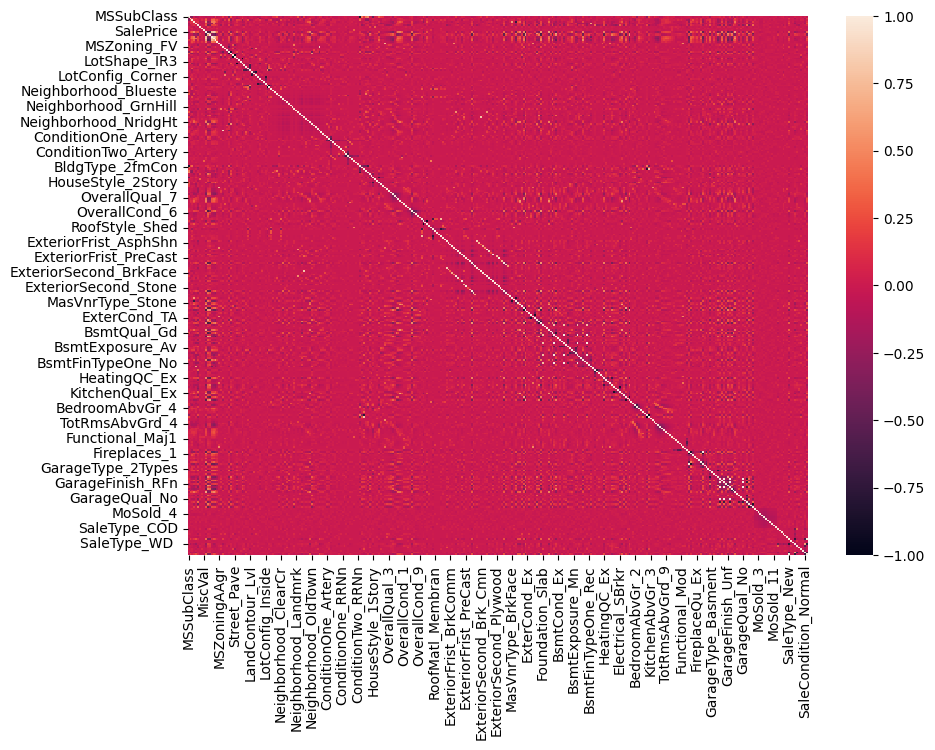

MSSubClass  LotFrontage   LotArea  MasVnrArea  \
MSSubClass               1.000000    -0.234713 -0.333825    0.007136   
LotFrontage             -0.234713     1.000000  0.175067    0.097105   
LotArea                 -0.333825     0.175067  1.000000    0.144029   
MasVnrArea               0.007136     0.097105  0.144029    1.000000   
BsmtUnfSF               -0.132827     0.146650  0.066880    0.092971   
...                           ...          ...       ...         ...   
SaleCondition_AdjLand   -0.001518    -0.000804 -0.030734   -0.032063   
SaleCondition_Alloca     0.032223     0.015291  0.046877   -0.013672   
SaleCondition_Family    -0.023622     0.021565  0.037154   -0.016497   
SaleCondition_Normal     0.033588    -0.136663 -0.049085   -0.062760   
SaleCondition_Partial   -0.045583     0.159907  0.047514    0.137253   

                       BsmtUnfSF  CentralAir  LowQualFinSF  PoolArea  \
MSSubClass             -0.132827   -0.078934      0.013179 -0.009194   
LotFrontage             0.146650    0.000358      0.017123  0.055717   
LotArea                 0.066880    0.063258     -0.004410  0.097800   
MasVnrArea              0.092971    0.133336     -0.056396 -0.011844   
BsmtUnfSF               1.000000    0.027634      0.038500 -0.034749   
...                          ...         ...           ...       ...   
SaleCondition_AdjLand   0.003129   -0.158718     -0.005499 -0.002918   
SaleCondition_Alloca   -0.053096    0.006686     -0.008417  0.101100   
SaleCondition_Family    0.024459    0.000995      0.014635 -0.006639   
SaleCondition_Normal   -0.154548    0.026834     -0.012319 -0.016211   
SaleCondition_Partial   0.246095    0.080605     -0.029540 -0.015675   

                        MiscVal  SalePrice  ...  SaleType_New  SaleType_Oth  \
MSSubClass            -0.026901  -0.087863  ...     -0.040940     -0.018302   
LotFrontage           -0.021335   0.197125  ...      0.159594      0.000538   
LotArea                0.038630   0.329452  ...      0.043989     -0.003118   
MasVnrArea            -0.022621   0.515700  ...      0.140053     -0.022409   
BsmtUnfSF             -0.029246   0.191932  ...      0.246684     -0.005482   
...                         ...        ...  ...           ...           ...   
SaleCondition_AdjLand -0.005168  -0.057365  ...     -0.016563     -0.002756   
SaleCondition_Alloca  -0.007446  -0.020721  ...     -0.025354     -0.004219   
SaleCondition_Family   0.005763  -0.036145  ...     -0.037689      0.049974   
SaleCondition_Normal   0.031466  -0.152128  ...     -0.646626     -0.088997   
SaleCondition_Partial -0.027764   0.369774  ...      0.986252     -0.014806   

                       SaleType_VWD  SaleType_WD   SaleCondition_Abnorml  \
MSSubClass                -0.016258      0.039628               0.000589   
LotFrontage                0.015760     -0.131197               0.015228   
LotArea                    0.014711     -0.028512              -0.005808   
MasVnrArea                 0.025880     -0.087195              -0.036813   
BsmtUnfSF                 -0.019678     -0.200641              -0.032619   
...                             ...           ...                    ...   
SaleCondition_AdjLand     -0.001041      0.021994              -0.014669   
SaleCondition_Alloca      -0.001593      0.033666              -0.022455   
SaleCondition_Family      -0.002368     -0.014905              -0.033380   
SaleCondition_Normal       0.008526      0.622407              -0.572692   
SaleCondition_Partial     -0.005590     -0.748831              -0.078808   

                       SaleCondition_AdjLand  SaleCondition_Alloca  \
MSSubClass                         -0.001518              0.032223   
LotFrontage                        -0.000804              0.015291   
LotArea                            -0.030734              0.046877   
MasVnrArea                         -0.032063             -0.013672   
BsmtUnfSF                           0.003129             -0.053096   
...        

In [ ]:
df_corr= df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr)

plt.show()
df_corr

In [ ]:
# Связи между признаками
# sns.pairplot(df,diag_kind='kde')

Корреляция числовых признаков с SalePrice:
SalePrice          1.000000
TotalArea          0.823227
TotalSF            0.761071
TotalBaths         0.652733
GarageCars_3.0     0.621517
                     ...   
Fireplaces_0      -0.483537
KitchenQual_TA    -0.535888
HouseRemodelage   -0.548307
Houseage          -0.578785
ExterQual_TA      -0.603306
Name: SalePrice, Length: 322, dtype: float64


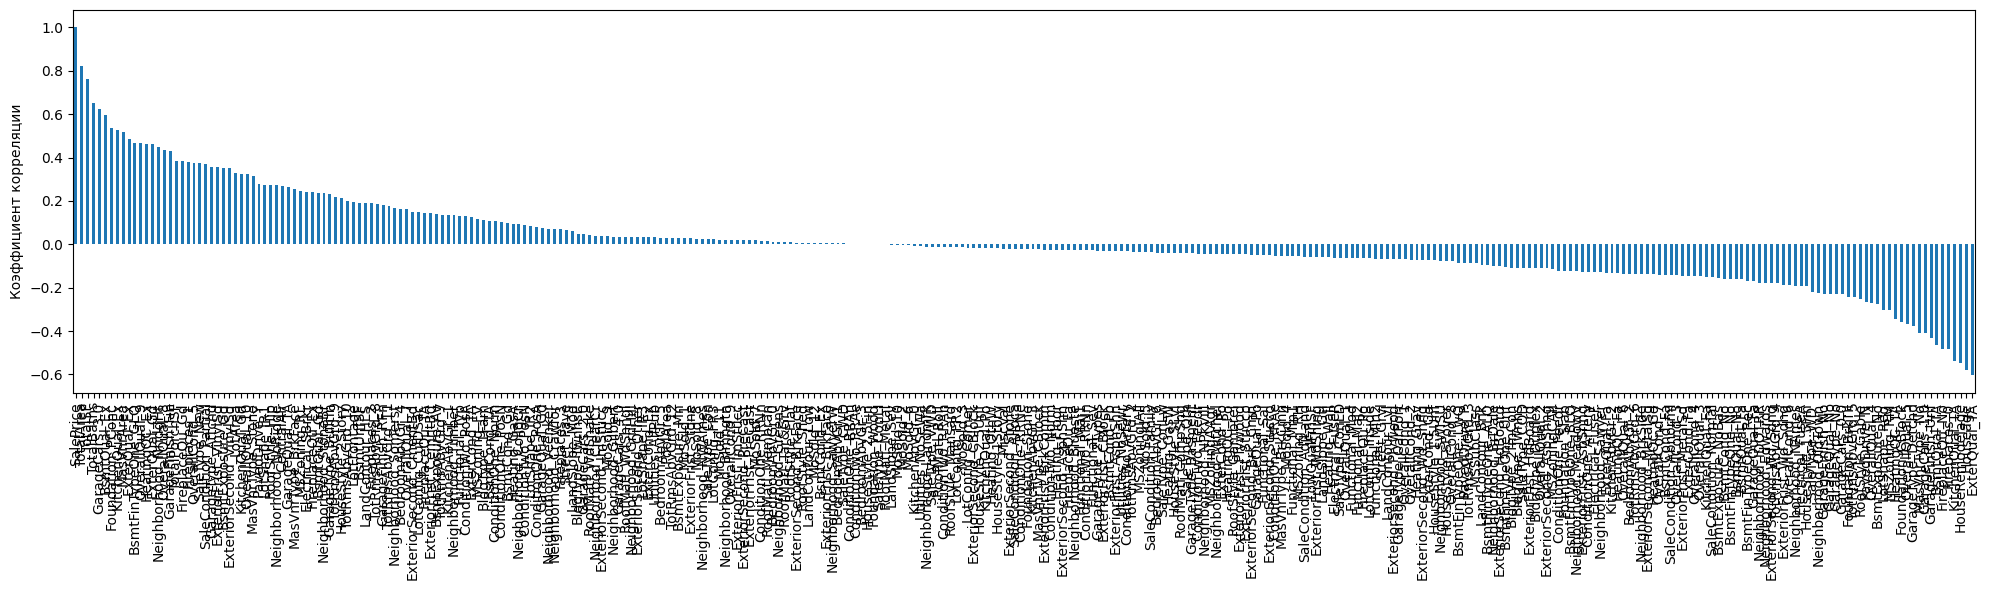

In [ ]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

print("Корреляция числовых признаков с SalePrice:")
print(correlation)

plt.figure(figsize=(20, 6))
correlation.plot(kind='bar')
# plt.title('Топ-15 числовых признаков по корреляции с SalePrice')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
negative_correlation_df = correlation[correlation < 0.06].to_frame().index
print(len(negative_correlation_df))
df.shape

237


(2888, 322)

In [ ]:
df = df.drop(columns=negative_correlation_df)
df.shape

(2888, 85)

In [ ]:
# correlation.


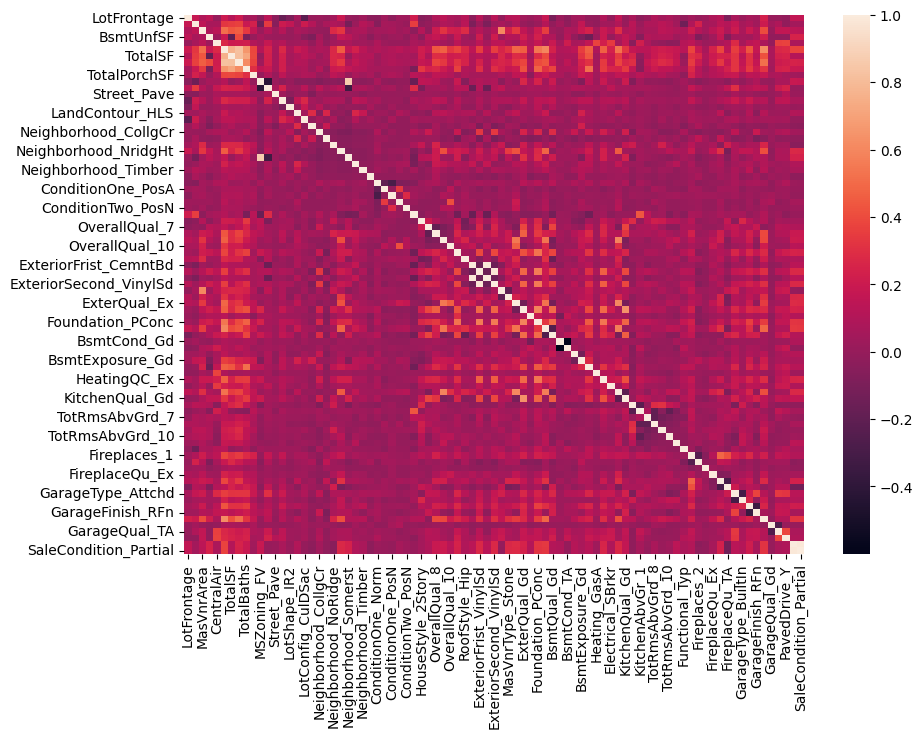

LotFrontage   LotArea  MasVnrArea  BsmtUnfSF  CentralAir  \
LotFrontage     1.000000  0.175067    0.097105   0.146650    0.000358   
LotArea         0.175067  1.000000    0.144029   0.066880    0.063258   
MasVnrArea      0.097105  0.144029    1.000000   0.092971    0.133336   
BsmtUnfSF       0.146650  0.066880    0.092971   1.000000    0.027634   
CentralAir      0.000358  0.063258    0.133336   0.027634    1.000000   

             SalePrice   TotalSF  TotalArea  TotalBaths  TotalPorchSF  ...  \
LotFrontage   0.197125  0.117878   0.197699    0.049274      0.056832  ...   
LotArea       0.329452  0.348134   0.365583    0.190601      0.236810  ...   
MasVnrArea    0.515700  0.433048   0.457474    0.334240      0.161821  ...   
BsmtUnfSF     0.191932 -0.204313   0.397757   -0.093781      0.001717  ...   
CentralAir    0.269189  0.206161   0.207130    0.219190      0.104917  ...   

             GarageType_Attchd  GarageType_BuiltIn  GarageFinish_Fin  \
LotFrontage           0.068480            0.012529          0.056889   
LotArea               0.173617            0.056454          0.088673   
MasVnrArea            0.200196            0.074000          0.197542   
BsmtUnfSF             0.049506            0.053499          0.037609   
CentralAir            0.275467            0.057742          0.143726   

             GarageFinish_RFn  GarageCars_3.0  GarageQual_Gd  GarageQual_TA  \
LotFrontage          0.037610        0.234798       0.008577       0.001101   
LotArea              0.041252        0.204959       0.049044       0.090231   
MasVnrArea           0.111560        0.400565       0.011048       0.160749   
BsmtUnfSF            0.091447        0.220930      -0.018689      -0.018223   
CentralAir           0.163883        0.080884      -0.005909       0.358685   

             PavedDrive_Y  SaleType_New  SaleCondition_Partial  
LotFrontage     -0.015742      0.159594               0.159907  
LotArea         -0.018695      0.043989               0.047514  
MasVnrArea       0.167349      0.140053               0.137253  
BsmtUnfSF       -0.010880      0.246684               0.246095  
CentralAir       0.370988      0.079496               0.080605  

[5 rows x 85 columns]

In [ ]:
df_corr= df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr)

plt.show()
df_corr.head()

Корреляция числовых признаков с SalePrice:
SalePrice           1.000000
TotalArea           0.823227
TotalSF             0.761071
TotalBaths          0.652733
GarageCars_3.0      0.621517
BsmtQual_Ex         0.597308
Foundation_PConc    0.538296
KitchenQual_Ex      0.528100
MasVnrArea          0.515700
ExterQual_Ex        0.486880
Name: SalePrice, dtype: float64


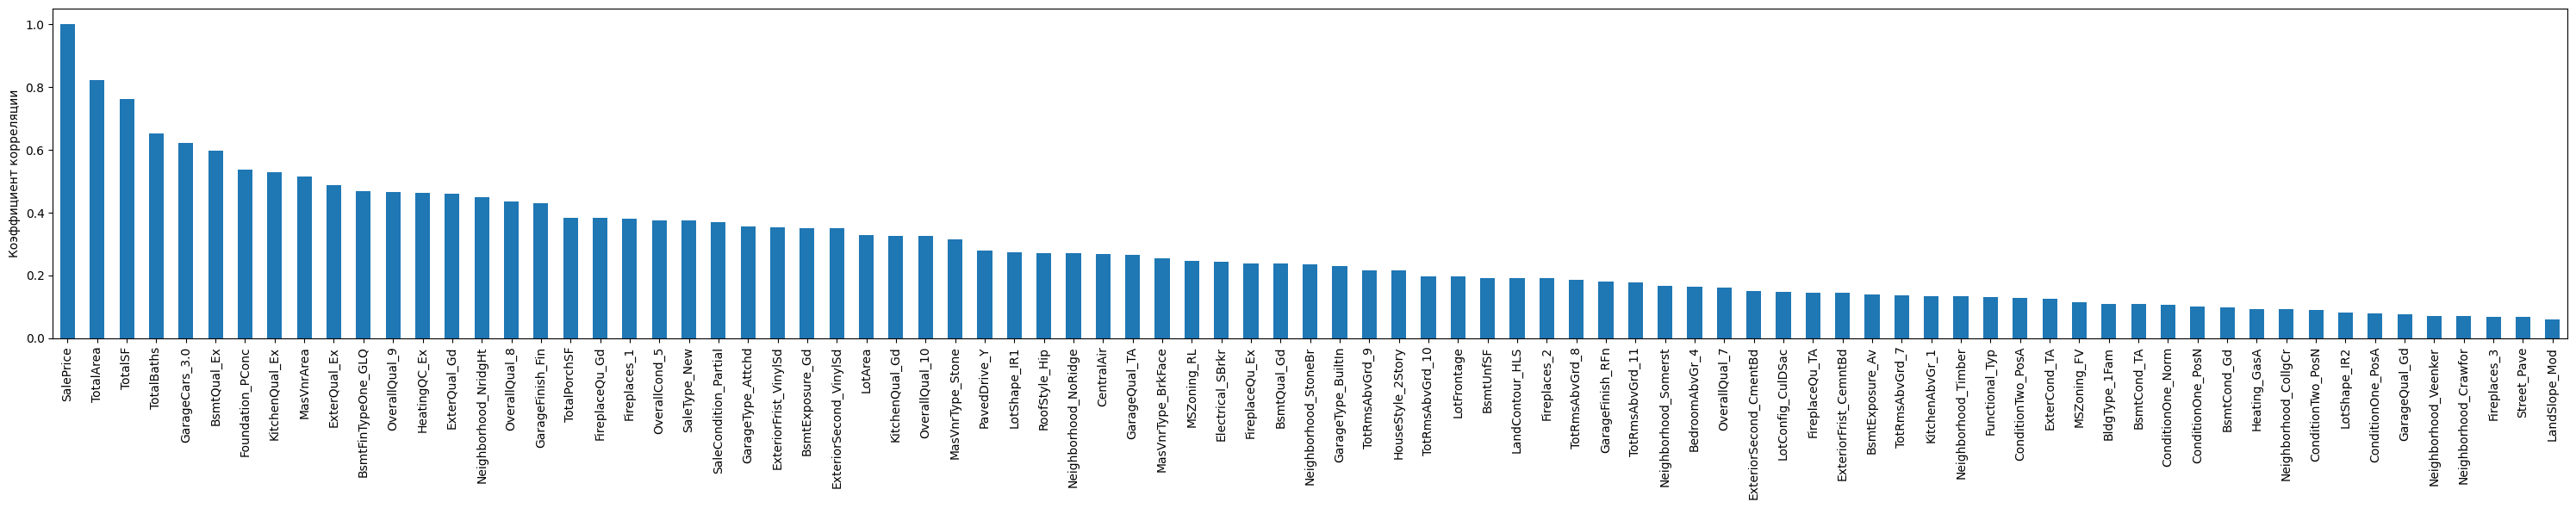

In [ ]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

print("Корреляция числовых признаков с SalePrice:")
print(correlation.head(10))

plt.figure(figsize=(30, 6))
correlation.plot(kind='bar')
# plt.title('Топ-15 числовых признаков по корреляции с SalePrice')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

O'qitishni boshlash 

In [ ]:
X = df.drop('SalePrice',axis=1)   #targetni SalePrice qilib olindi 
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape ,y_train.shape

((2021, 84), (2021,))

In [ ]:
X_test.shape ,y_test.shape

((867, 84), (867,))

In [ ]:
# sns.scatterplot()

# Linear Regression 

## LinearRegression bez parametr

In [ ]:
from sklearn.metrics import r2_score ,rand_score
model_L_R= LinearRegression()

In [ ]:
model_L_R.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions_L_R = model_L_R.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions_L_R)
MSE = mean_squared_error(y_test,test_predictions_L_R)
RMSE = np.sqrt(MSE)

In [ ]:

print(r2_score(y_test, test_predictions_L_R)*100)

91.43547772454845


In [ ]:
test_predictions_L_R.min(),y_test.min()

(np.float64(49063.55085106523), np.int64(12789))

<Axes: xlabel='SalePrice'>

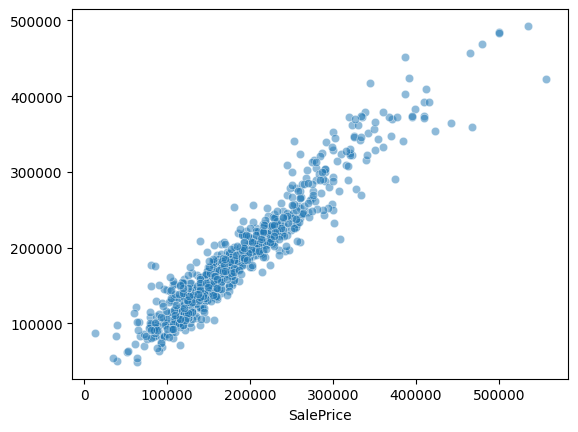

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_L_R,alpha=0.5)

<Axes: xlabel='SalePrice'>

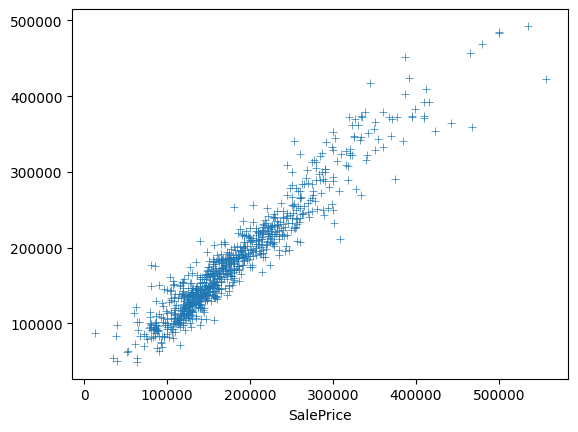

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_L_R, marker='+')

In [ ]:
MAE

np.float64(15999.219108480085)

In [ ]:
MSE

np.float64(497549246.4353725)

In [ ]:
RMSE

np.float64(22305.811942975142)

In [ ]:
all_mean=df['SalePrice'].mean()

In [ ]:
1- RMSE/all_mean

np.float64(0.8756775113440936)

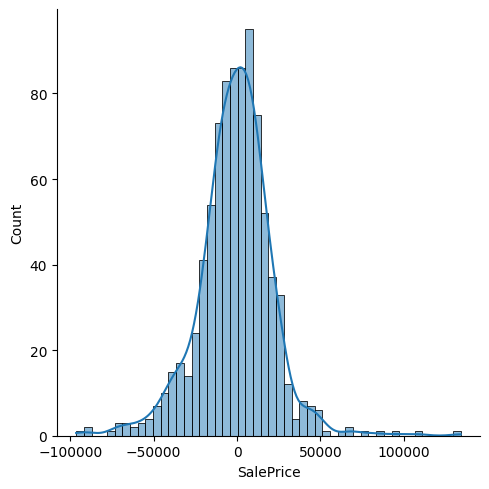

In [ ]:
sns.displot(abs(y_test)-abs(test_predictions_L_R),bins=50,kde=True)

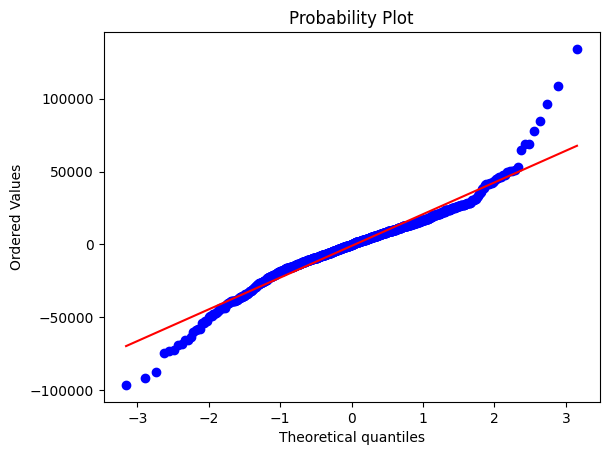

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(y_test-test_predictions_L_R , dist="norm", plot=pylab)
pylab.show()

## GriedSearch for LinearRegression

In [ ]:

from sklearn.metrics import r2_score ,rand_score


model_L_R_2 = LinearRegression()
model_L_R_2.fit(X_train, y_train)


predictions = model_L_R_2.predict(X_test)

#Accuracy of the model
print(r2_score(y_test, predictions)*100)


91.43547772454845


<Axes: xlabel='SalePrice'>

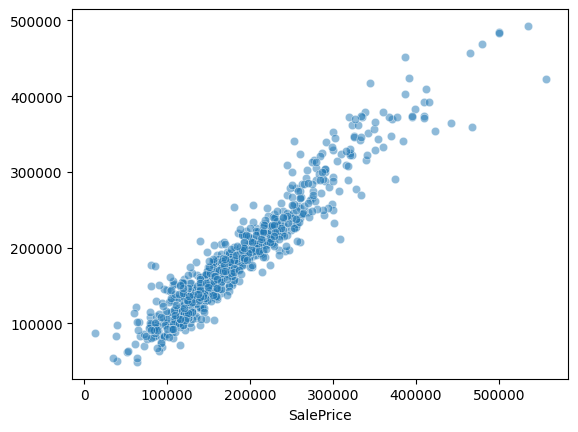

In [ ]:
sns.scatterplot(x=y_test, y=predictions,alpha=0.5)

## RandomizedSearchCV fro LinearRegression

In [ ]:

model_L_R_3 = LinearRegression()

param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None], 
               'positive': [True,False]}

random_search = RandomizedSearchCV(model_L_R_3, param_space, n_iter=200, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 128 is smaller than n_iter=200. Running 128 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.9100413578643387


In [ ]:
model_L_R_4 = LinearRegression(positive= True, n_jobs= 13, fit_intercept=True, copy_X= True)

In [ ]:
model_L_R_3.fit(X_train,y_train)


LinearRegression()

In [ ]:
test_predictions_L_R = model_L_R_3.predict(X_test)

<Axes: xlabel='SalePrice'>

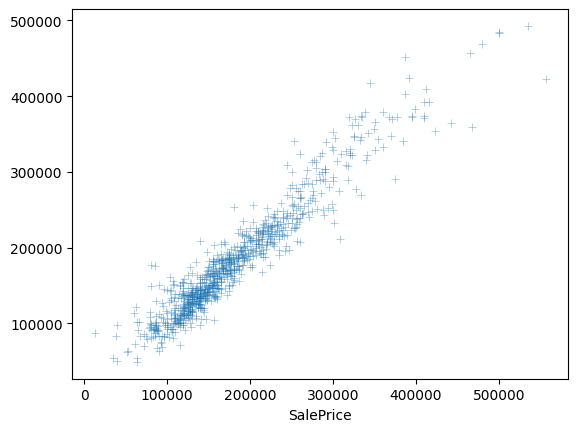

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_L_R,alpha=0.5, marker='+')

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions_L_R)
MSE = mean_squared_error(y_test,test_predictions_L_R)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(15999.219108480085)

In [ ]:
MSE

np.float64(497549246.4353725)

In [ ]:
RMSE

np.float64(22305.811942975142)

In [ ]:
1- RMSE/all_mean

np.float64(0.8756775113440936)

# Гребневая регрессия (Ridge Regression)

In [ ]:
ridge_model = Ridge(alpha=1.0)

In [ ]:
ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
test_predictions = ridge_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

<Axes: xlabel='SalePrice'>

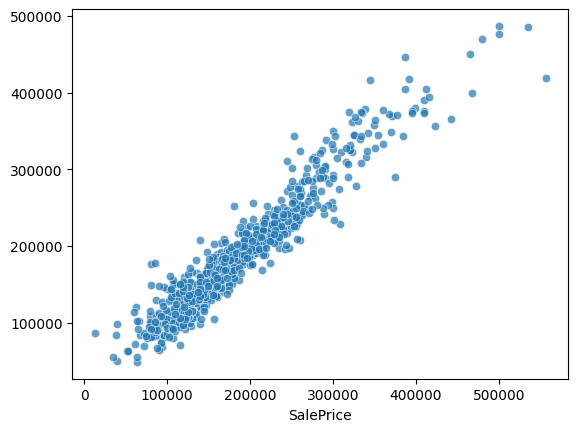

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions,alpha=0.7)

In [ ]:
MAE

np.float64(15835.146348351835)

In [ ]:
RMSE

np.float64(21870.045557511952)

In [ ]:
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

np.float64(14946.849503022295)

<Axes: xlabel='SalePrice'>

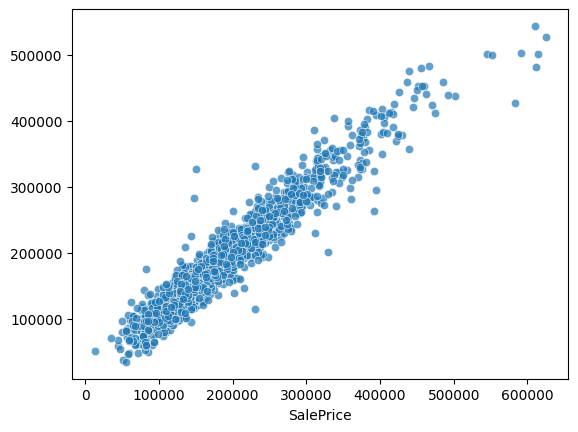

In [ ]:
sns.scatterplot(x=y_train, y=train_predictions,alpha=0.7)



In [ ]:
1- RMSE/all_mean

np.float64(0.878106275724062)

Training MSE: 459377301.2990196
Validation MSE: 463326599.2732272


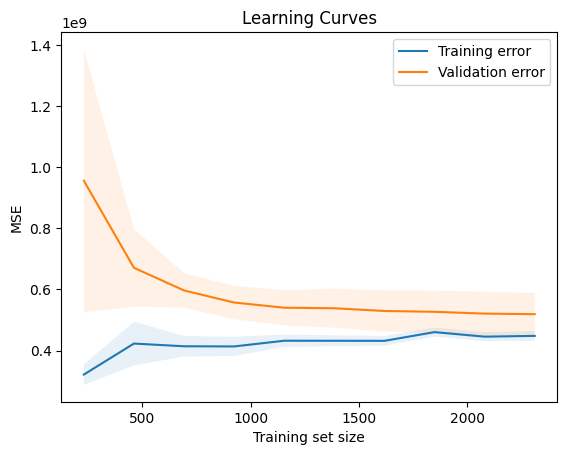

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)

y_train_pred = ridge_model.predict(X_train)
y_val_pred = ridge_model.predict(X_val)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Training MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    ridge_model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes = np.linspace(0.1, 1.0, 10)
)
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha = 0.1)
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Ridge Regression (cross-validation) 

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,12.5),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=(0.1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                12.5),
        scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

np.float64(4.0)

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

<Axes: xlabel='SalePrice'>

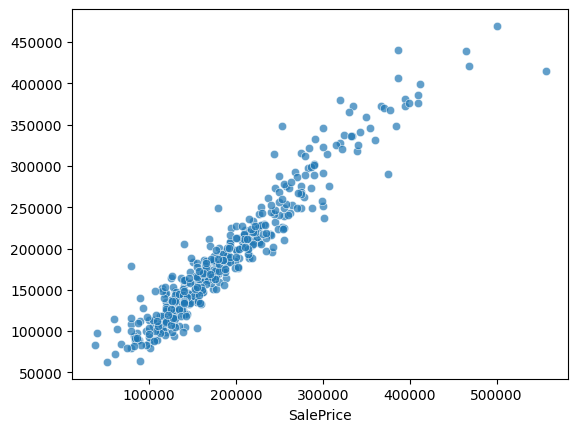

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions,alpha=0.7)

In [ ]:
MAE

np.float64(15783.070119232956)

In [ ]:
RMSE

np.float64(22107.239191857632)

In [ ]:
1- RMSE/all_mean

np.float64(0.8767842658823857)

In [ ]:
print(r2_score(y_test, test_predictions)*100)

92.09283384452102


In [ ]:
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

np.float64(14946.849503022295)

<Axes: xlabel='SalePrice'>

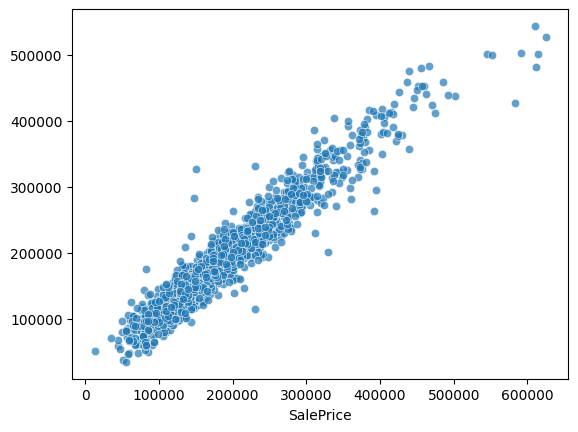

In [ ]:
sns.scatterplot(x=y_train, y=train_predictions,alpha=0.7)

In [ ]:
1- RMSE/all_mean

np.float64(0.8767842658823857)

## GireadSearch for RidgeCV

In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_ridge = Ridge()
grid_search = GridSearchCV(grid_ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__positive': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.0001,
 'estimator': Ridge(),
 'n_jobs': None,
 'param_grid': {'alpha': [0.1, 1.0, 10.0, 100.0]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
grid_ridge.fit(X_train,y_train)

Ridge()

In [ ]:
train_predictions = grid_search.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

np.float64(14946.849503022295)

In [ ]:
RMSE

np.float64(22107.239191857632)

In [ ]:
1- RMSE/all_mean

np.float64(0.8767842658823857)

In [ ]:
print(r2_score(y_train, train_predictions)*100)

92.37156455451644


<Axes: xlabel='SalePrice'>

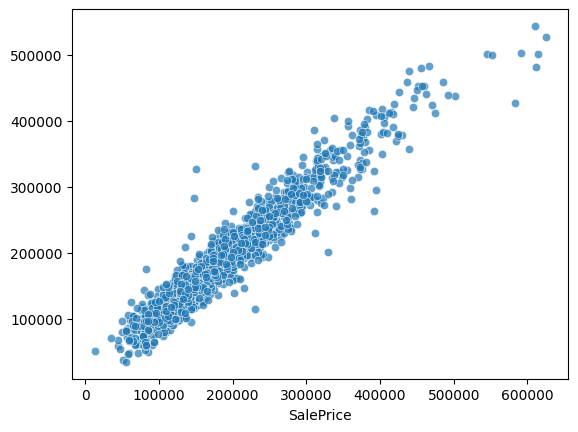

In [ ]:
sns.scatterplot(x=y_train, y=train_predictions,alpha=0.7)


-----

# Регрессия Лассо

In [ ]:
lasso_cv_model = LassoCV()

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV()

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

<Axes: xlabel='SalePrice'>

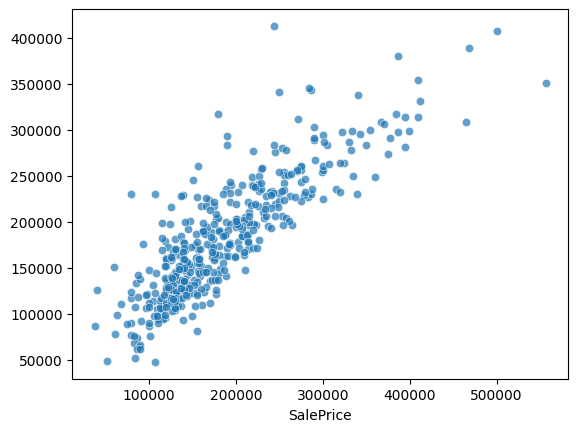

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions,alpha=0.7)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(30372.133892884136)

In [ ]:
RMSE


np.float64(41500.11233476378)

In [ ]:
1- RMSE/all_mean

np.float64(0.7686971781996762)

In [ ]:


param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
random_search = RandomizedSearchCV(lasso, param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e+11, tolerance: 9.743e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+11, tolerance: 9.647e+08
  m

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [ ]:
lasso.fit(X_train,y_train)

c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.637e+11, tolerance: 1.217e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
test_predictions = lasso.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

<Axes: xlabel='SalePrice'>

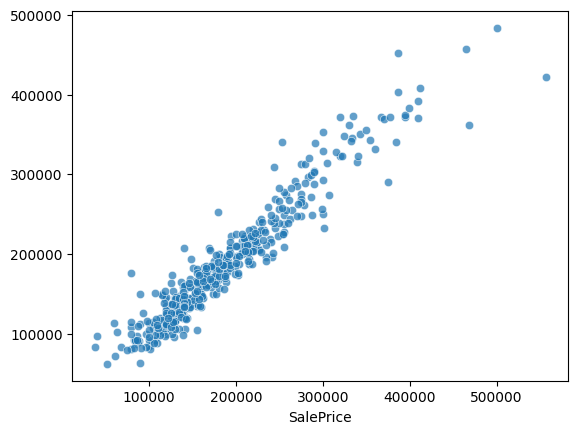

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions,alpha=0.7)

In [ ]:
MAE

np.float64(15893.441485417025)

In [ ]:
MSE

np.float64(510293531.4161163)

In [ ]:
RMSE

np.float64(22589.67754121595)

In [ ]:
1- RMSE/all_mean

np.float64(0.8740953731234667)

In [ ]:
print(r2_score(y_test, test_predictions)*100)

91.74395773297188


# Clasification 

## DecisionTreeRegressor



In [ ]:
decisionTreeRegr = DecisionTreeRegressor(random_state=42)
decisionTreeRegr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

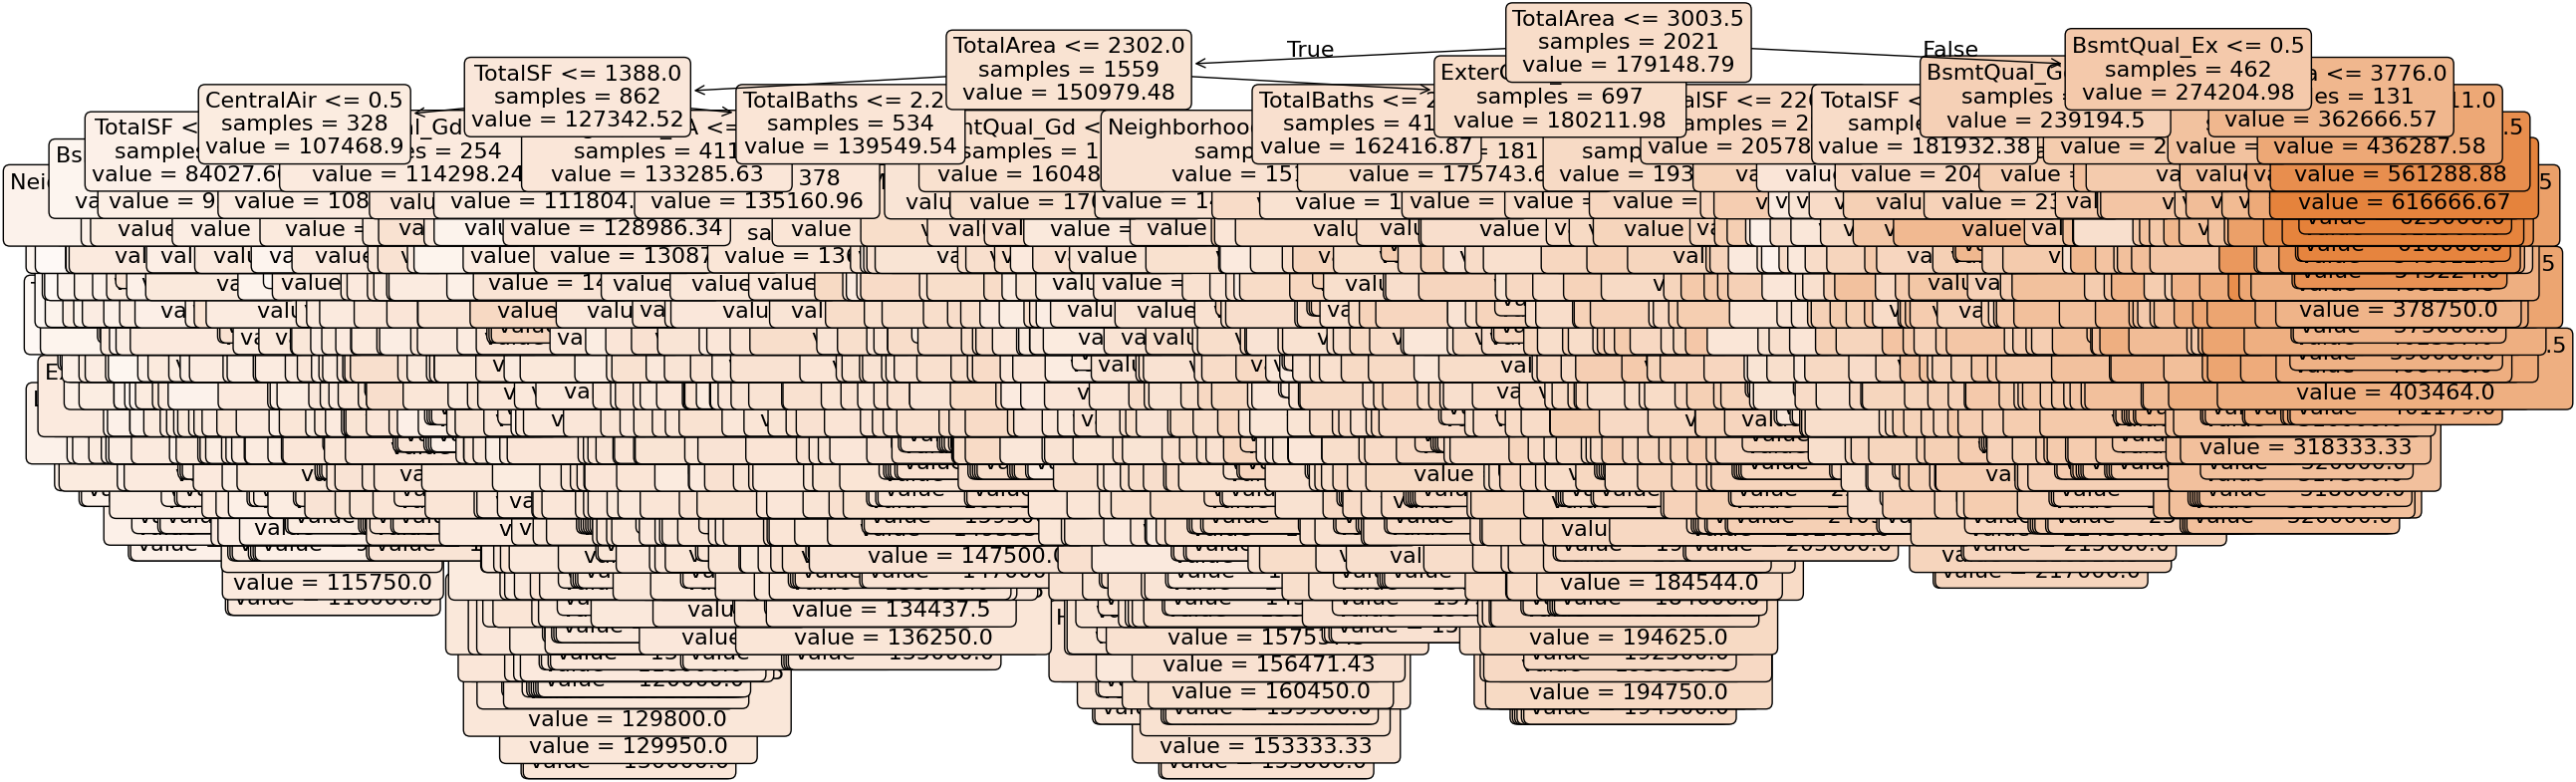

In [ ]:
plt.figure(figsize=(26,8))
plot_tree(decisionTreeRegr, feature_names=X.columns, filled=True, rounded=True, impurity=False, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

In [ ]:
testPredictionsDecisionTreeRegr = decisionTreeRegr.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,testPredictionsDecisionTreeRegr)
MSE = mean_squared_error(y_test,testPredictionsDecisionTreeRegr)
RMSE = np.sqrt(MSE)

<Axes: xlabel='SalePrice'>

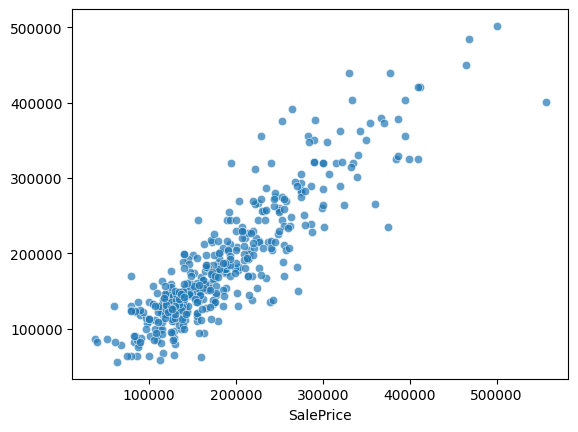

In [ ]:
sns.scatterplot(x=y_test, y=testPredictionsDecisionTreeRegr,alpha=0.7)

In [ ]:
MAE

np.float64(26433.122119815667)

In [ ]:
MSE

np.float64(1343873668.841014)

In [ ]:
1- RMSE/all_mean

np.float64(0.7956799994566051)

In [ ]:
print(r2_score(y_test, test_predictions)*100)

91.74395773297188


# Ensemble Methods

## Bagging (Random Forest)

In [ ]:
randomForest_model = RandomForestRegressor()

In [ ]:
randomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
yprediction_random= randomForest_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,yprediction_random)
MSE = mean_squared_error(y_test,yprediction_random)
RMSE = np.sqrt(MSE)

In [ ]:
1- RMSE/all_mean

np.float64(0.8658152539800814)

In [ ]:
print(r2_score(y_test, test_predictions)*100)

91.74395773297188


<Axes: xlabel='SalePrice'>

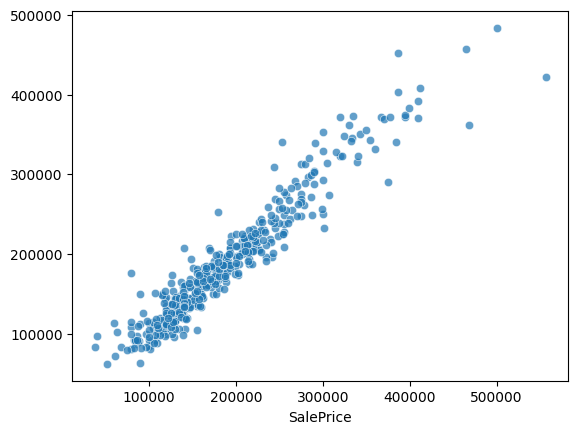

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions,alpha=0.7)


## GreadSearch for RandomForest

In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [ ]:
def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print( "R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [ ]:
for i in range(5):
    print( "Loop: " , i)
    print( "--------------")

    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print( "Best Score:" ,best_score)
    print( "Best params:",best_params)

Loop:  0
--------------


c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

R2 score: 0.916939835958883
Best Score: 0.8987581007164206
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  1
--------------


c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

R2 score: 0.9089357047361708
Best Score: 0.8994551400229325
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------


c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

R2 score: 0.9181465728082492
Best Score: 0.8962865502242459
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  3
--------------


c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

R2 score: 0.9198636261405957
Best Score: 0.9000460321839657
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  4
--------------


c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

R2 score: 0.9213213772615079
Best Score: 0.8990503751870239
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


In [ ]:
best_param_RF = {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


In [ ]:
randomForest_model_GR = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=2, n_estimators=30)

In [ ]:
randomForest_model_GR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=30)

In [ ]:
test_predictions_RFG= randomForest_model_GR.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions_RFG)
MSE = mean_squared_error(y_test,test_predictions_RFG)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(15833.142933947773)

In [ ]:
MSE

np.float64(518780562.1369149)

In [ ]:
RMSE

np.float64(22776.754864047576)

In [ ]:
1- RMSE/all_mean

np.float64(0.8730526888936807)

In [ ]:
print(r2_score(y_test, test_predictions_RFG)*100)

91.60664600934876


<Axes: xlabel='SalePrice'>

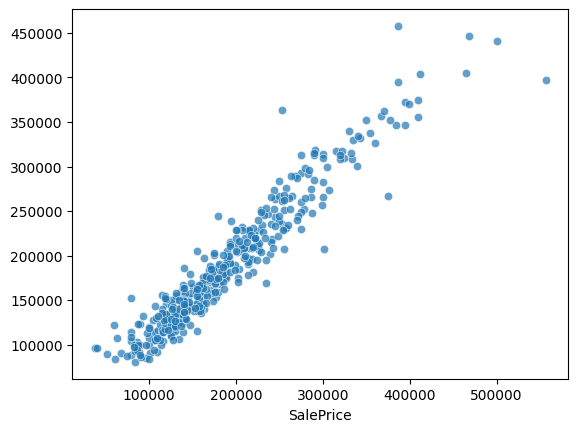

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_RFG,alpha=0.7)


# Boosting

## AdaBoost 

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3)

In [ ]:
abr_model = AdaBoostRegressor(estimator=dtr, n_estimators=50, learning_rate=0.1, loss='linear', random_state=42)

In [ ]:
abr_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, random_state=42)

In [ ]:
y_pred_abr = abr_model.predict(X_test)


In [ ]:
MAE = mean_absolute_error(y_test,y_pred_abr)
MSE = mean_squared_error(y_test,y_pred_abr)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(23439.737566173586)

In [ ]:
RMSE

np.float64(31768.252771983633)

In [ ]:
1- RMSE/all_mean

np.float64(0.8229381537439735)

In [ ]:
print(r2_score(y_test, test_predictions_RFG)*100)

91.60664600934876


<Axes: xlabel='SalePrice'>

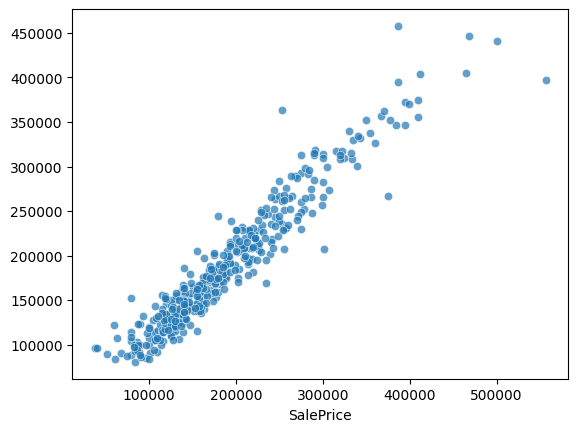

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_RFG,alpha=0.7)


## GreadSearch for adabossting

In [ ]:




# define the model with default hyperparameters
model_abrG = AdaBoostRegressor()
# define the evaluation procedure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [ ]:
grid_search = GridSearchCV(estimator=model_abrG, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Fayzulla\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [ ]:
# summarize the best score and configuration
print("Best:using " ,(grid_search.best_score_, grid_search.best_params_))

Best:using  (np.float64(nan), {'learning_rate': 0.0001, 'n_estimators': 10})


In [ ]:
model_abrG_best = AdaBoostRegressor(learning_rate=0.0001, n_estimators=10)

In [ ]:
model_abrG_best.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.0001, n_estimators=10)

In [ ]:
y_pred_abrG_best = model_abrG_best.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,y_pred_abr)
MSE = mean_squared_error(y_test,y_pred_abr)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(23439.737566173586)

In [ ]:
RMSE

np.float64(31768.252771983633)

In [ ]:
1- RMSE/all_mean

np.float64(0.8229381537439735)

## lightGBM

In [ ]:


# 2. create and train model
print("Creating and training LightGBM regression model ")
params = {
    'objective': 'regression',  # not needed
    'boosting_type': 'gbdt',  # default
    'num_leaves': 31,  # default
    'learning_rate': 0.05,  # default = 0.10
    'feature_fraction': 1.0,  # default
    'min_data_in_leaf': 2,  # default = 20
    'random_state': 0,
    'verbosity': -1
}
lgbm_model = lgbm.LGBMRegressor(**params)
lgbm_model.fit(X_train, y_train)

Creating and training LightGBM regression model 


LGBMRegressor(feature_fraction=1.0, learning_rate=0.05, min_data_in_leaf=2,
              objective='regression', random_state=0, verbosity=-1)

In [ ]:
y_pred_lgbm = lgbm_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,y_pred_lgbm)
MSE = mean_squared_error(y_test,y_pred_lgbm)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(15770.06286834449)

In [ ]:
RMSE

np.float64(23078.83151216141)

In [ ]:
all_mean= df['SalePrice'].mean()

In [ ]:
1- RMSE/all_mean

np.float64(0.8713690505327748)

In [ ]:
print(r2_score(y_test, test_predictions_RFG)*100)

91.60664600934876


<Axes: xlabel='SalePrice'>

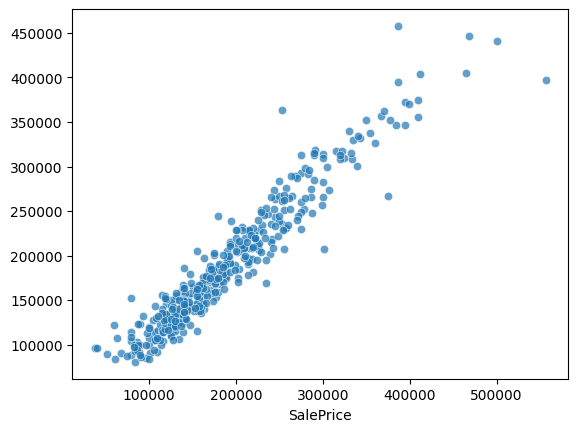

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_RFG,alpha=0.7)

## GreadSearch for Lightgboost

In [ ]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid_LGMR = GridSearchCV(lgbm.LGBMRegressor(random_state=42), params, scoring='r2', cv=5)

In [ ]:
grid_LGMR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.03, 0.003],
                         'max_depth': [-1, 3, 5],
                         'n_estimators': [50, 100, 200, 500],
                         'num_leaves': [7, 14, 21, 28, 31, 50]},
             scoring='r2')

In [ ]:
reg_model_RGBMR = lgbm.LGBMRegressor(random_state=42)

In [ ]:
y_pred_LgbmrG = grid_LGMR.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,y_pred_LgbmrG)
MSE = mean_squared_error(y_test,y_pred_LgbmrG)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(15513.636616000742)

In [ ]:
RMSE

np.float64(22491.251009951586)

In [ ]:
1- RMSE/all_mean

np.float64(0.8746439580101248)

In [ ]:
print(r2_score(y_test, test_predictions_RFG)*100)

91.60664600934876


<Axes: xlabel='SalePrice'>

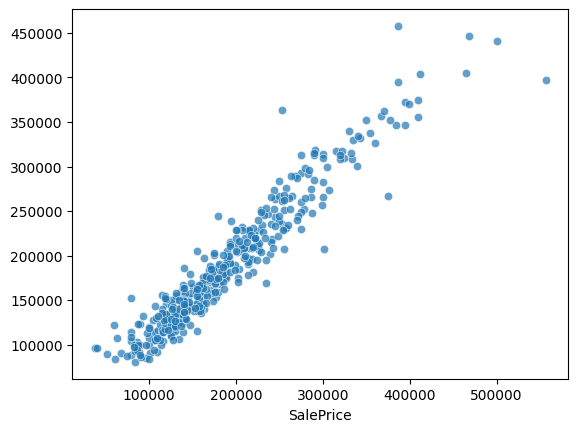

In [ ]:
sns.scatterplot(x=y_test, y=test_predictions_RFG,alpha=0.7)

## XGBRegressor bez paramaetr

In [ ]:
modelXGB= XGBRegressor()

In [ ]:
modelXGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_prediction_XGBR= modelXGB.predict(X_test)
MAE = mean_absolute_error(y_test,y_prediction_XGBR)
MSE = mean_squared_error(y_test,y_prediction_XGBR)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(15704.639526929723)

In [ ]:
RMSE

np.float64(22906.241358044328)

In [ ]:
1- RMSE/all_mean

np.float64(0.87233098984851)

In [ ]:
print(r2_score(y_test, y_prediction_XGBR)*100)

91.5109395980835


<Axes: xlabel='SalePrice'>

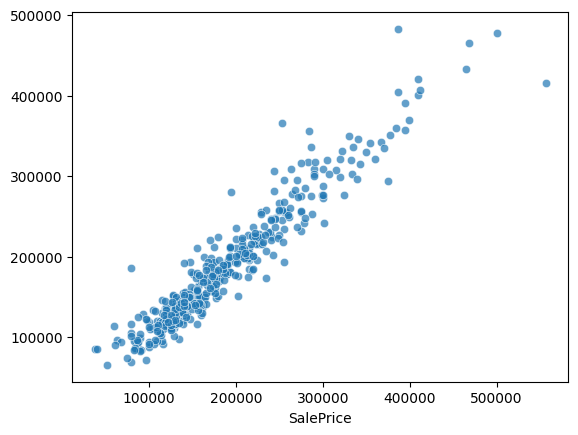

In [ ]:
sns.scatterplot(x=y_test, y=y_prediction_XGBR,alpha=0.7)

## Greadsearch for XGBoost


In [ ]:
params = { 'max_depth': [2, 4, 6],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.2, 0.6, 0.8],
           'min_child_weight': [3, 5, 7],
           'gamma': [0.3, 0.5, 0.7],
           'subsample': [0.4, 0.6, 0.8]}

model_XGBGS = XGBRegressor()
grid_XGB = GridSearchCV(estimator=model_XGBGS,param_grid=params)

In [ ]:
# grid_XGB.fit(X_train,y_train)

In [ ]:
print("Best parameters:", grid_XGB.best_params_)
print("Best Score (R2): ", (grid_XGB.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Elastic Net

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [ ]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [ ]:
elastic_model.l1_ratio_

np.float64(1.0)

In [ ]:
test_predictions_elastic = elastic_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions_elastic)
MSE = mean_squared_error(y_test,test_predictions_elastic)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

np.float64(30316.6448271783)

In [ ]:
RMSE

np.float64(41428.39234173665)

In [ ]:
1- RMSE/all_mean

np.float64(0.7690969129433525)

In [ ]:
print(r2_score(y_test, y_prediction_XGBR)*100)

91.5109395980835


<Axes: xlabel='SalePrice'>

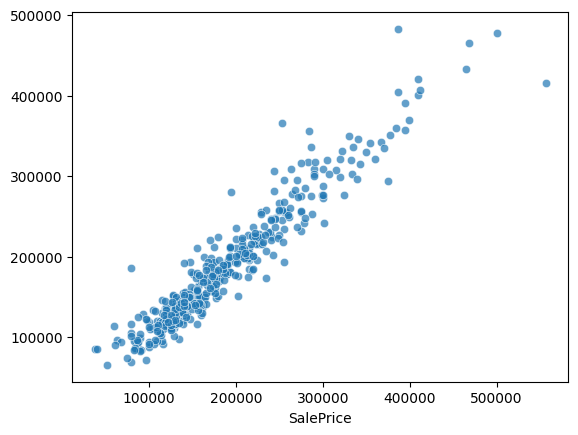

In [ ]:
sns.scatterplot(x=y_test, y=y_prediction_XGBR,alpha=0.7)